In [1]:
#some code for checking gpu
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
!pip install keras-tuner


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 3.1 MB/s eta 0:00:00


In [10]:
import numpy as np
import os
import tqdm
import pandas as pd
import time, warnings
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow
from PIL import Image
from sklearn.model_selection import KFold
import keras_tuner
from tensorflow import keras
from keras_tuner.tuners import RandomSearch
from keras_tuner.engine.trial import Trial
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import LeaveOneGroupOut, StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
import random
import keras_tuner as kt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import (
    Dense,
    Conv1D,
    MaxPooling1D,
    BatchNormalization,
    Dropout,
    Flatten,
    Conv2D,
    MaxPool2D,
    Activation,
)


In [ ]:

#class for plotting
class PlotLearning(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []

    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]

        # Plotting
        metrics = [x for x in logs if 'val' not in x]

        f, axs = plt.subplots(1, len(metrics), figsize=(15, 5))

        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2),
                        self.metrics[metric],
                        label=metric)
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2),
                            self.metrics['val_' + metric],
                            label='val_' + metric)

            axs[i].legend()
            axs[i].grid()

        plt.tight_layout()
        plt.show()

def normalize(clip):
    normalized_clip = (clip - np.min(clip)) / (np.max(clip) - np.min(clip))
    return normalized_clip

def conv_array(root_folder):
    metadata = pd.read_csv('/content/drive/MyDrive/UrbanSound8kv2/Data_extracted/processed_data.csv')
    folds = {}
    for class_label in range(1, 11):
        class_folder_path = os.path.join(root_folder, f"fold{class_label}")
        image_data = []
        all_labels = []
        if not os.path.exists(class_folder_path):
            continue  # Skip if the folder doesn't exist
        for filename in tqdm.tqdm(os.listdir(class_folder_path)):
            if filename.endswith(".png"):
                image_path = os.path.join(class_folder_path, filename)
                image = Image.open(image_path)
                new_filename = filename.replace('.png', '.wav')
                row_num = metadata[metadata['slice_file_name'] == new_filename].index
                if not row_num.empty:
                    image_array = np.array(image)
                    if not image_array.shape == (36, 320):
                      continue
                    image_array = normalize(image_array)
                    image_size = image_array.shape[:2]
                    print(image_size)
                    image_array = image_array.reshape((36, 320, 1))
                    label = metadata.iloc[row_num]['labelID'].values[0]
                    all_labels.append(label)
                    image_data.append(image_array)
                else:
                    print(f'{new_filename} not found')
                    continue
        image_data = np.array(image_data)
        all_labels = np.array(all_labels)
        all_labels = to_categorical(all_labels - 1, num_classes=10)
        folds[f"fold{class_label}"] = [image_data, all_labels]
    return folds


root_folder = r"/content/drive/MyDrive/UrbanSound8kv2/Data_extracted/melspec"
data = conv_array(root_folder)
input_shape = data['fold1'][0].shape
print(input_shape)

100%|██████████| 837/837 [00:13<00:00, 59.82it/s] 


(873, 36, 320, 1)
Training using fold1 as validation
Epoch 1/20
 6/62 [=>............................] - ETA: 17s - loss: 11.3934 - accuracy: 0.0859

62/62 [==============================] - ETA: 0s - loss: 4.3765 - accuracy: 0.1174

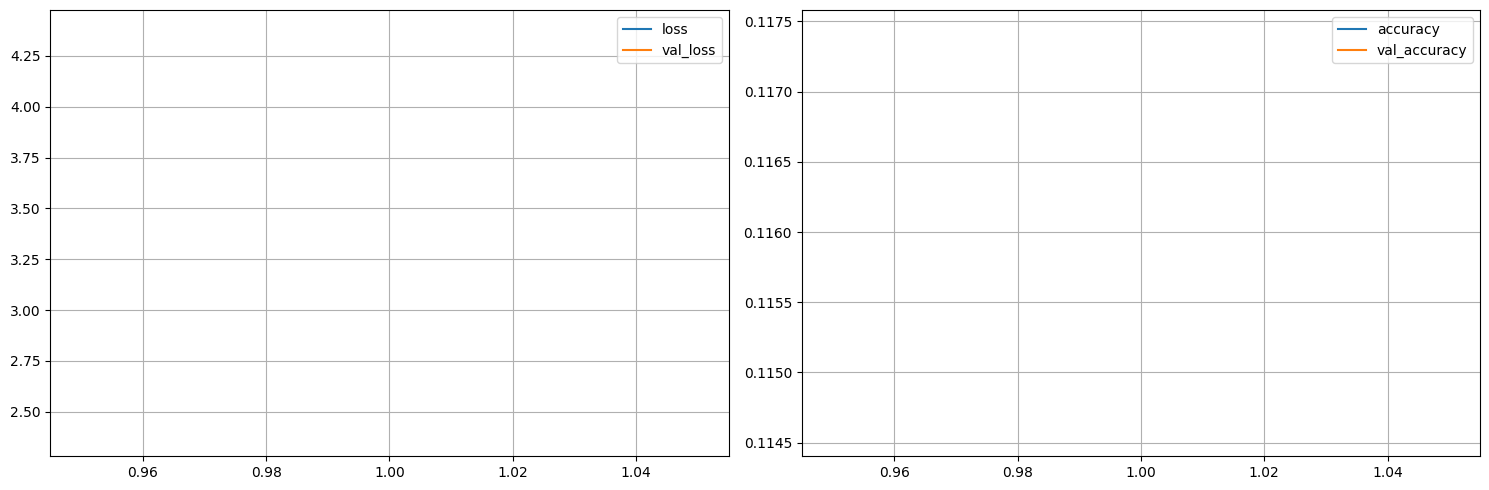

62/62 [==============================] - 41s 381ms/step - loss: 4.3765 - accuracy: 0.1174 - val_loss: 2.3804 - val_accuracy: 0.1145
Epoch 2/20
62/62 [==============================] - ETA: 0s - loss: 2.2819 - accuracy: 0.1088

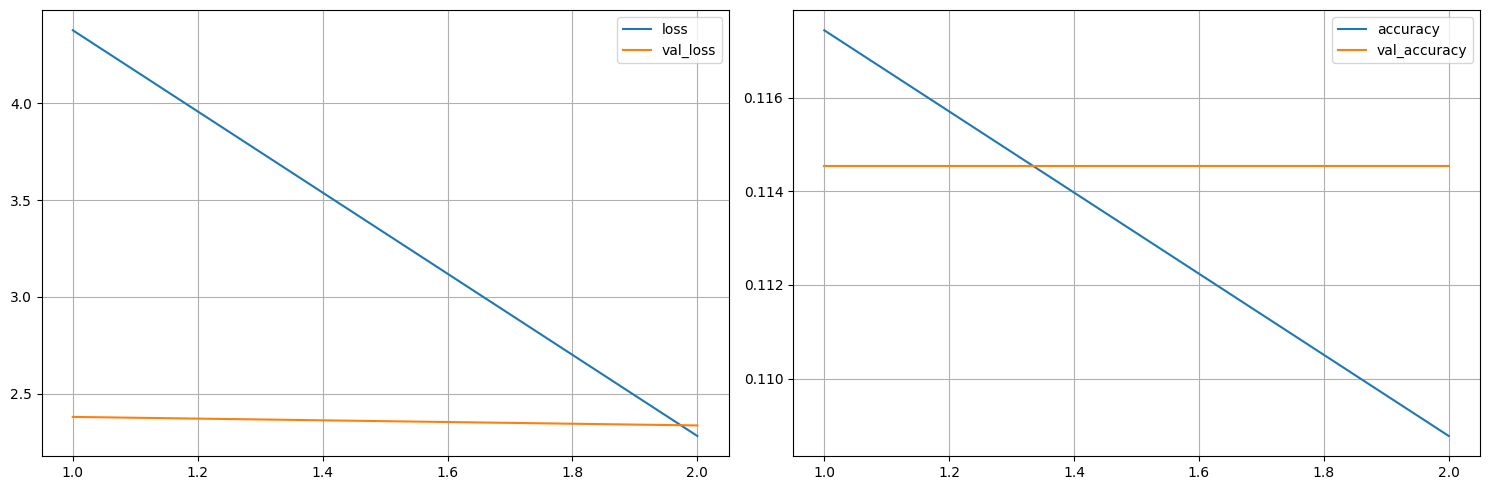

62/62 [==============================] - 19s 314ms/step - loss: 2.2819 - accuracy: 0.1088 - val_loss: 2.3364 - val_accuracy: 0.1145
Epoch 3/20
62/62 [==============================] - ETA: 0s - loss: 2.2820 - accuracy: 0.1206

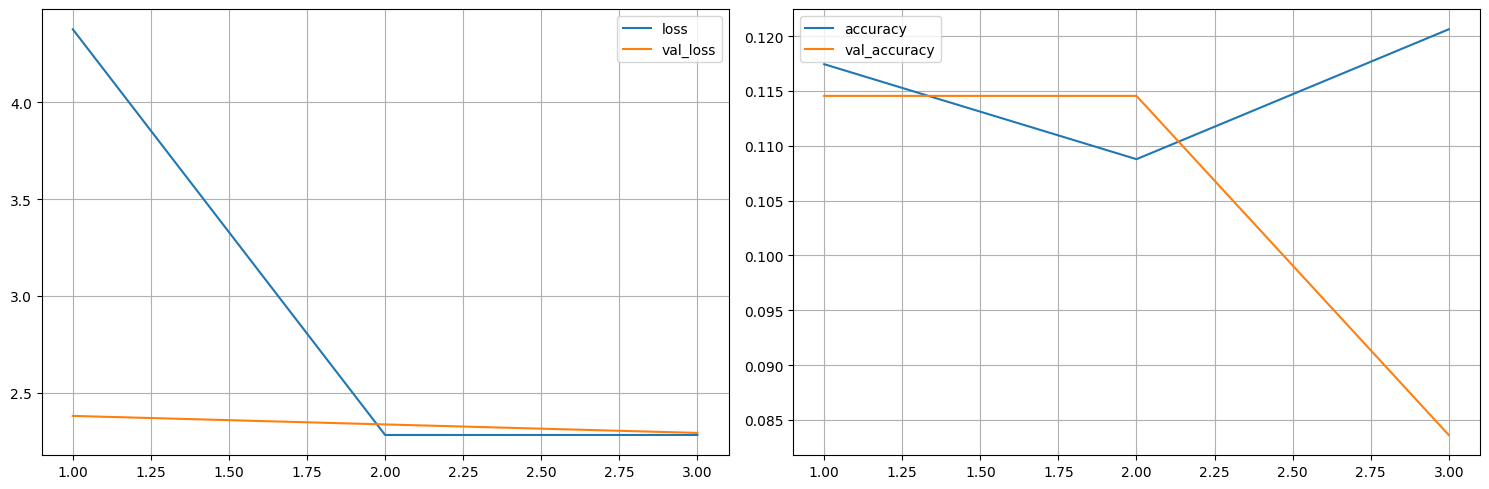

62/62 [==============================] - 19s 313ms/step - loss: 2.2820 - accuracy: 0.1206 - val_loss: 2.2926 - val_accuracy: 0.0836
Epoch 4/20
62/62 [==============================] - ETA: 0s - loss: 2.2839 - accuracy: 0.1216

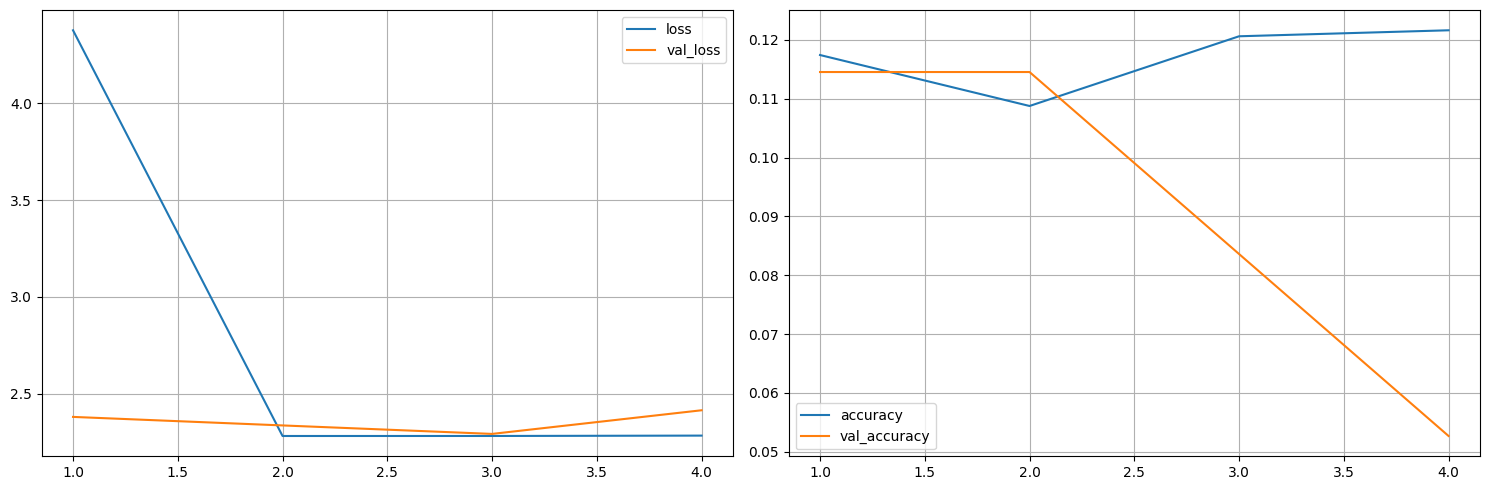

62/62 [==============================] - 20s 315ms/step - loss: 2.2839 - accuracy: 0.1216 - val_loss: 2.4147 - val_accuracy: 0.0527
Epoch 5/20
62/62 [==============================] - ETA: 0s - loss: 2.2867 - accuracy: 0.1387

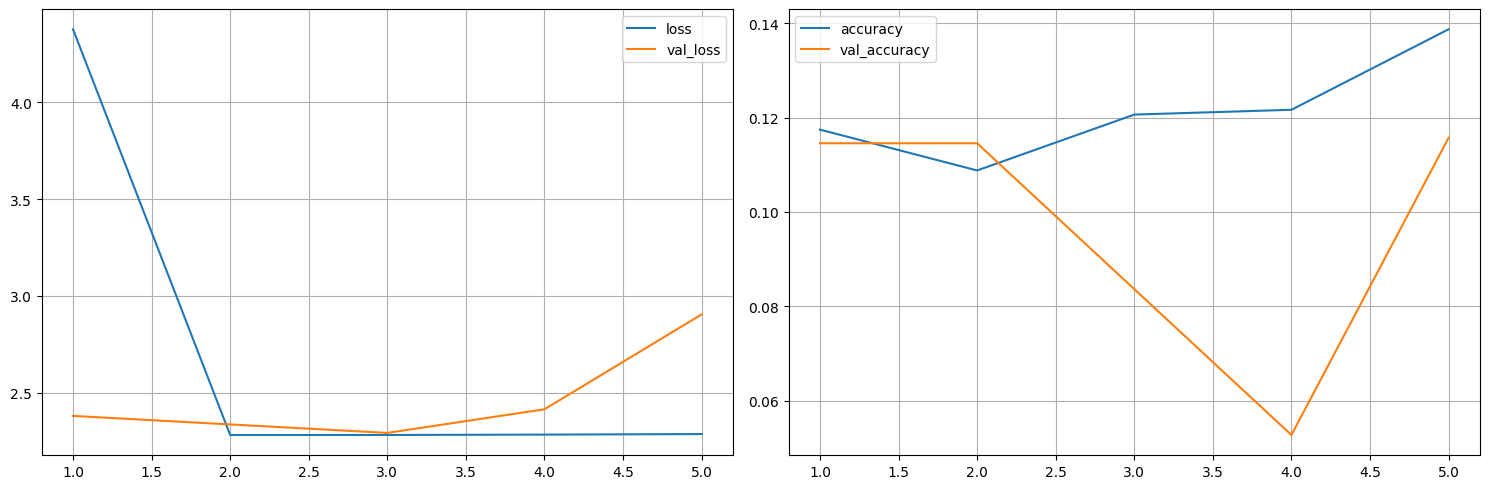

62/62 [==============================] - 20s 322ms/step - loss: 2.2867 - accuracy: 0.1387 - val_loss: 2.9045 - val_accuracy: 0.1157
Epoch 6/20
62/62 [==============================] - ETA: 0s - loss: 2.2923 - accuracy: 0.1098

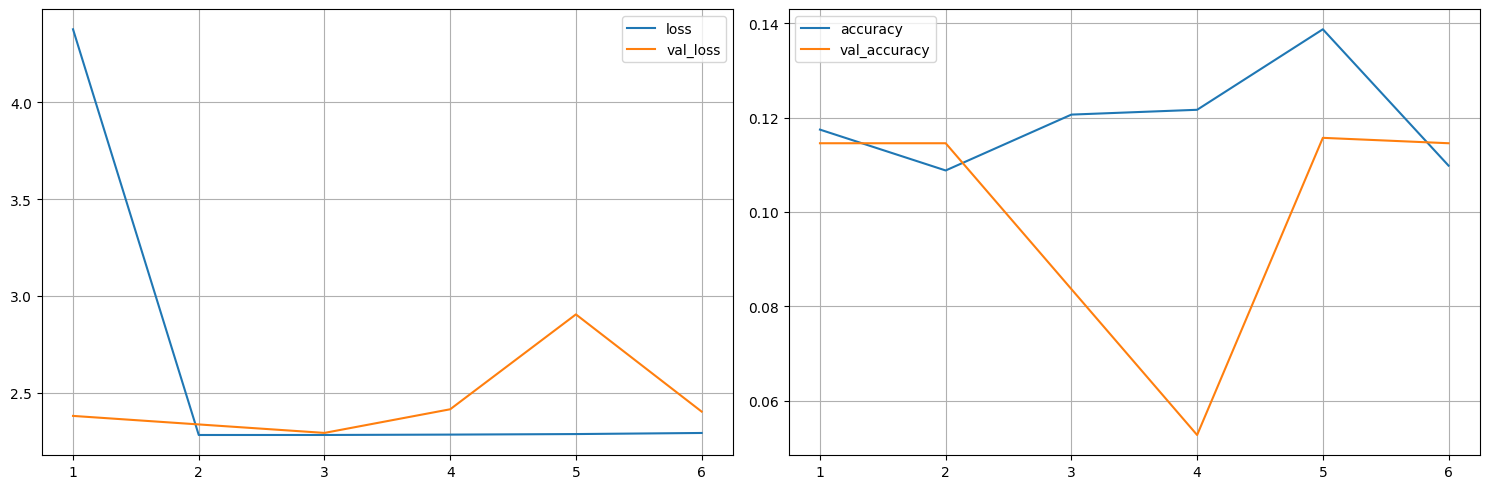

28/28 [==============================] - 1s 27ms/step - loss: 2.4027 - accuracy: 0.1145
Validation accuracy: 0.11454753577709198
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


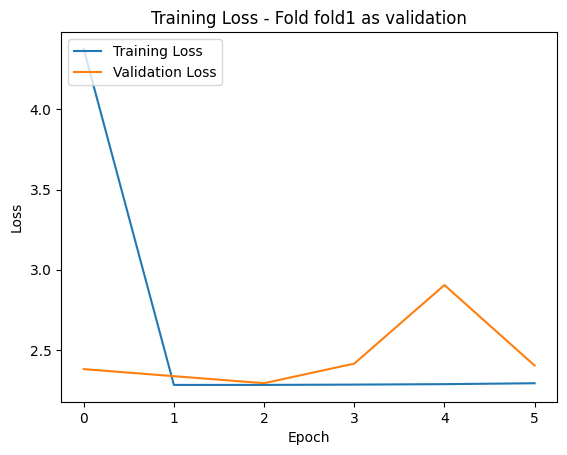

Training using fold2 as validation
Epoch 1/20
 6/62 [=>............................] - ETA: 16s - loss: 8.1598 - accuracy: 0.1159

62/62 [==============================] - ETA: 0s - loss: 3.4148 - accuracy: 0.1186

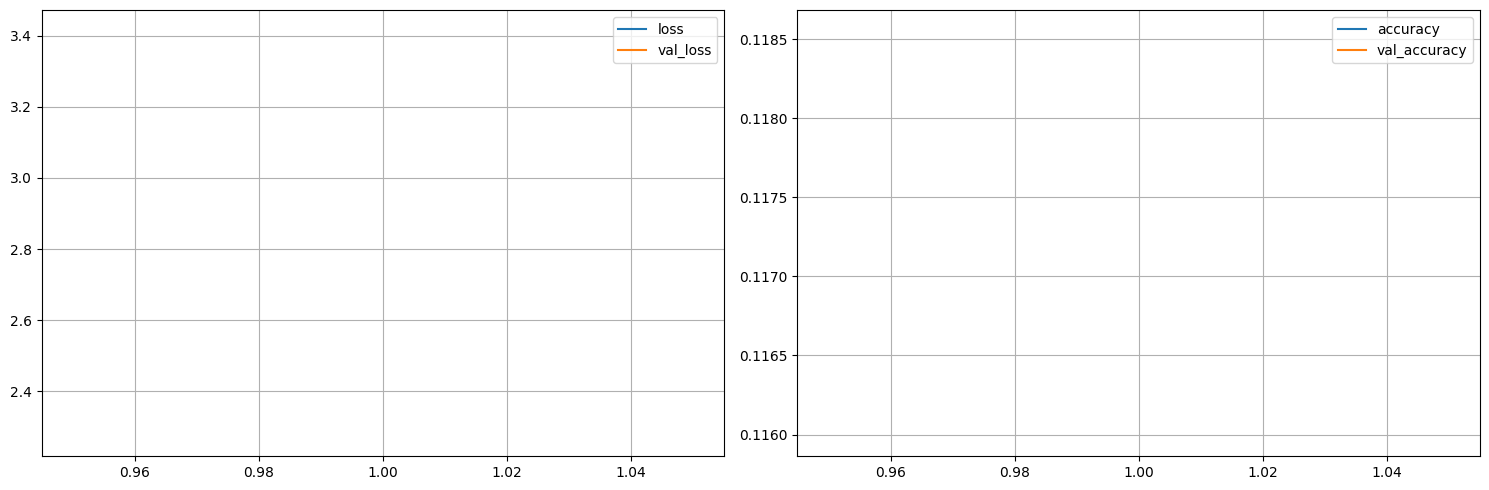

62/62 [==============================] - 25s 377ms/step - loss: 3.4148 - accuracy: 0.1186 - val_loss: 2.2748 - val_accuracy: 0.1160
Epoch 2/20
62/62 [==============================] - ETA: 0s - loss: 2.2669 - accuracy: 0.1295

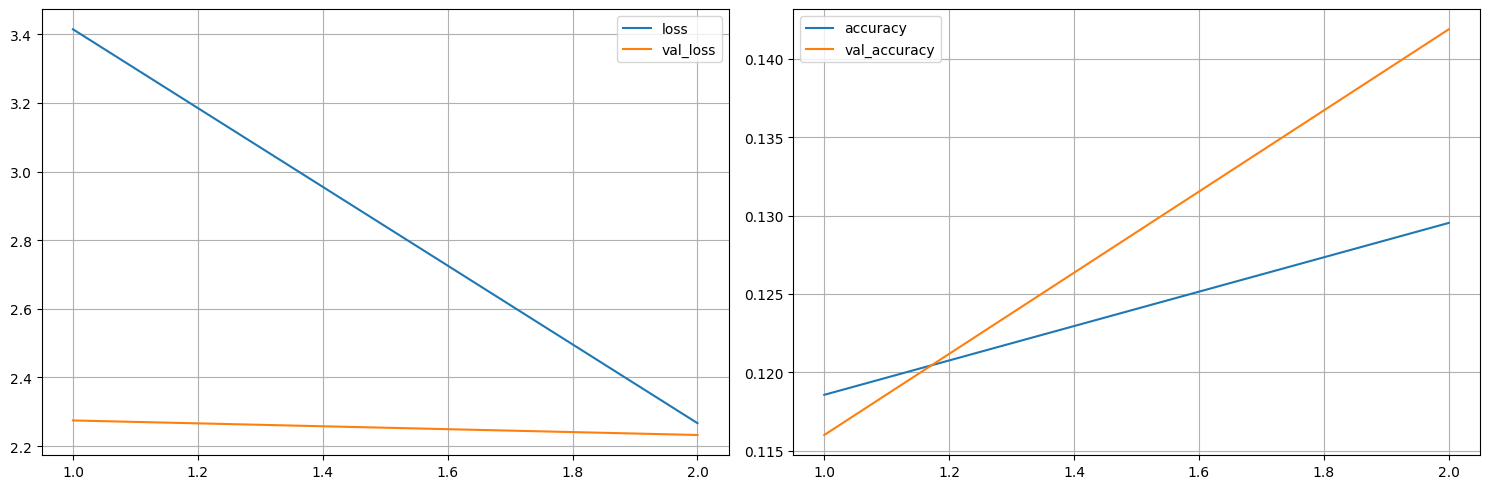

62/62 [==============================] - 20s 319ms/step - loss: 2.2669 - accuracy: 0.1295 - val_loss: 2.2324 - val_accuracy: 0.1419
Epoch 3/20
62/62 [==============================] - ETA: 0s - loss: 2.2223 - accuracy: 0.1534

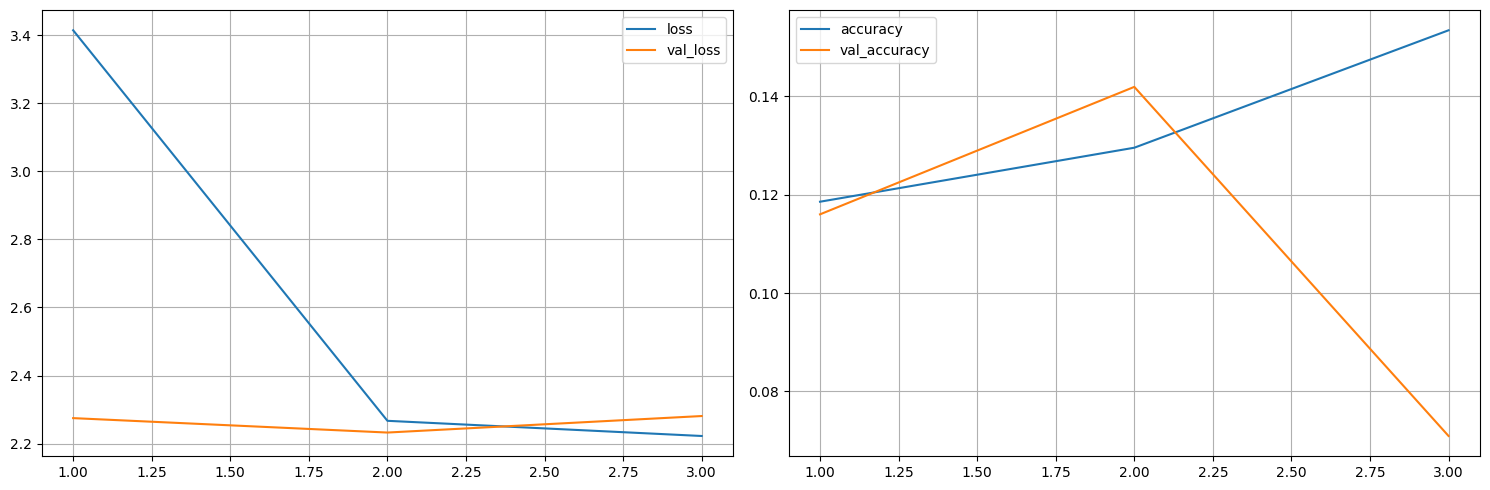

62/62 [==============================] - 20s 317ms/step - loss: 2.2223 - accuracy: 0.1534 - val_loss: 2.2809 - val_accuracy: 0.0709
Epoch 4/20
62/62 [==============================] - ETA: 0s - loss: 2.2119 - accuracy: 0.1526

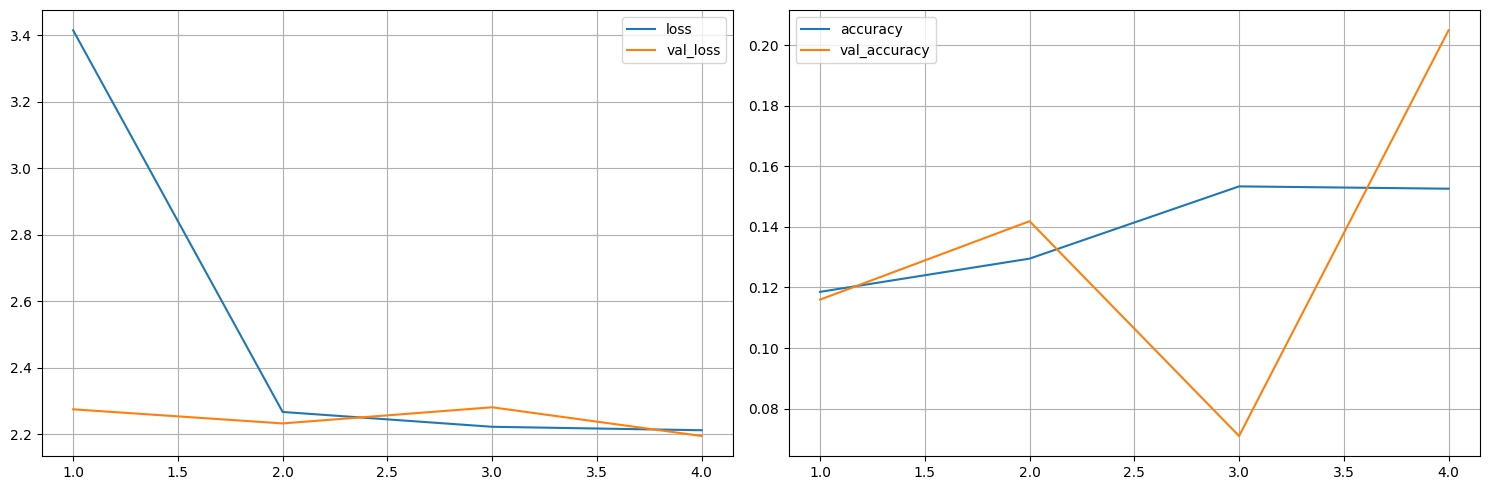

62/62 [==============================] - 20s 316ms/step - loss: 2.2119 - accuracy: 0.1526 - val_loss: 2.1946 - val_accuracy: 0.2050
Epoch 5/20
62/62 [==============================] - ETA: 0s - loss: 2.1231 - accuracy: 0.1918

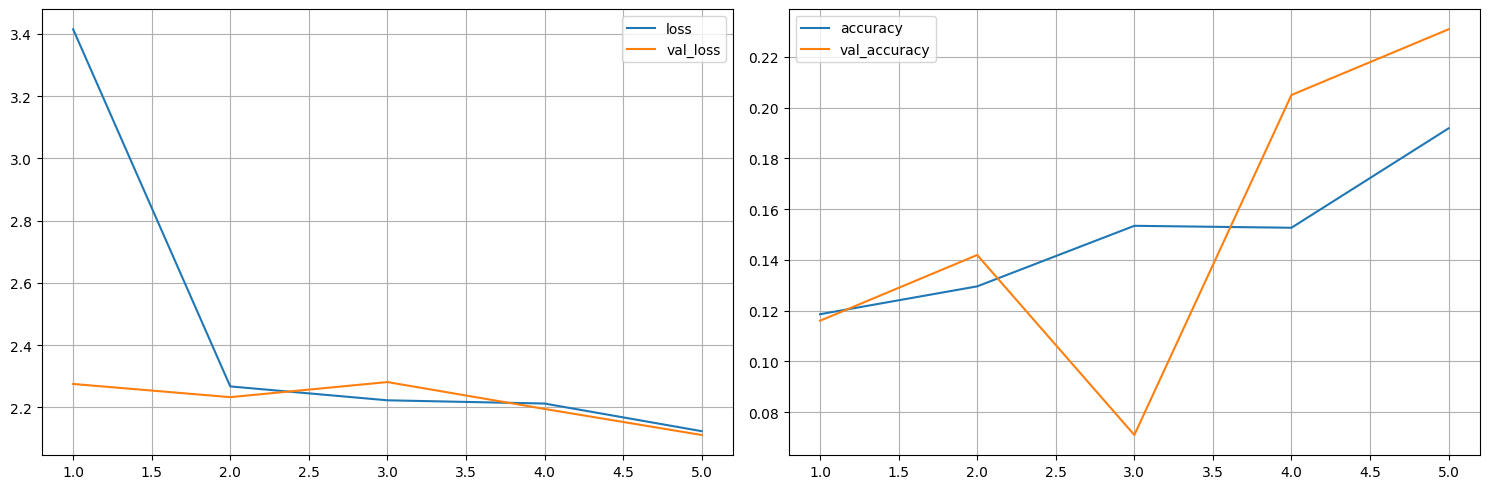

62/62 [==============================] - 20s 325ms/step - loss: 2.1231 - accuracy: 0.1918 - val_loss: 2.1108 - val_accuracy: 0.2309
Epoch 6/20
62/62 [==============================] - ETA: 0s - loss: 2.0642 - accuracy: 0.2275

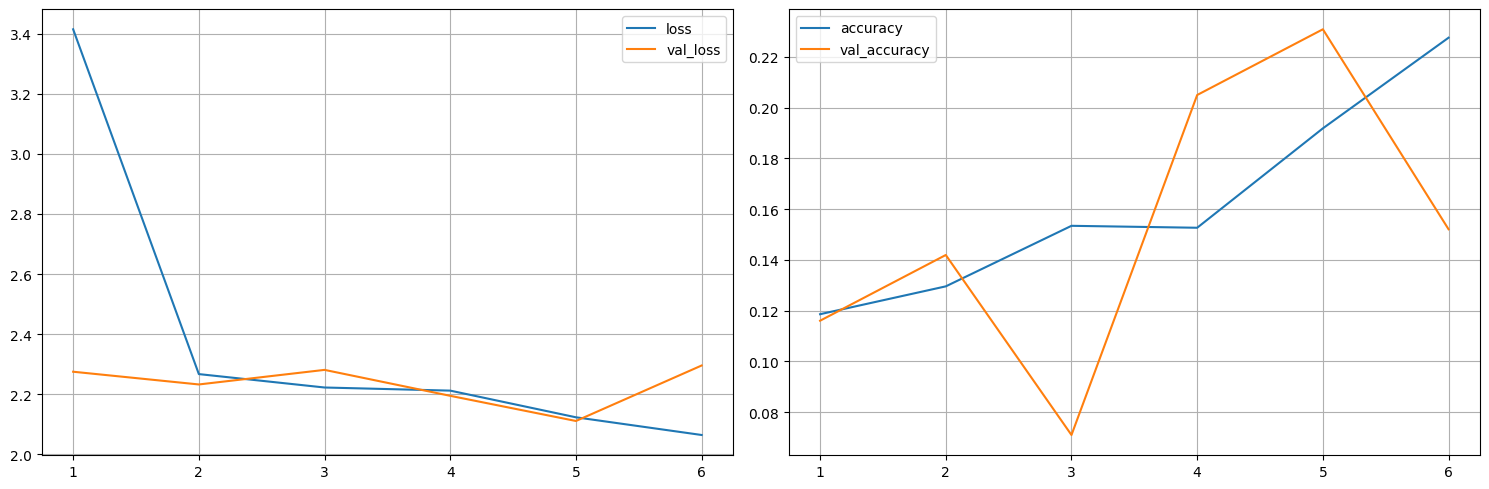

62/62 [==============================] - 20s 321ms/step - loss: 2.0642 - accuracy: 0.2275 - val_loss: 2.2955 - val_accuracy: 0.1520
Epoch 7/20
62/62 [==============================] - ETA: 0s - loss: 1.9439 - accuracy: 0.2767

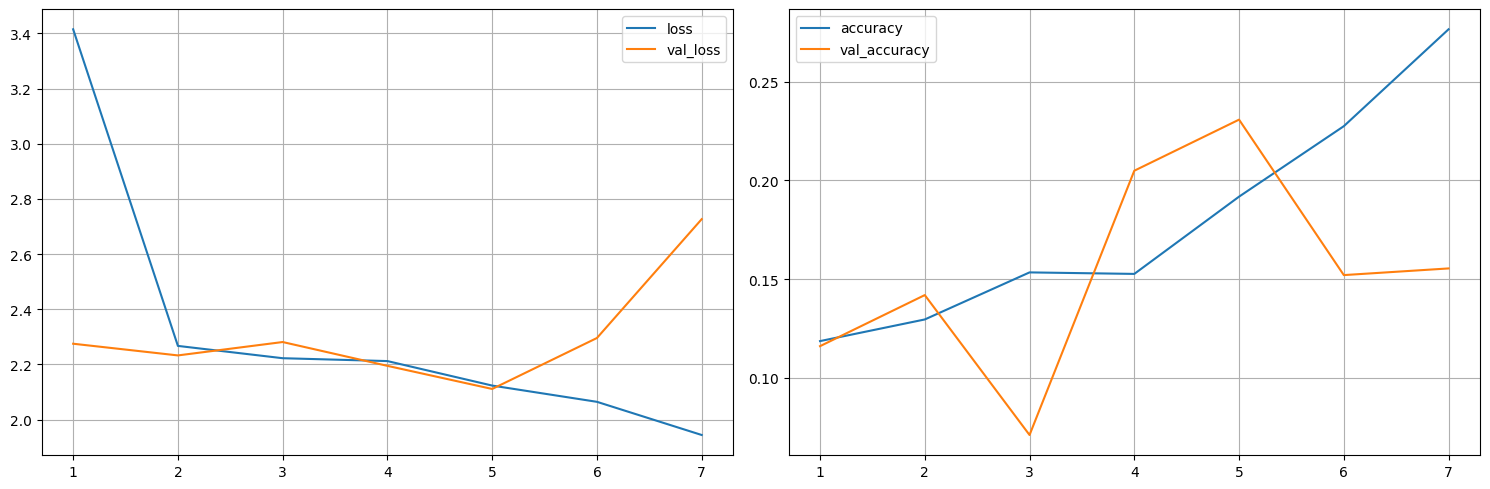

62/62 [==============================] - 20s 329ms/step - loss: 1.9439 - accuracy: 0.2767 - val_loss: 2.7264 - val_accuracy: 0.1554
Epoch 8/20
62/62 [==============================] - ETA: 0s - loss: 1.8031 - accuracy: 0.3364

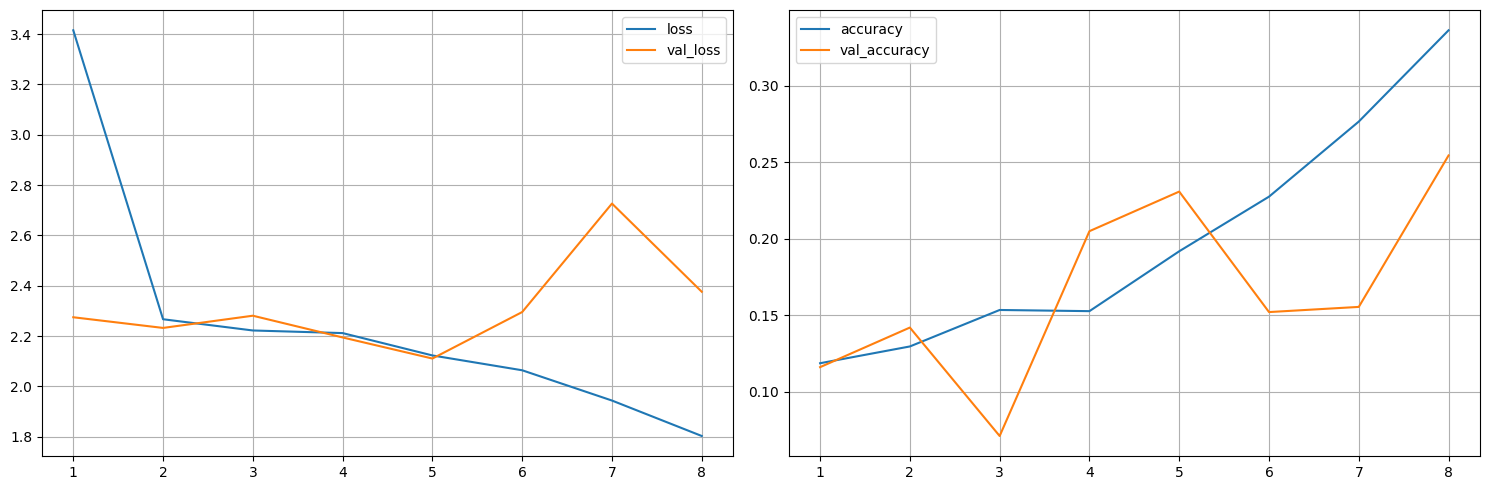

28/28 [==============================] - 1s 31ms/step - loss: 2.3761 - accuracy: 0.2545
Validation accuracy: 0.2545045018196106
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


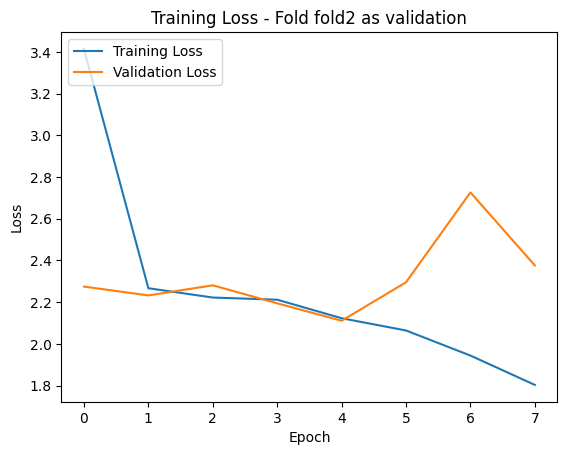

Training using fold3 as validation
Epoch 1/20
 6/61 [=>............................] - ETA: 17s - loss: 8.6632 - accuracy: 0.1133

61/61 [==============================] - ETA: 0s - loss: 4.4007 - accuracy: 0.1117

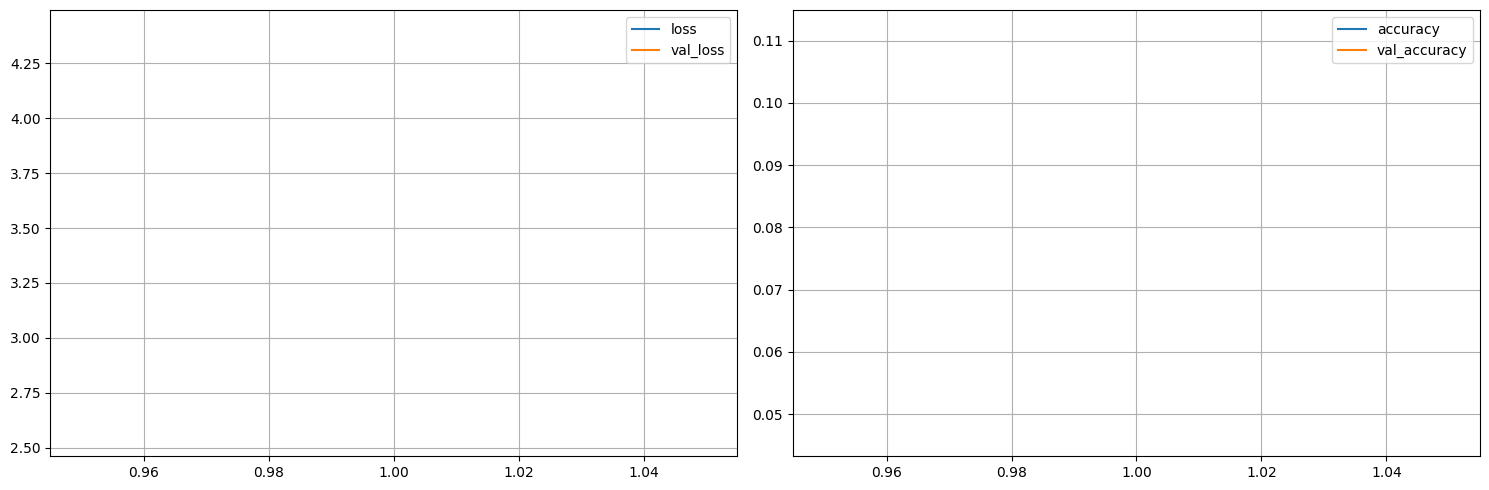

61/61 [==============================] - 25s 381ms/step - loss: 4.4007 - accuracy: 0.1117 - val_loss: 2.5525 - val_accuracy: 0.0465
Epoch 2/20
61/61 [==============================] - ETA: 0s - loss: 2.2815 - accuracy: 0.1248

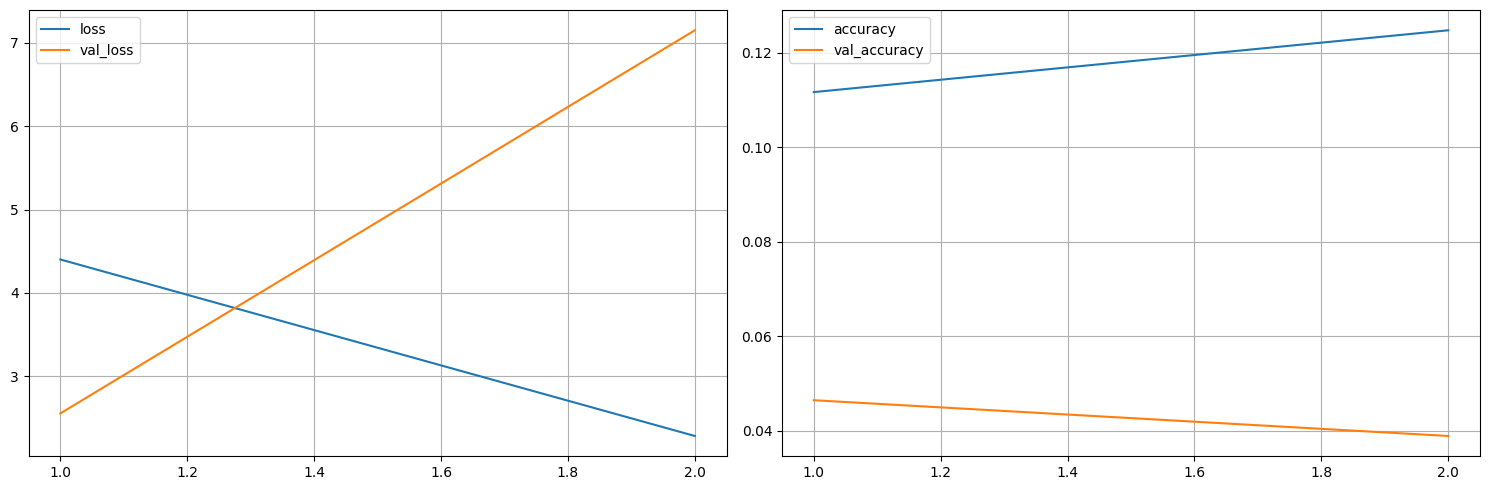

61/61 [==============================] - 20s 323ms/step - loss: 2.2815 - accuracy: 0.1248 - val_loss: 7.1518 - val_accuracy: 0.0389
Epoch 3/20
61/61 [==============================] - ETA: 0s - loss: 2.2390 - accuracy: 0.1473

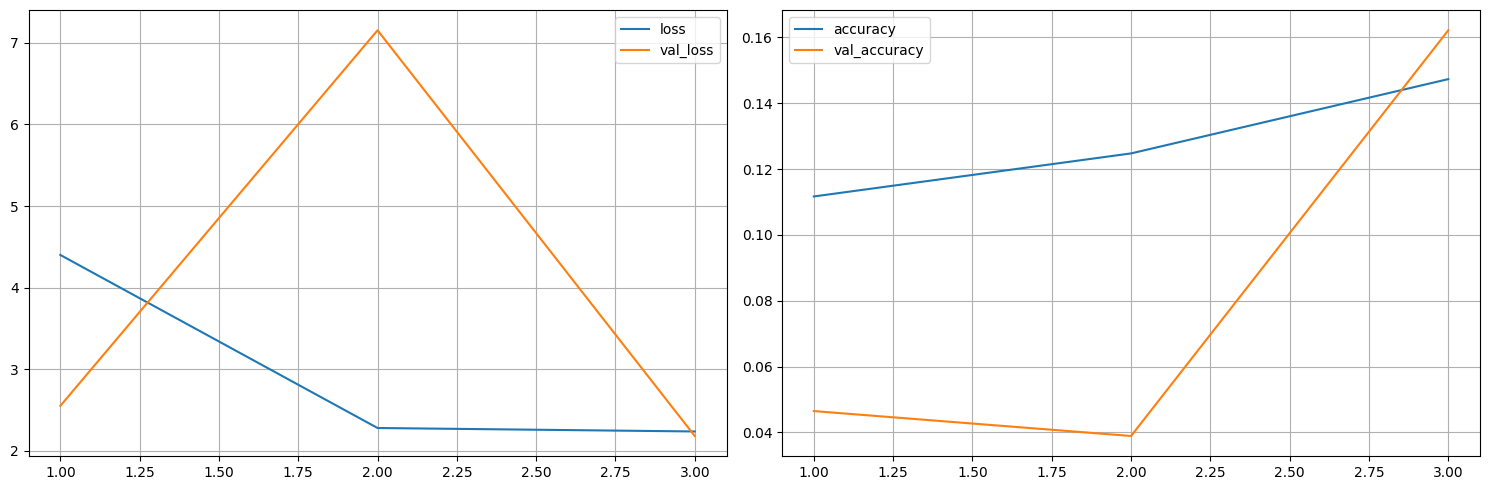

61/61 [==============================] - 20s 331ms/step - loss: 2.2390 - accuracy: 0.1473 - val_loss: 2.1837 - val_accuracy: 0.1622
Epoch 4/20
61/61 [==============================] - ETA: 0s - loss: 2.1481 - accuracy: 0.1894

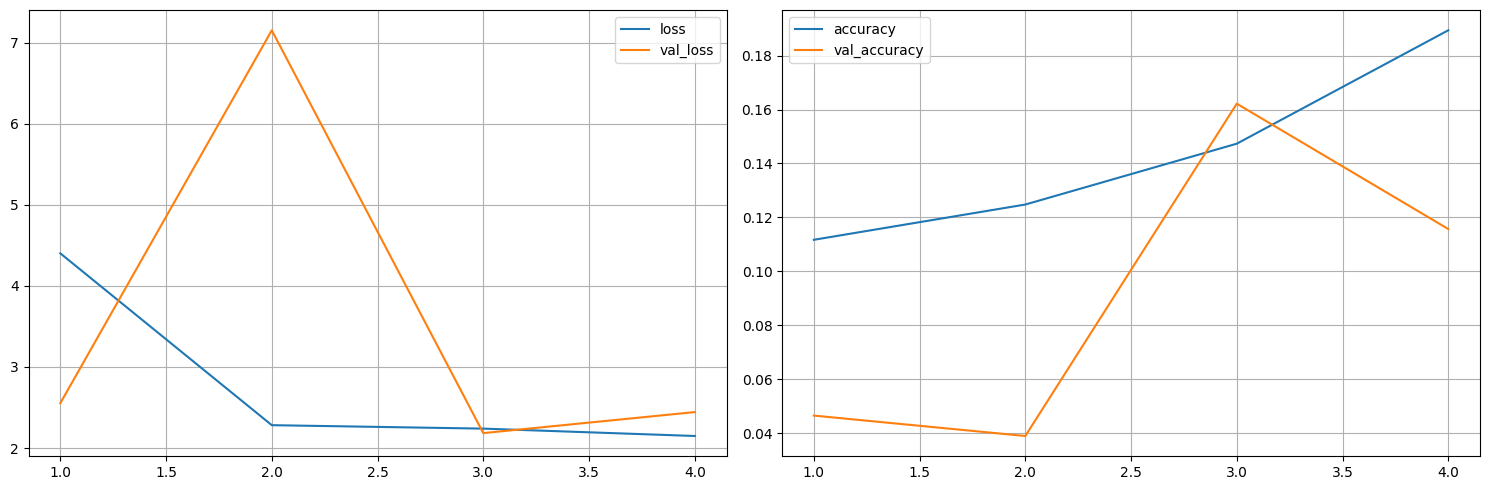

61/61 [==============================] - 20s 324ms/step - loss: 2.1481 - accuracy: 0.1894 - val_loss: 2.4429 - val_accuracy: 0.1157
Epoch 5/20
61/61 [==============================] - ETA: 0s - loss: 2.0405 - accuracy: 0.2462

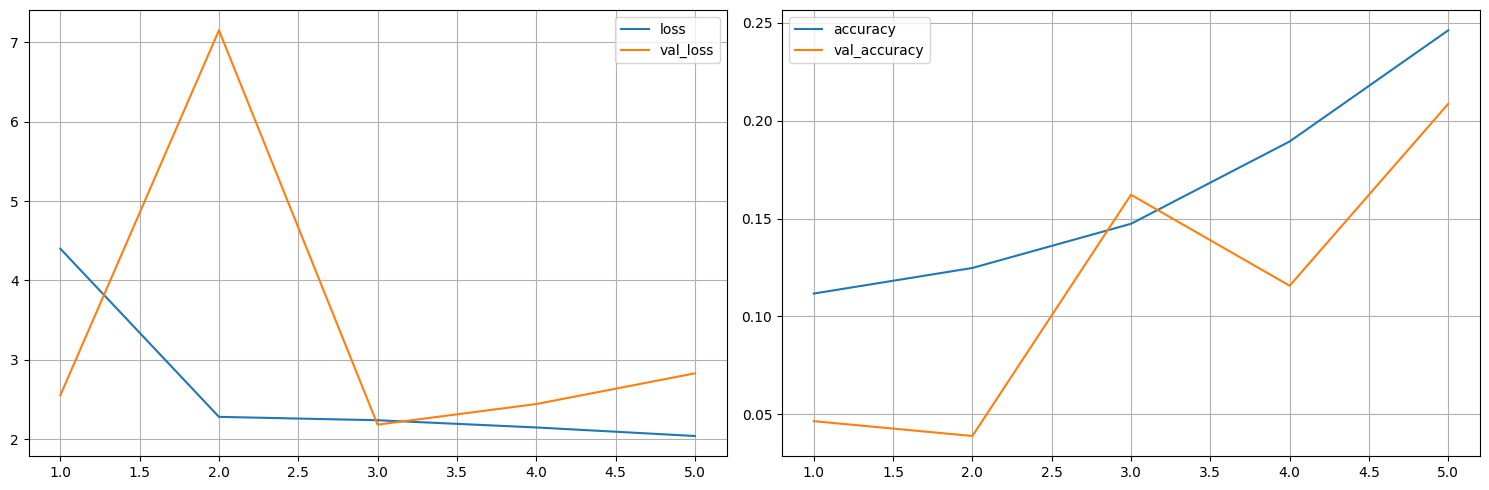

61/61 [==============================] - 20s 325ms/step - loss: 2.0405 - accuracy: 0.2462 - val_loss: 2.8298 - val_accuracy: 0.2086
Epoch 6/20
61/61 [==============================] - ETA: 0s - loss: 1.6962 - accuracy: 0.3913

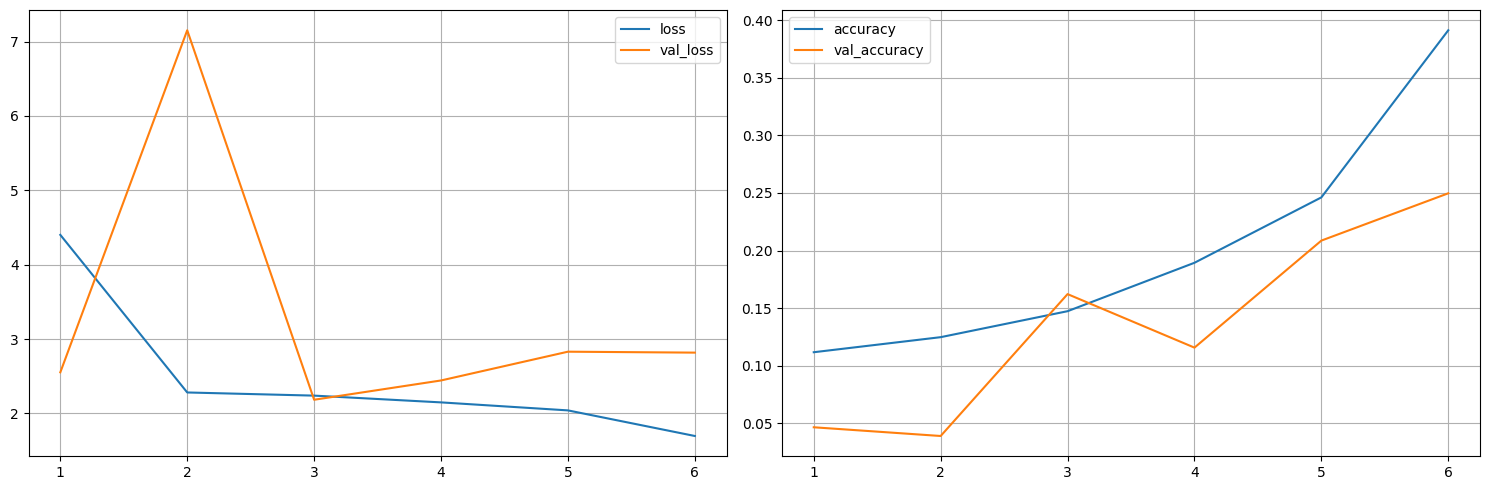

29/29 [==============================] - 1s 20ms/step - loss: 2.8172 - accuracy: 0.2497
Validation accuracy: 0.249729722738266
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


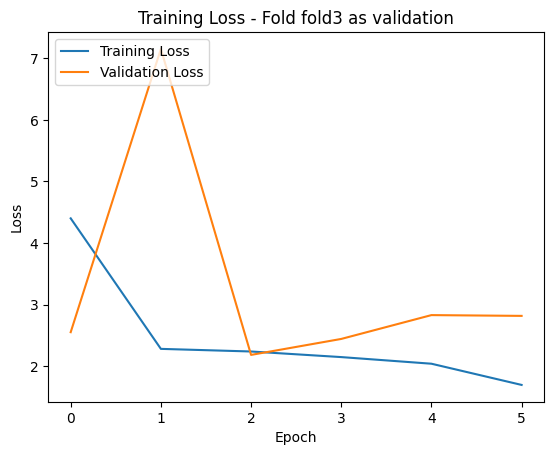

Training using fold4 as validation
Epoch 1/20
 6/61 [=>............................] - ETA: 16s - loss: 9.7661 - accuracy: 0.1055

61/61 [==============================] - ETA: 0s - loss: 4.6194 - accuracy: 0.1049

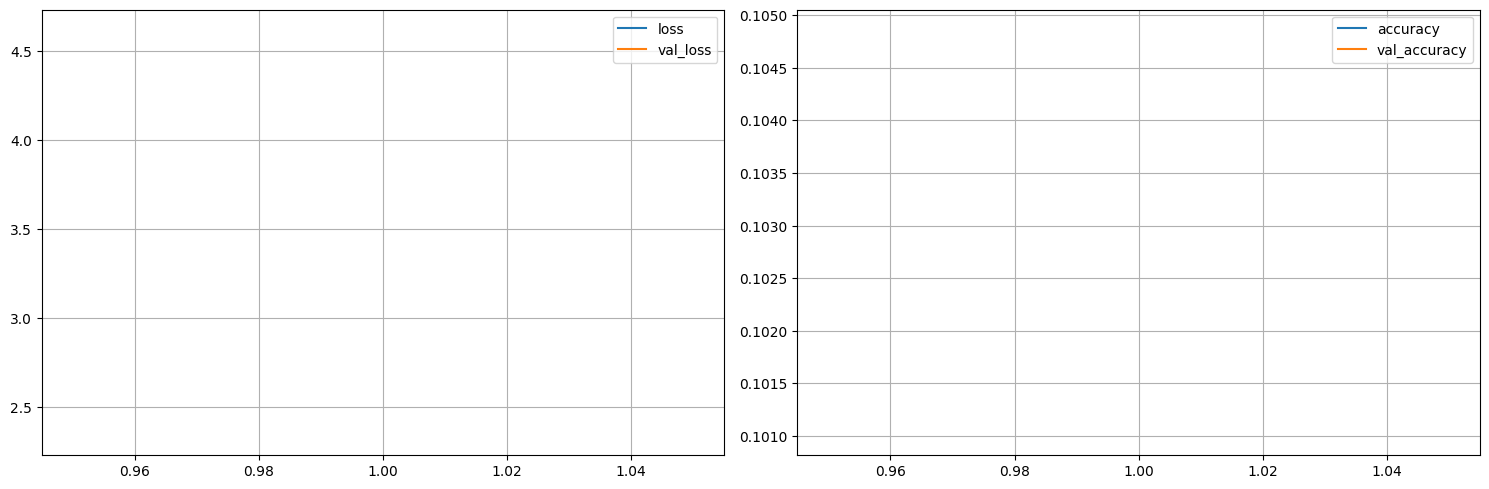

61/61 [==============================] - 25s 390ms/step - loss: 4.6194 - accuracy: 0.1049 - val_loss: 2.3454 - val_accuracy: 0.1010
Epoch 2/20
61/61 [==============================] - ETA: 0s - loss: 2.2641 - accuracy: 0.1391

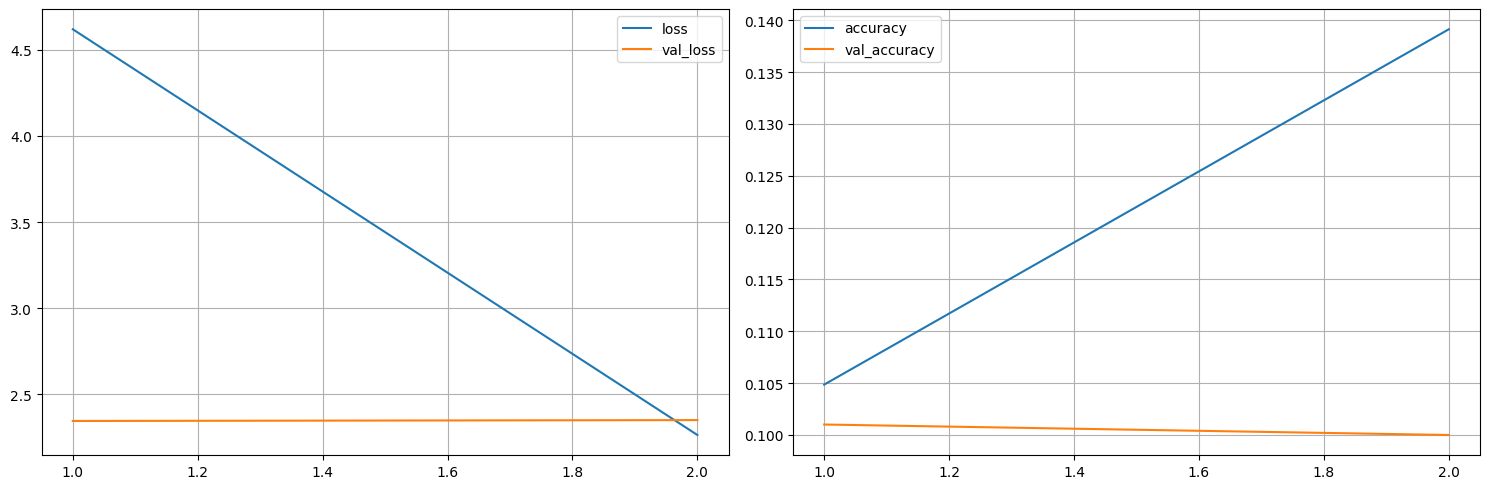

61/61 [==============================] - 20s 320ms/step - loss: 2.2641 - accuracy: 0.1391 - val_loss: 2.3506 - val_accuracy: 0.1000
Epoch 3/20
61/61 [==============================] - ETA: 0s - loss: 2.2422 - accuracy: 0.1466

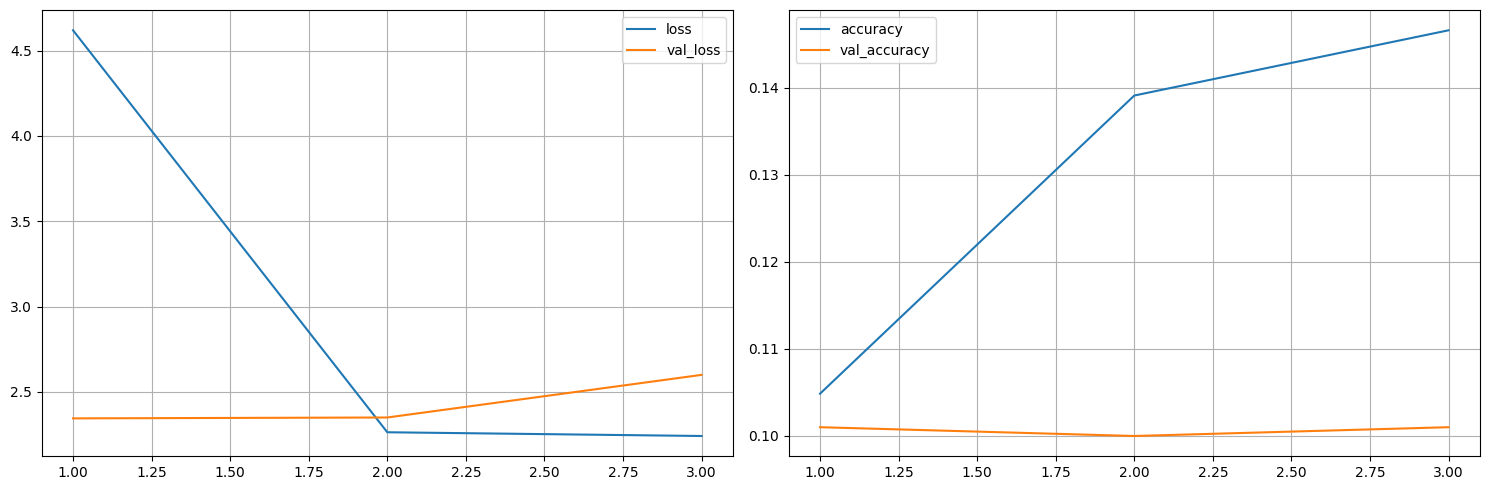

61/61 [==============================] - 20s 322ms/step - loss: 2.2422 - accuracy: 0.1466 - val_loss: 2.6003 - val_accuracy: 0.1010
Epoch 4/20
61/61 [==============================] - ETA: 0s - loss: 2.2267 - accuracy: 0.1546

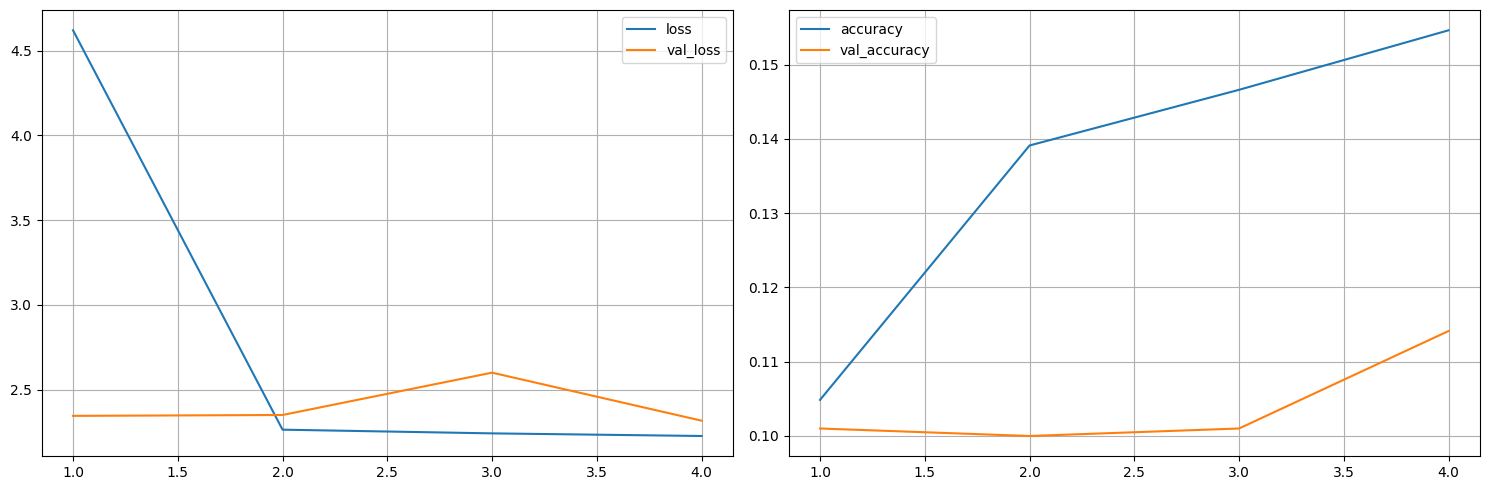

61/61 [==============================] - 20s 324ms/step - loss: 2.2267 - accuracy: 0.1546 - val_loss: 2.3171 - val_accuracy: 0.1141
Epoch 5/20
61/61 [==============================] - ETA: 0s - loss: 2.1762 - accuracy: 0.1680

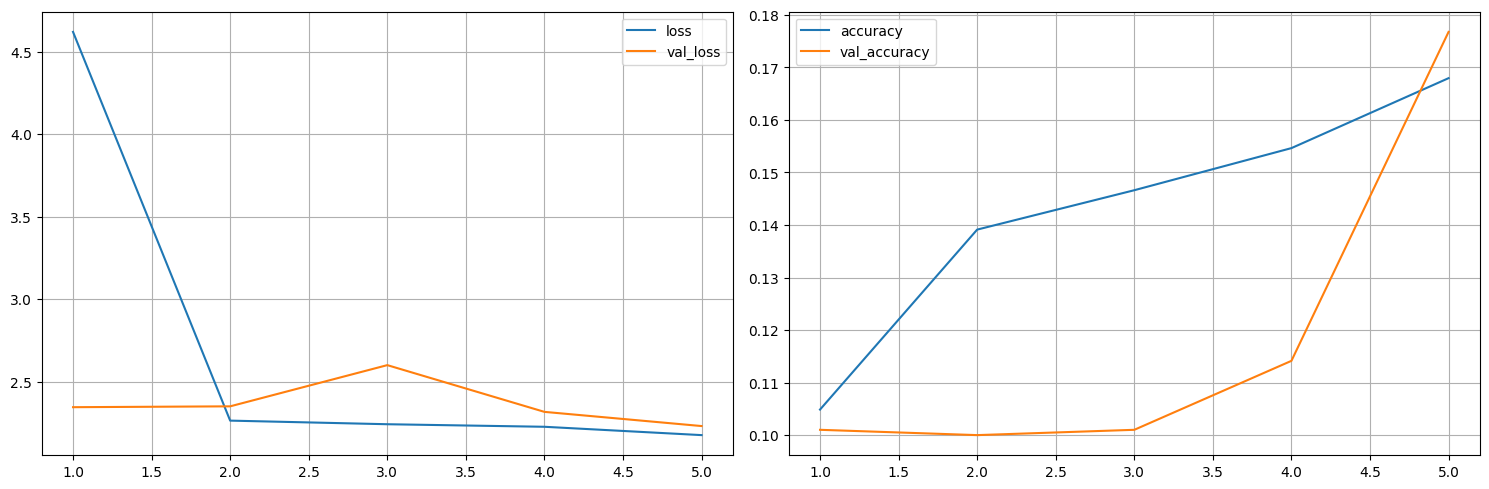

61/61 [==============================] - 20s 325ms/step - loss: 2.1762 - accuracy: 0.1680 - val_loss: 2.2311 - val_accuracy: 0.1768
Epoch 6/20
61/61 [==============================] - ETA: 0s - loss: 2.0771 - accuracy: 0.2202

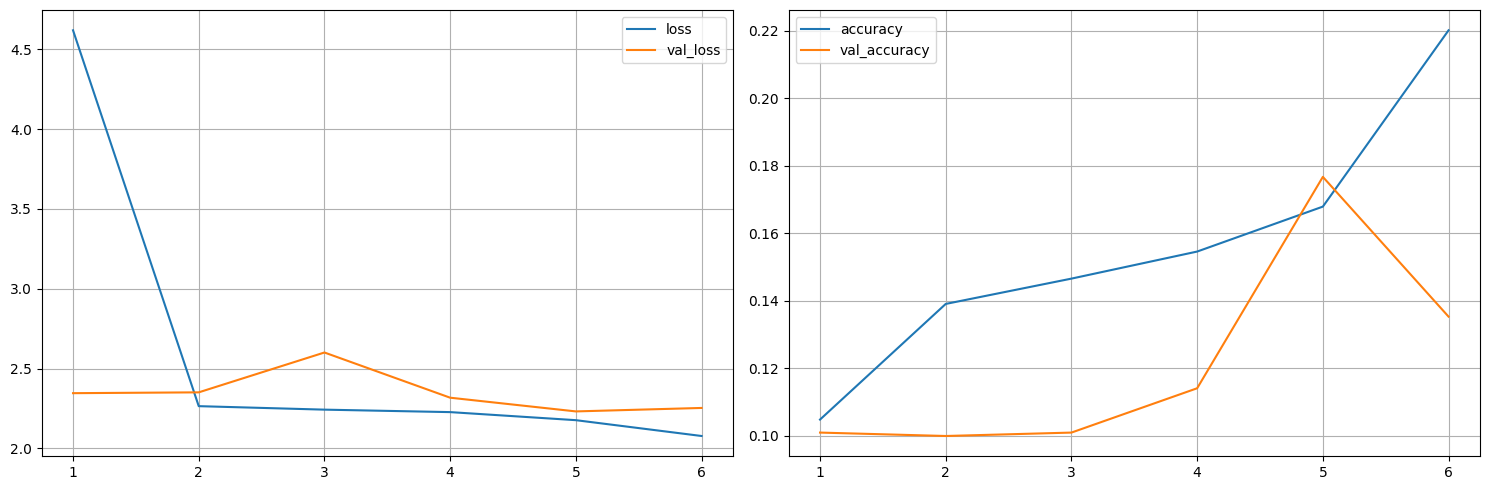

61/61 [==============================] - 19s 319ms/step - loss: 2.0771 - accuracy: 0.2202 - val_loss: 2.2529 - val_accuracy: 0.1354
Epoch 7/20
61/61 [==============================] - ETA: 0s - loss: 1.8073 - accuracy: 0.3399

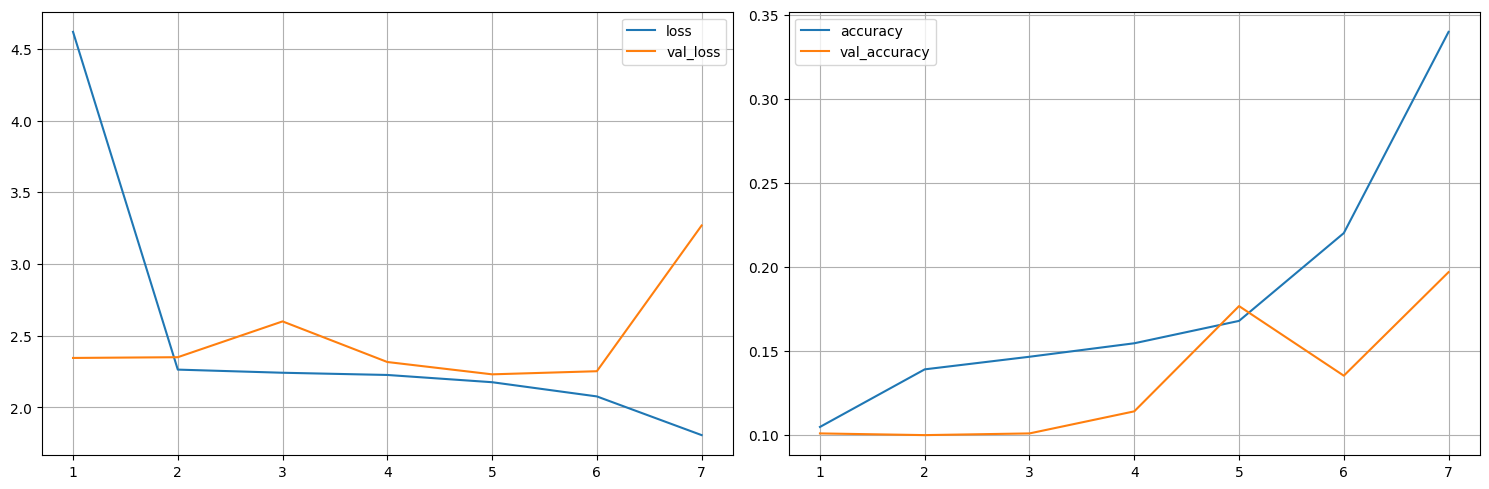

61/61 [==============================] - 20s 326ms/step - loss: 1.8073 - accuracy: 0.3399 - val_loss: 3.2692 - val_accuracy: 0.1970
Epoch 8/20
61/61 [==============================] - ETA: 0s - loss: 1.3776 - accuracy: 0.5239

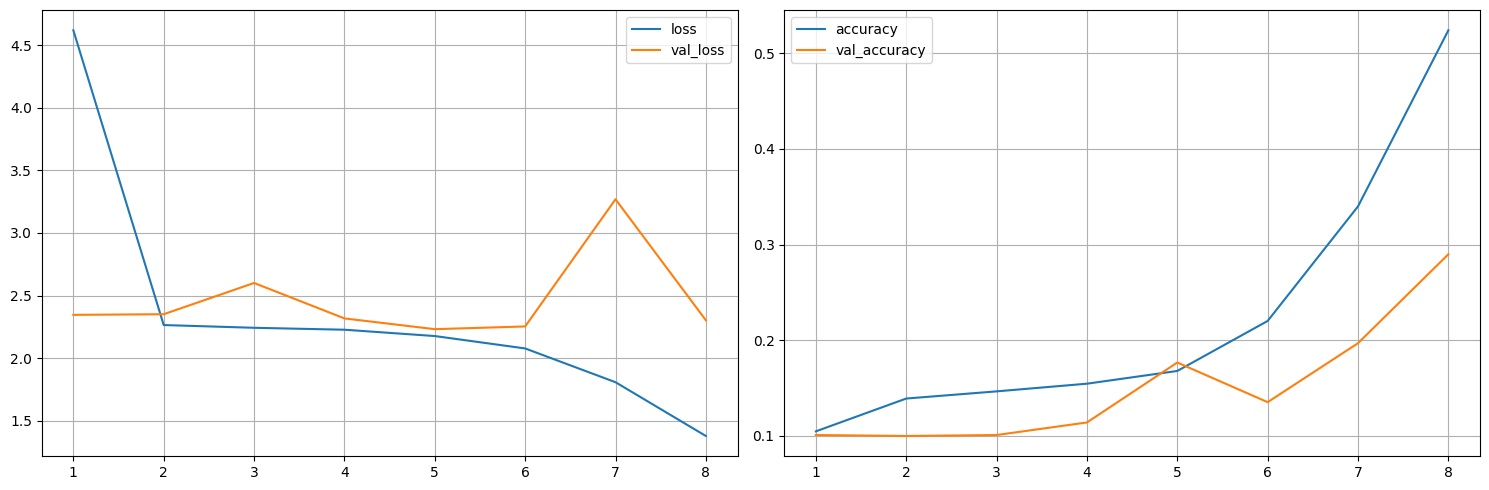

31/31 [==============================] - 1s 33ms/step - loss: 2.3022 - accuracy: 0.2899
Validation accuracy: 0.28989899158477783
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


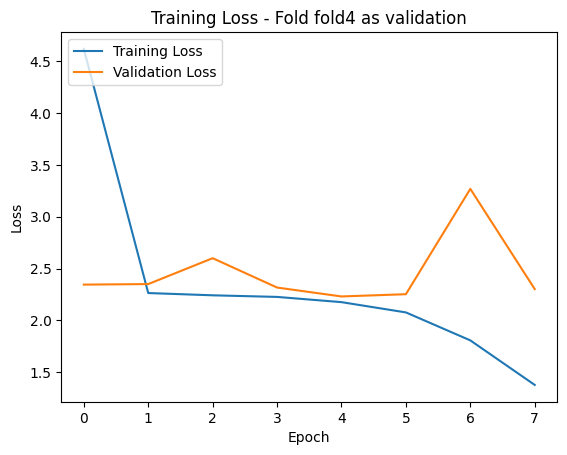

Training using fold5 as validation
Epoch 1/20
 6/61 [=>............................] - ETA: 16s - loss: 9.6855 - accuracy: 0.1276

61/61 [==============================] - ETA: 0s - loss: 4.7309 - accuracy: 0.1136

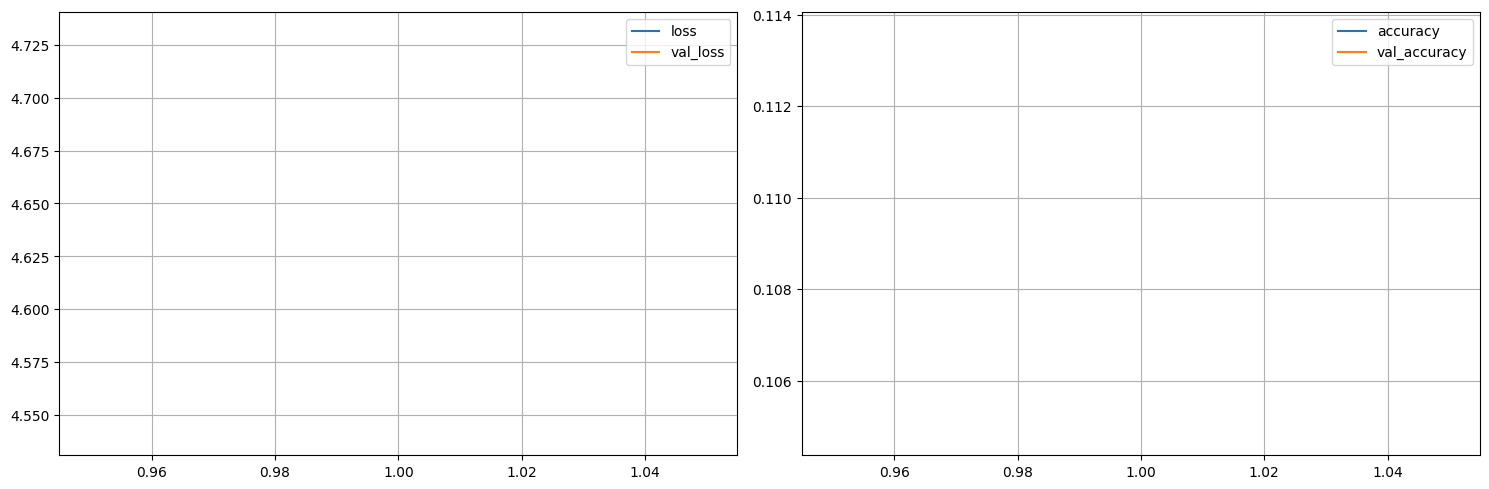

61/61 [==============================] - 25s 371ms/step - loss: 4.7309 - accuracy: 0.1136 - val_loss: 4.5406 - val_accuracy: 0.1048
Epoch 2/20
61/61 [==============================] - ETA: 0s - loss: 2.2616 - accuracy: 0.1353

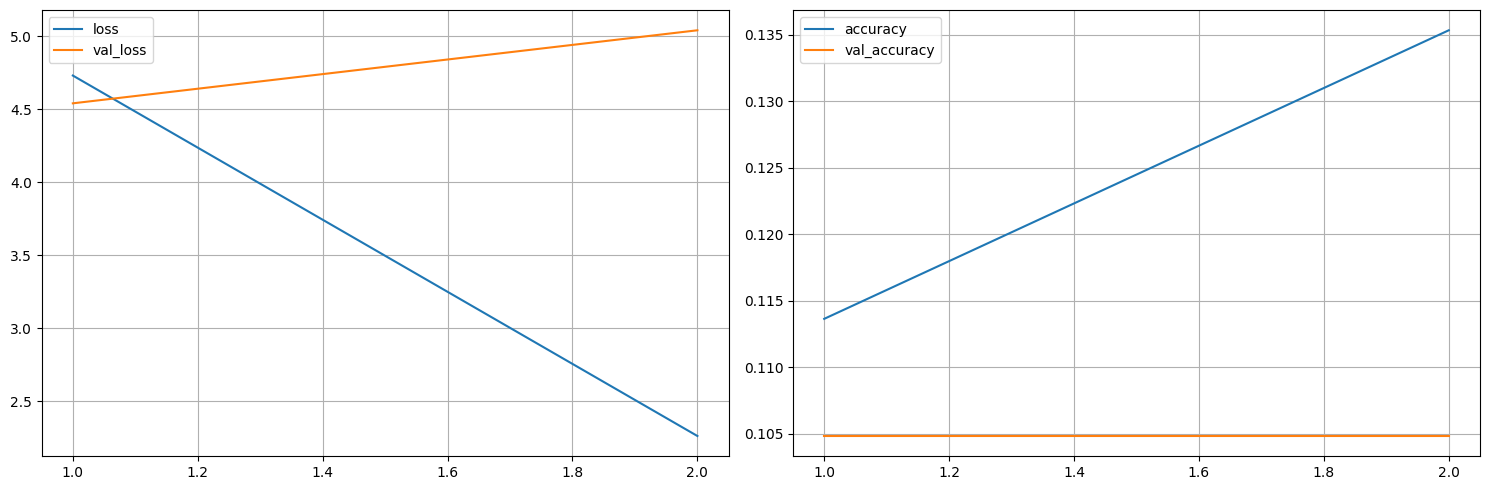

61/61 [==============================] - 20s 323ms/step - loss: 2.2616 - accuracy: 0.1353 - val_loss: 5.0410 - val_accuracy: 0.1048
Epoch 3/20
61/61 [==============================] - ETA: 0s - loss: 2.1645 - accuracy: 0.1761

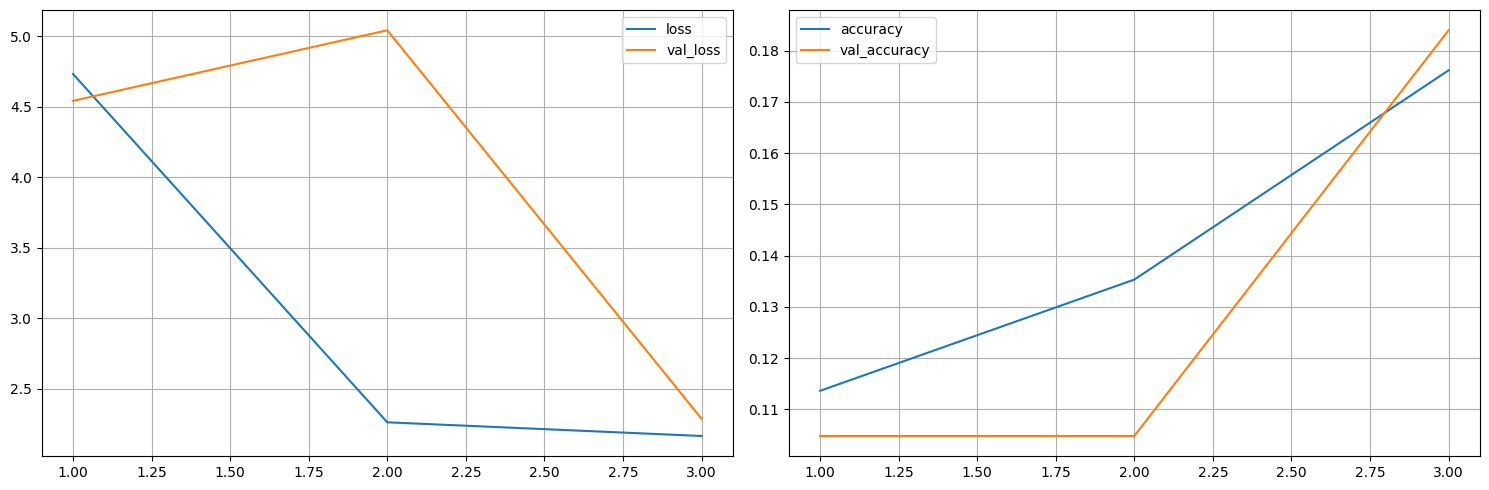

61/61 [==============================] - 20s 327ms/step - loss: 2.1645 - accuracy: 0.1761 - val_loss: 2.2865 - val_accuracy: 0.1840
Epoch 4/20
61/61 [==============================] - ETA: 0s - loss: 2.0835 - accuracy: 0.2125

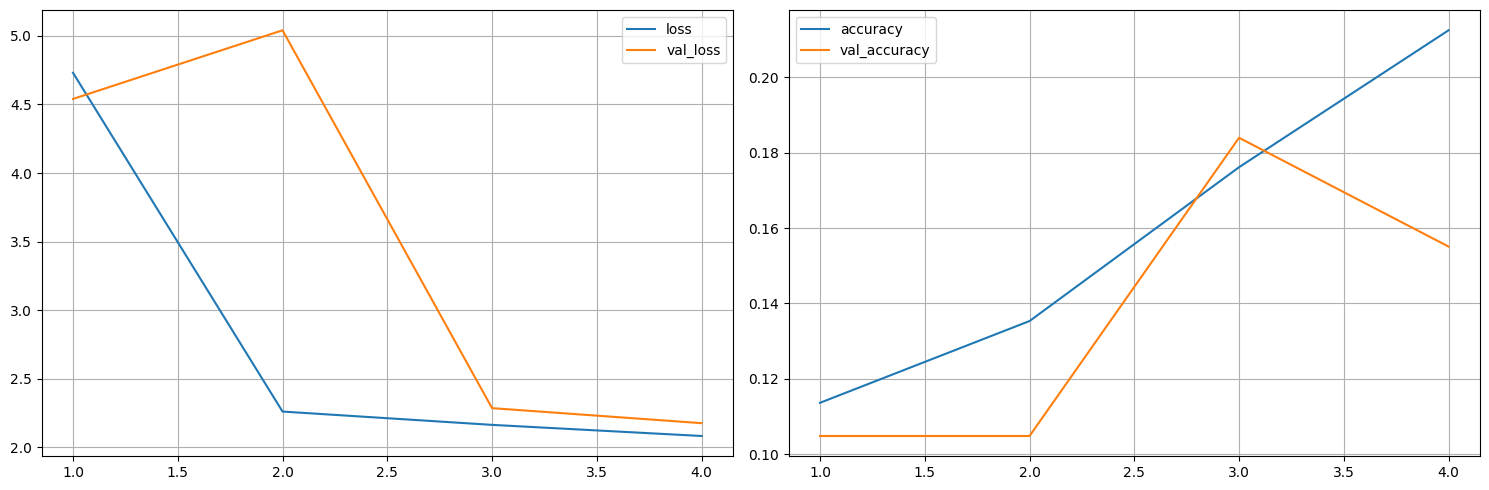

61/61 [==============================] - 20s 324ms/step - loss: 2.0835 - accuracy: 0.2125 - val_loss: 2.1770 - val_accuracy: 0.1551
Epoch 5/20
61/61 [==============================] - ETA: 0s - loss: 1.9483 - accuracy: 0.2738

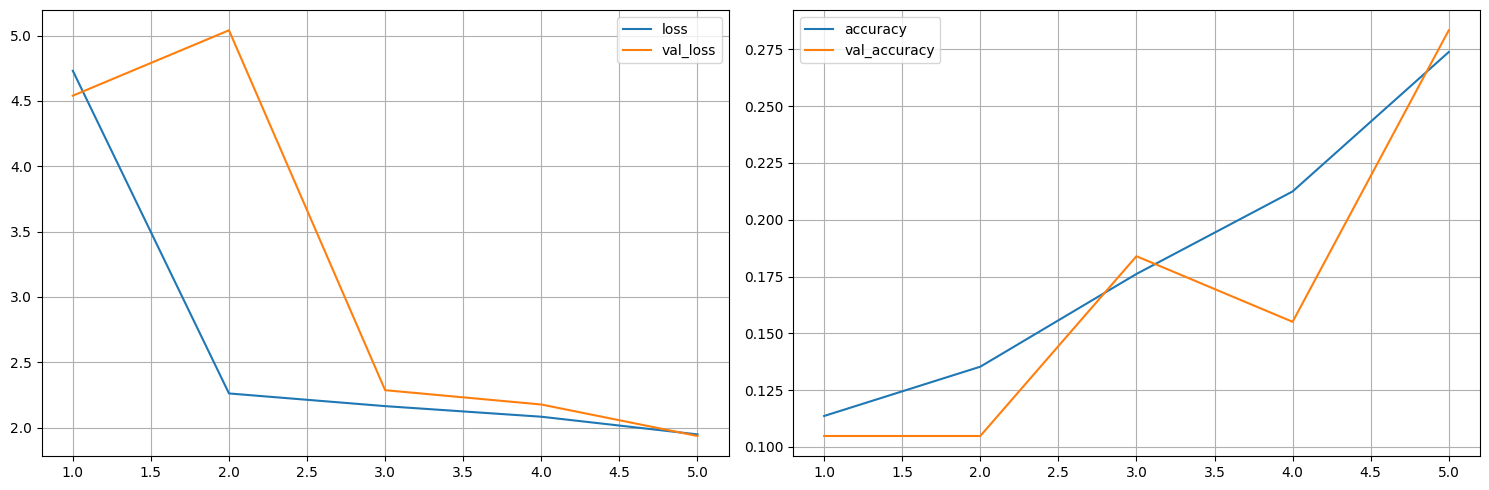

61/61 [==============================] - 20s 324ms/step - loss: 1.9483 - accuracy: 0.2738 - val_loss: 1.9360 - val_accuracy: 0.2834
Epoch 6/20
61/61 [==============================] - ETA: 0s - loss: 1.6827 - accuracy: 0.3884

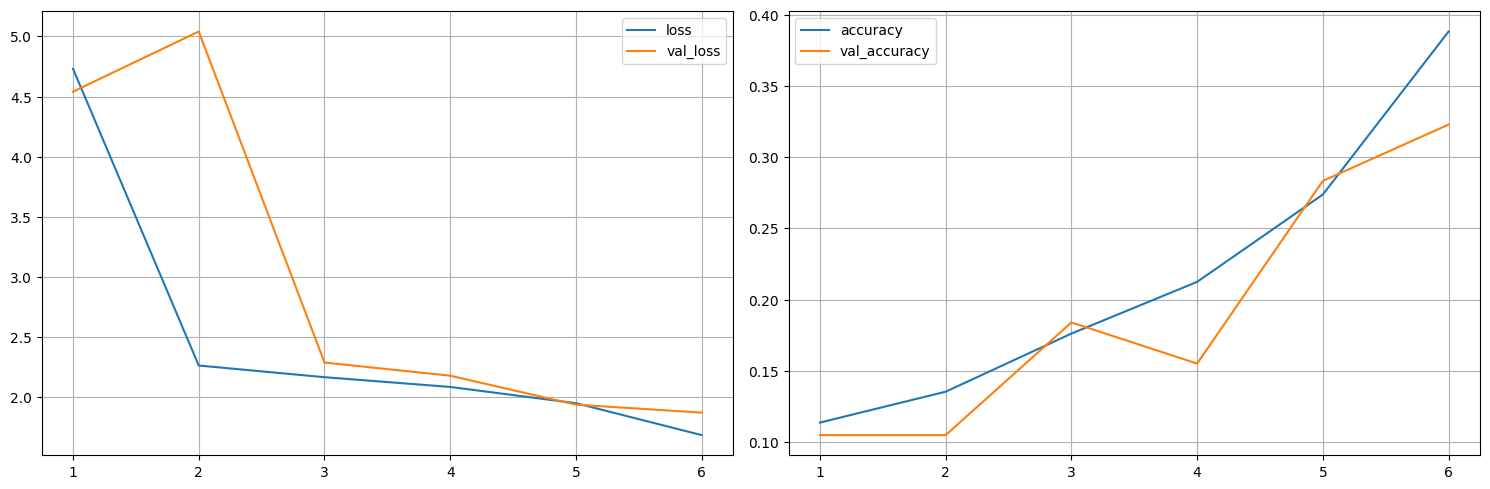

61/61 [==============================] - 20s 322ms/step - loss: 1.6827 - accuracy: 0.3884 - val_loss: 1.8699 - val_accuracy: 0.3230
Epoch 7/20
61/61 [==============================] - ETA: 0s - loss: 1.4529 - accuracy: 0.4832

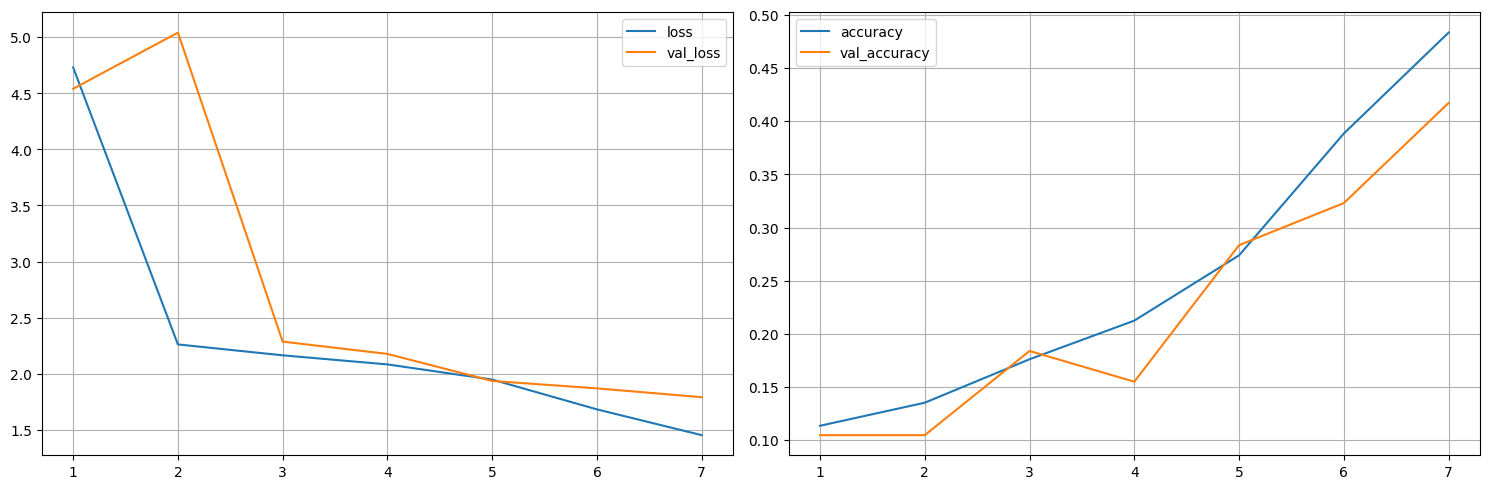

61/61 [==============================] - 20s 321ms/step - loss: 1.4529 - accuracy: 0.4832 - val_loss: 1.7913 - val_accuracy: 0.4171
Epoch 8/20
61/61 [==============================] - ETA: 0s - loss: 1.2353 - accuracy: 0.5779

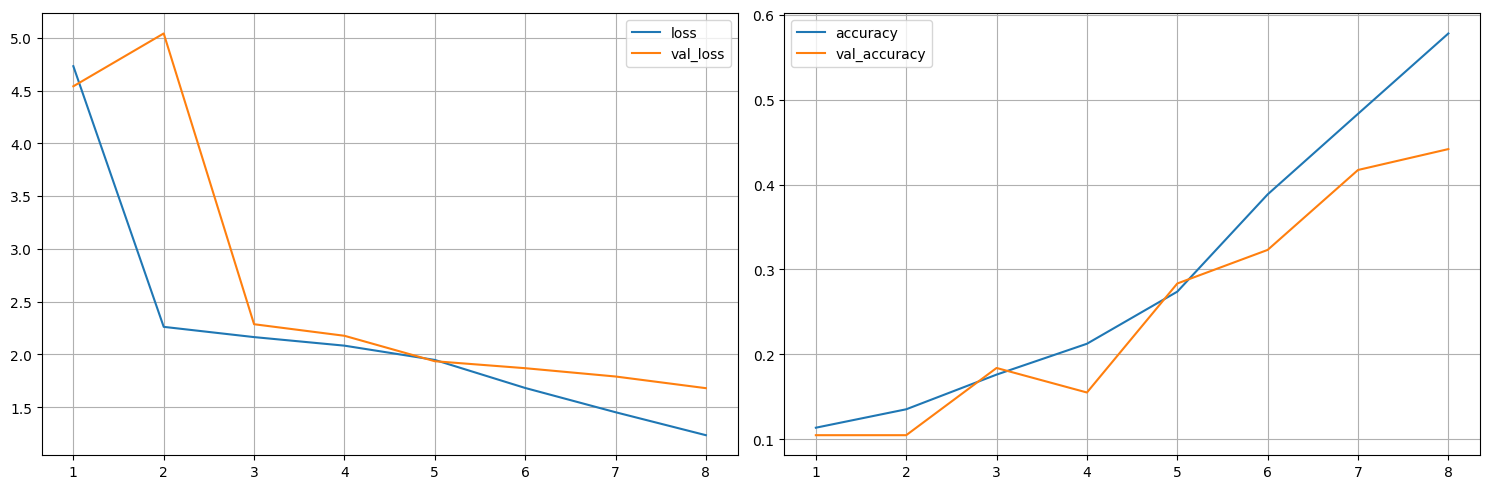

61/61 [==============================] - 20s 326ms/step - loss: 1.2353 - accuracy: 0.5779 - val_loss: 1.6807 - val_accuracy: 0.4417
Epoch 9/20
61/61 [==============================] - ETA: 0s - loss: 1.0430 - accuracy: 0.6489

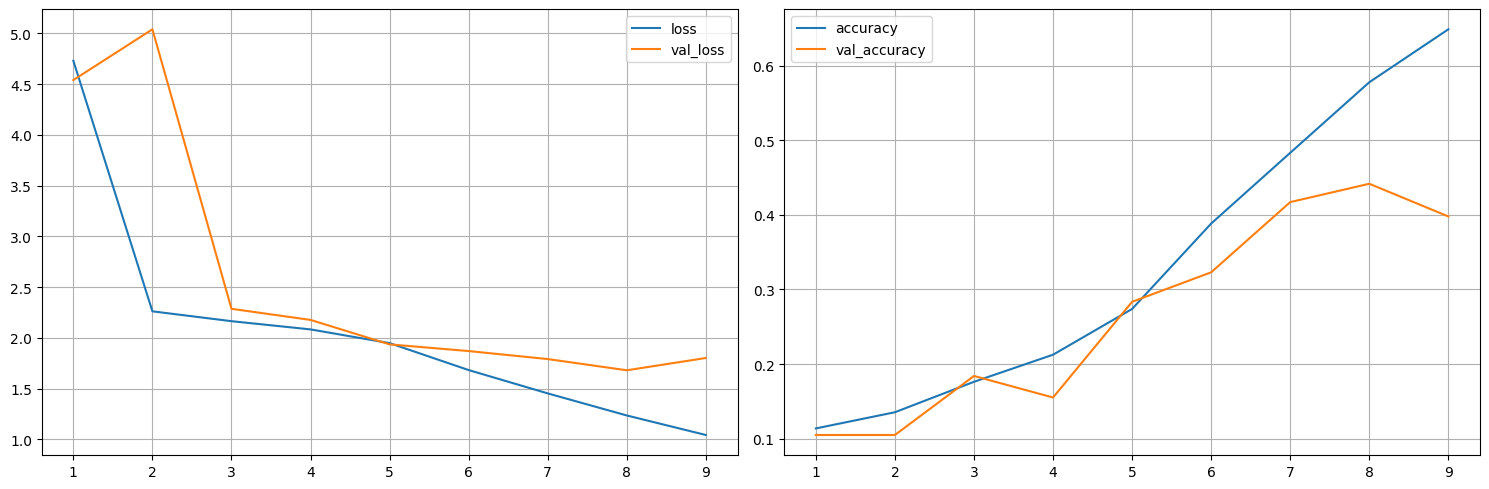

61/61 [==============================] - 20s 325ms/step - loss: 1.0430 - accuracy: 0.6489 - val_loss: 1.8019 - val_accuracy: 0.3979
Epoch 10/20
61/61 [==============================] - ETA: 0s - loss: 0.8949 - accuracy: 0.7100

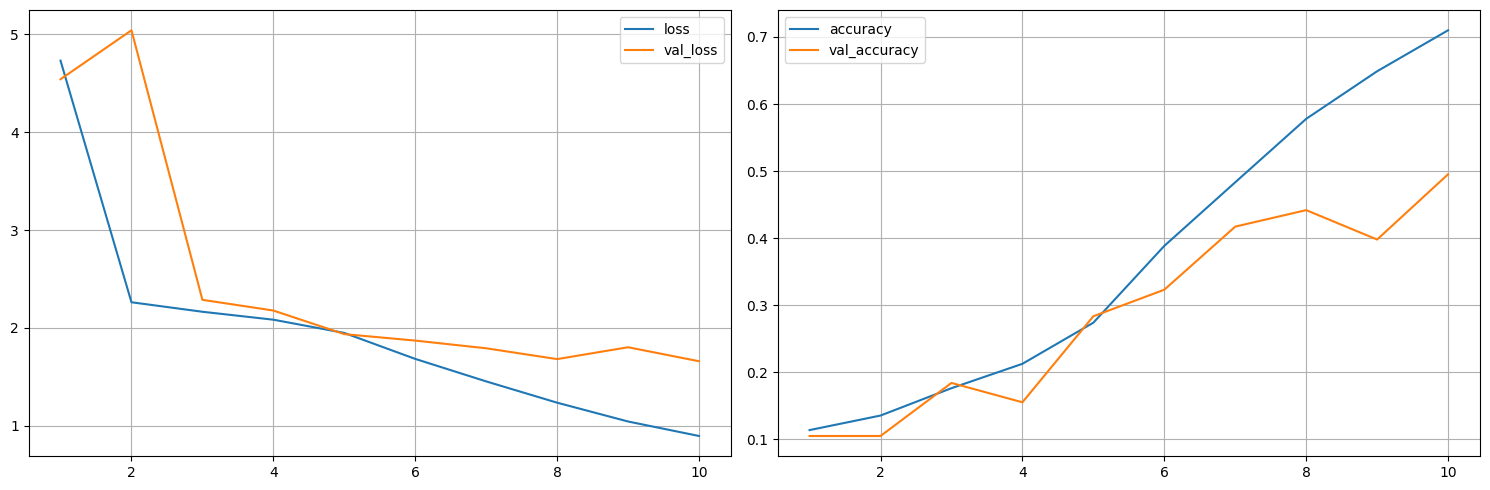

61/61 [==============================] - 20s 323ms/step - loss: 0.8949 - accuracy: 0.7100 - val_loss: 1.6588 - val_accuracy: 0.4952
Epoch 11/20
61/61 [==============================] - ETA: 0s - loss: 0.7674 - accuracy: 0.7585

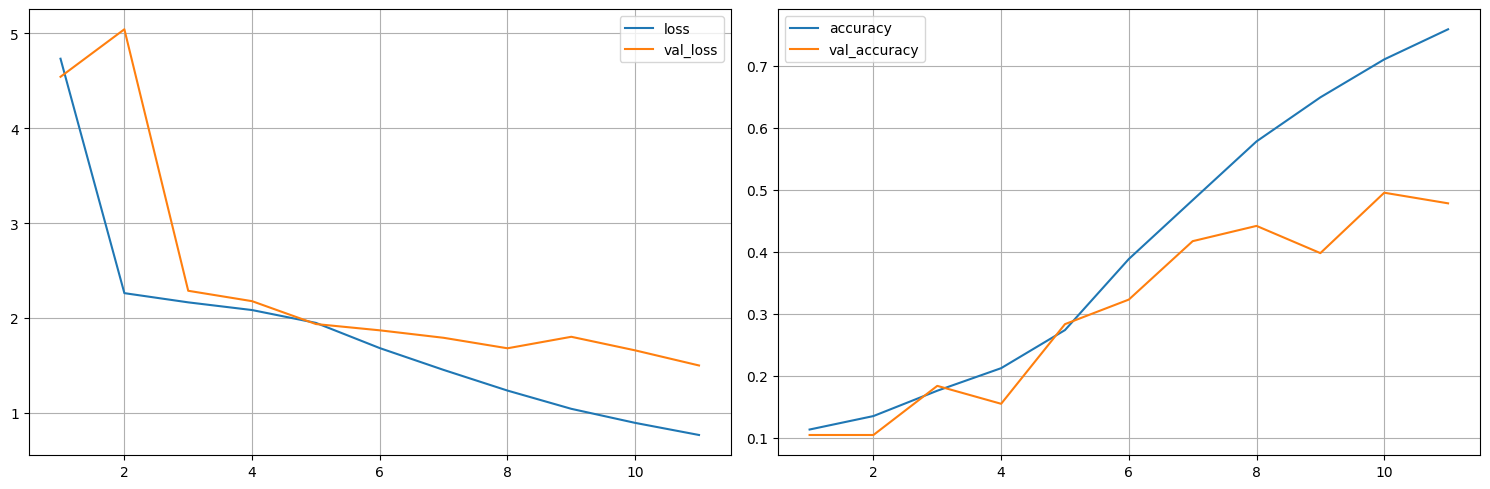

61/61 [==============================] - 20s 323ms/step - loss: 0.7674 - accuracy: 0.7585 - val_loss: 1.4996 - val_accuracy: 0.4781
Epoch 12/20
61/61 [==============================] - ETA: 0s - loss: 0.6696 - accuracy: 0.7910

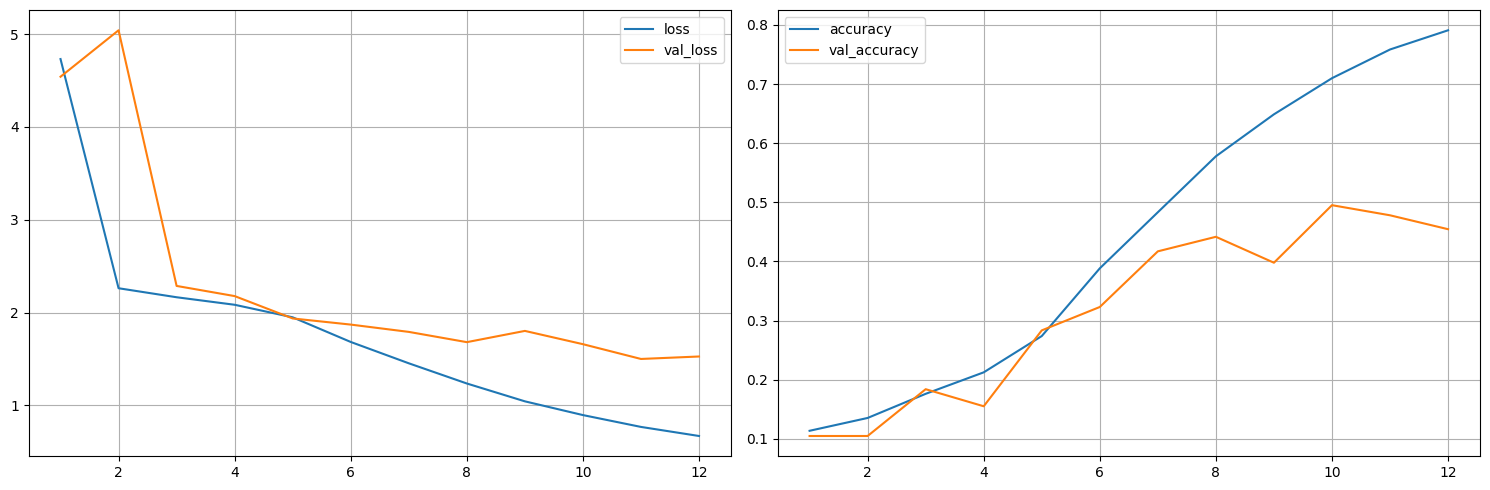

61/61 [==============================] - 20s 325ms/step - loss: 0.6696 - accuracy: 0.7910 - val_loss: 1.5262 - val_accuracy: 0.4545
Epoch 13/20
61/61 [==============================] - ETA: 0s - loss: 0.5521 - accuracy: 0.8390

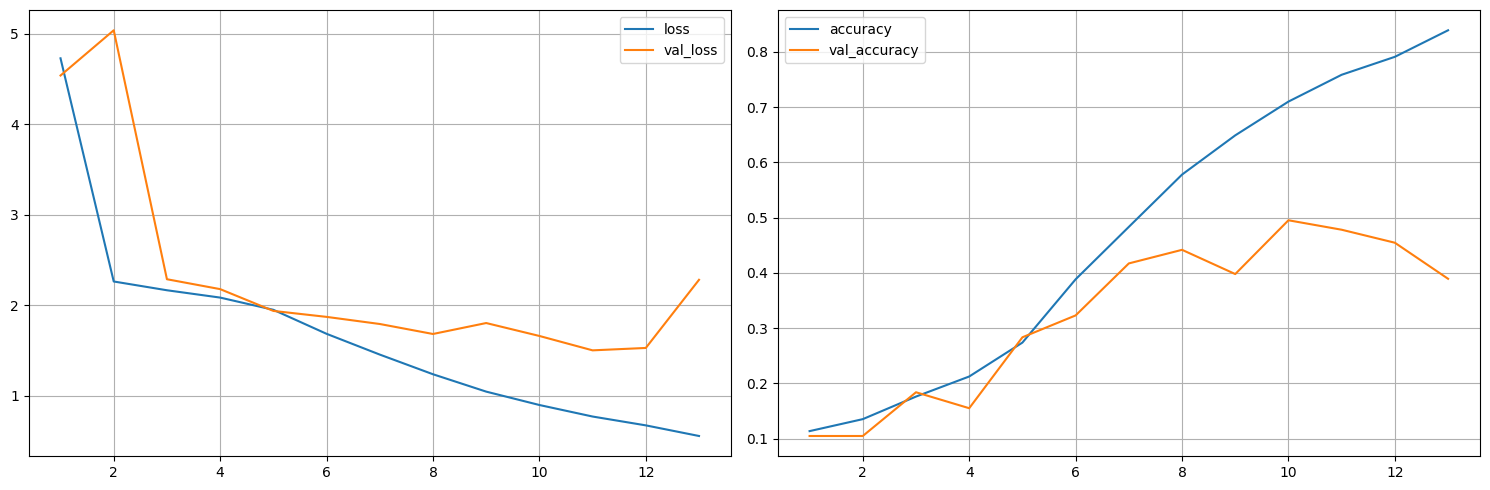

61/61 [==============================] - 20s 324ms/step - loss: 0.5521 - accuracy: 0.8390 - val_loss: 2.2802 - val_accuracy: 0.3893
Epoch 14/20
61/61 [==============================] - ETA: 0s - loss: 0.5036 - accuracy: 0.8515

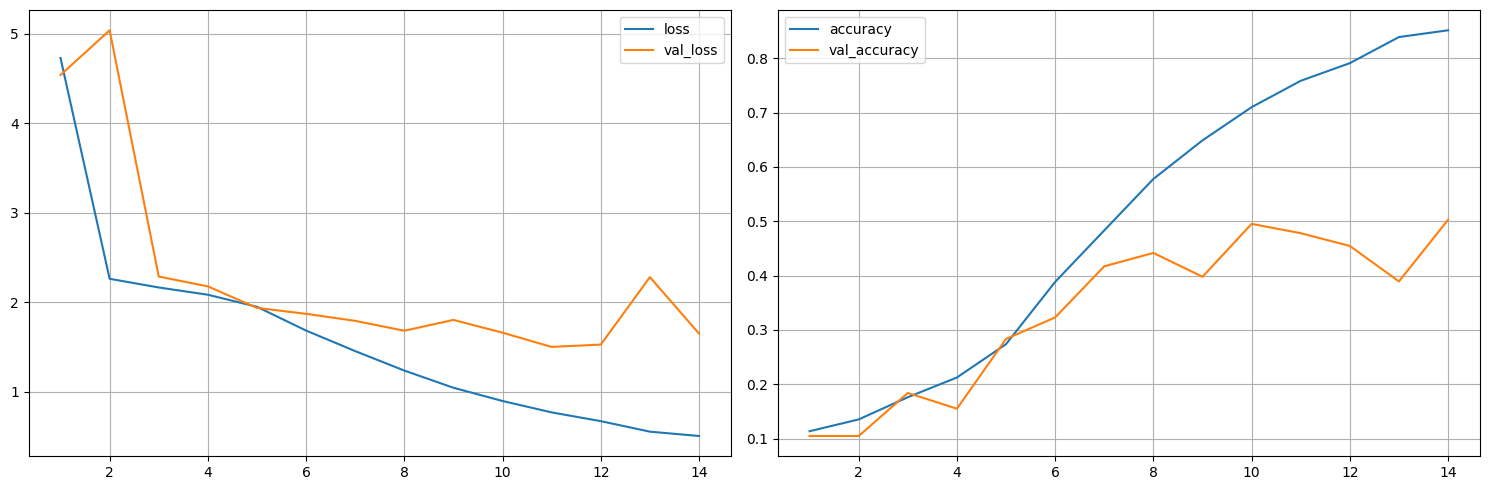

30/30 [==============================] - 1s 27ms/step - loss: 1.6491 - accuracy: 0.5027
Validation accuracy: 0.5026738047599792
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


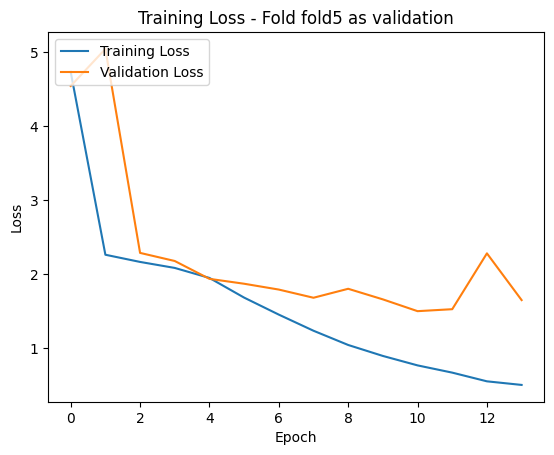

Training using fold6 as validation
Epoch 1/20
 6/62 [=>............................] - ETA: 17s - loss: 9.9605 - accuracy: 0.1107 

62/62 [==============================] - ETA: 0s - loss: 4.4866 - accuracy: 0.1202

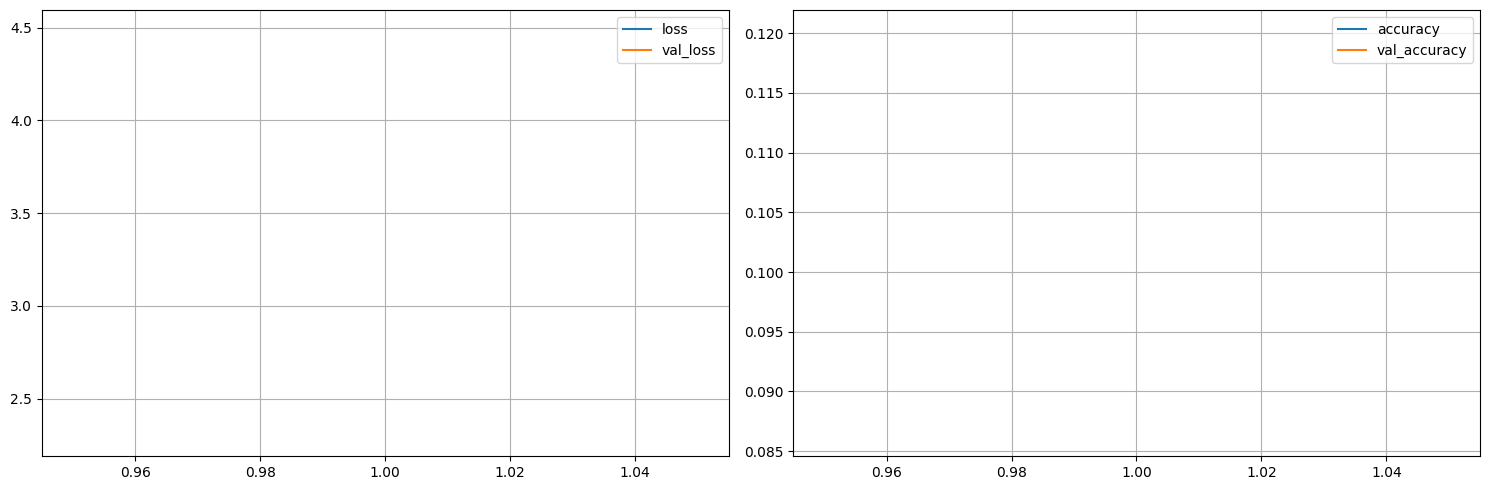

62/62 [==============================] - 25s 383ms/step - loss: 4.4866 - accuracy: 0.1202 - val_loss: 2.2979 - val_accuracy: 0.0863
Epoch 2/20
62/62 [==============================] - ETA: 0s - loss: 2.2879 - accuracy: 0.1109

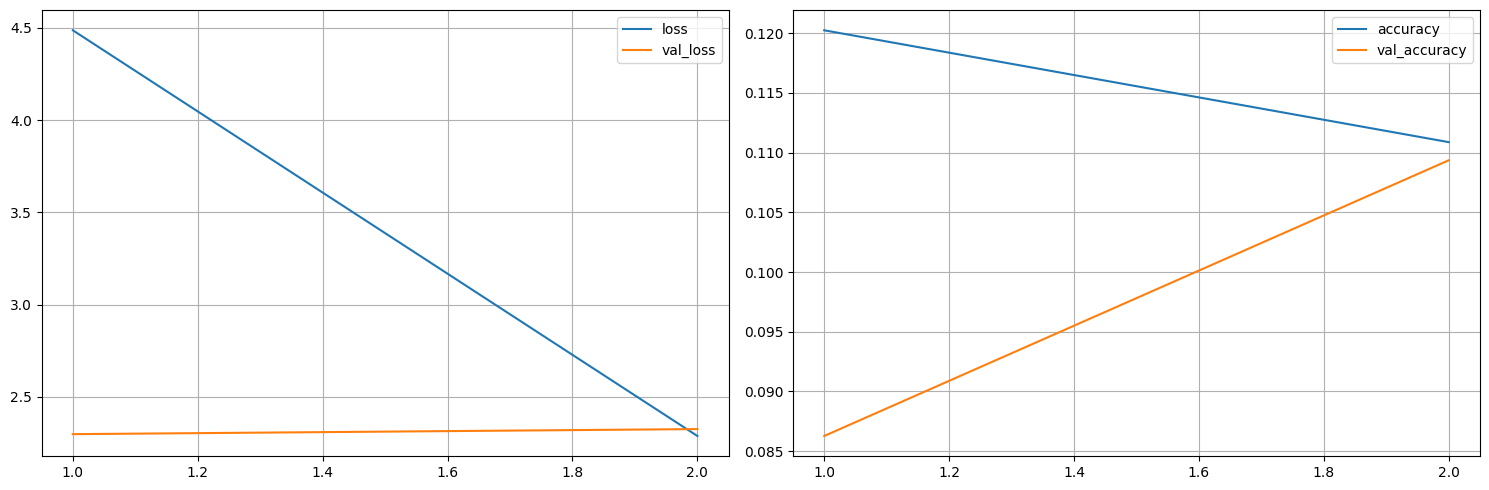

62/62 [==============================] - 20s 319ms/step - loss: 2.2879 - accuracy: 0.1109 - val_loss: 2.3254 - val_accuracy: 0.1094
Epoch 3/20
62/62 [==============================] - ETA: 0s - loss: 2.3004 - accuracy: 0.1166

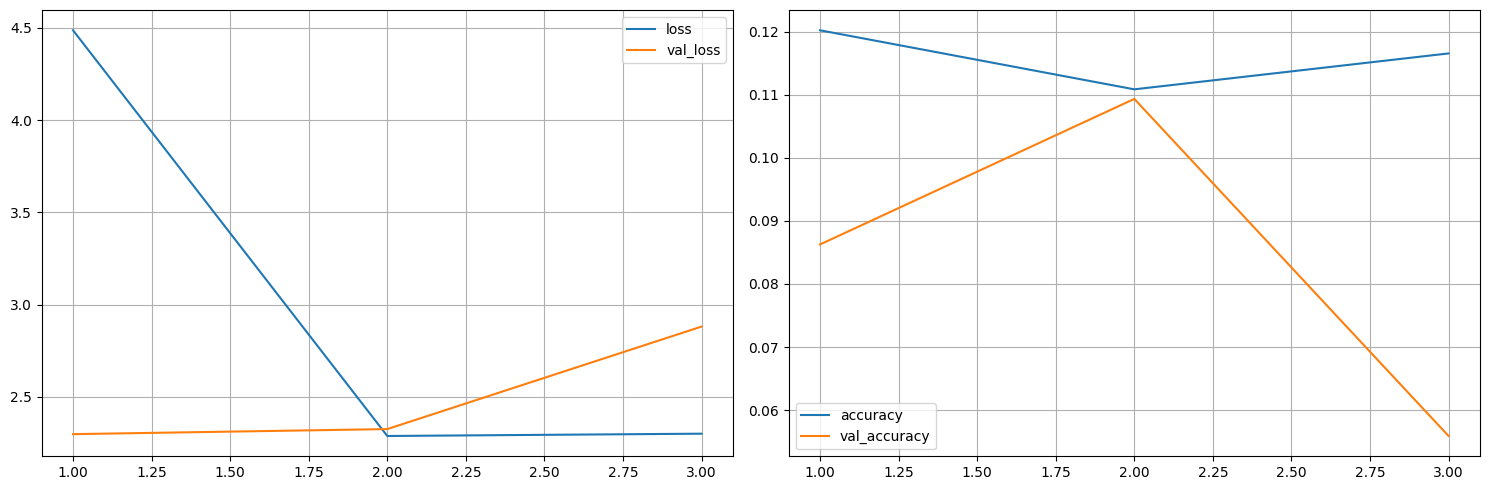

62/62 [==============================] - 20s 317ms/step - loss: 2.3004 - accuracy: 0.1166 - val_loss: 2.8809 - val_accuracy: 0.0559
Epoch 4/20
62/62 [==============================] - ETA: 0s - loss: 2.3026 - accuracy: 0.1215

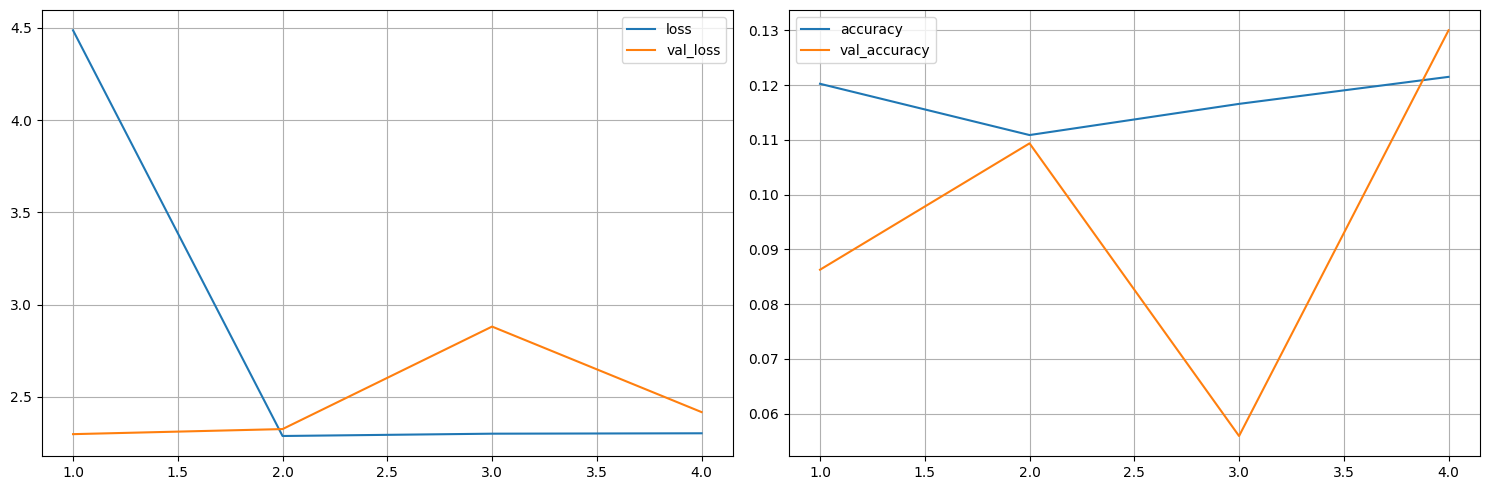

26/26 [==============================] - 1s 34ms/step - loss: 2.4174 - accuracy: 0.1300
Validation accuracy: 0.1300121545791626
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


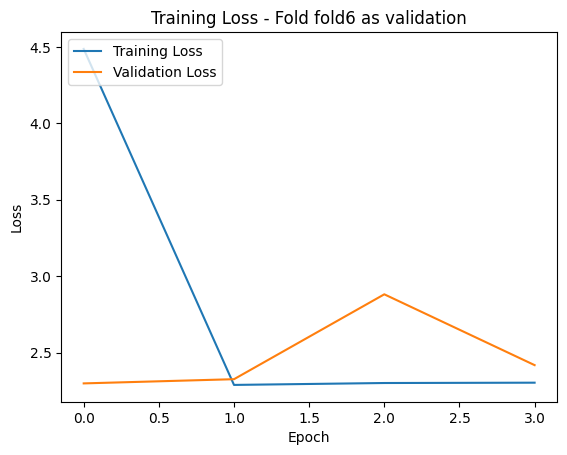

Training using fold7 as validation
Epoch 1/20
 6/62 [=>............................] - ETA: 16s - loss: 10.6626 - accuracy: 0.0846

62/62 [==============================] - ETA: 0s - loss: 4.6551 - accuracy: 0.1134

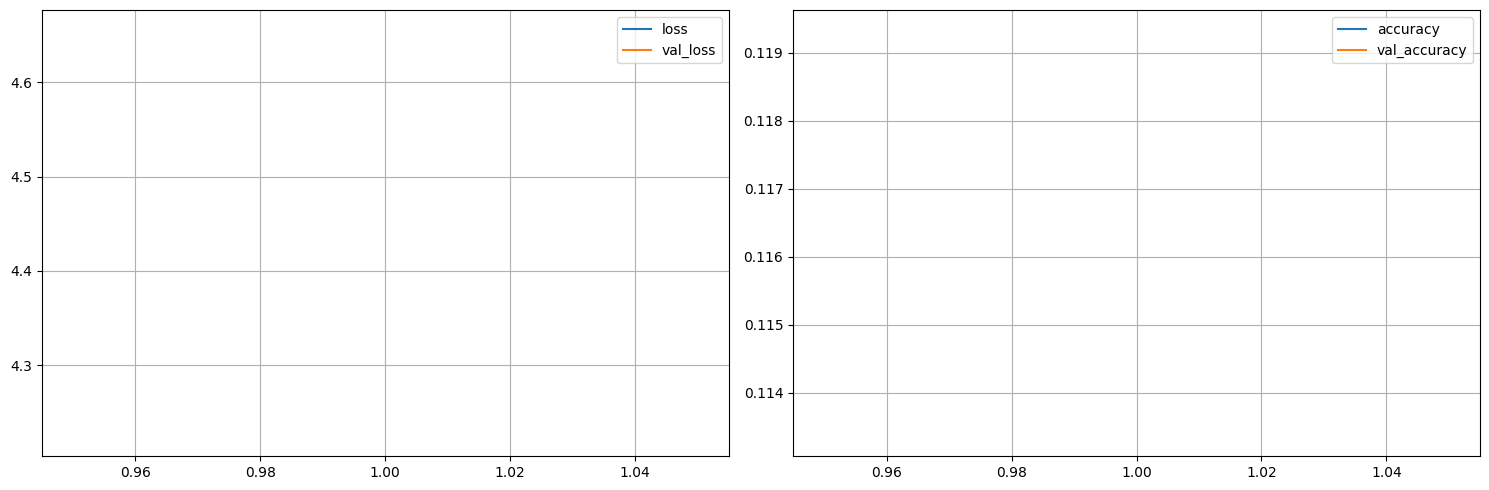

62/62 [==============================] - 24s 369ms/step - loss: 4.6551 - accuracy: 0.1134 - val_loss: 4.2250 - val_accuracy: 0.1193
Epoch 2/20
62/62 [==============================] - ETA: 0s - loss: 2.2741 - accuracy: 0.1267

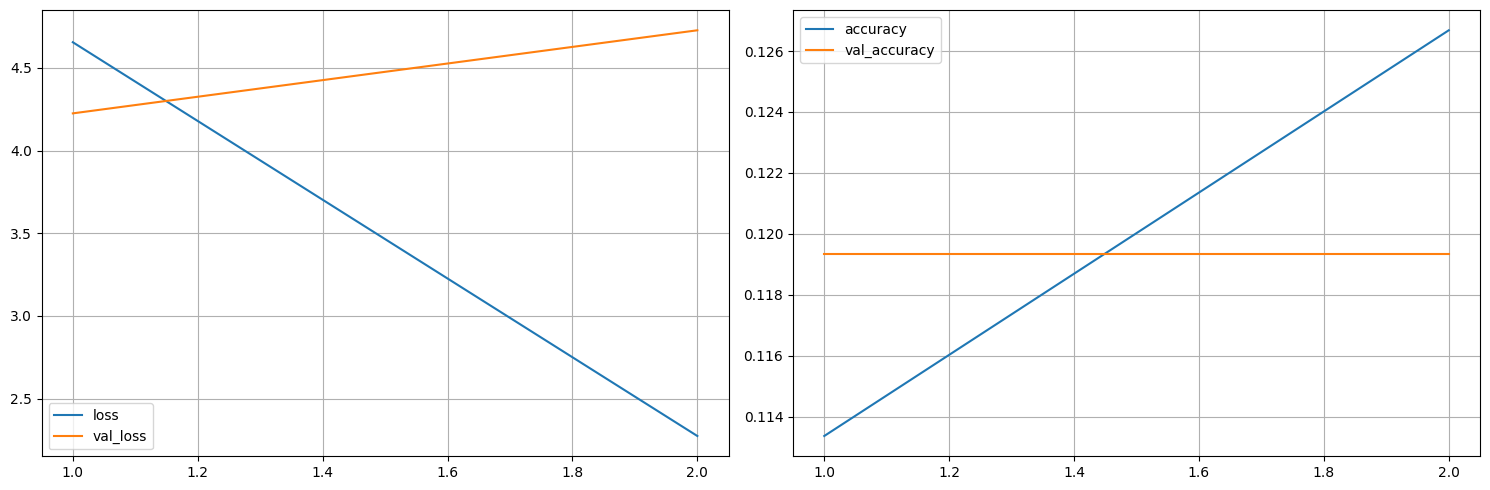

62/62 [==============================] - 20s 323ms/step - loss: 2.2741 - accuracy: 0.1267 - val_loss: 4.7274 - val_accuracy: 0.1193
Epoch 3/20
62/62 [==============================] - ETA: 0s - loss: 2.2131 - accuracy: 0.1692

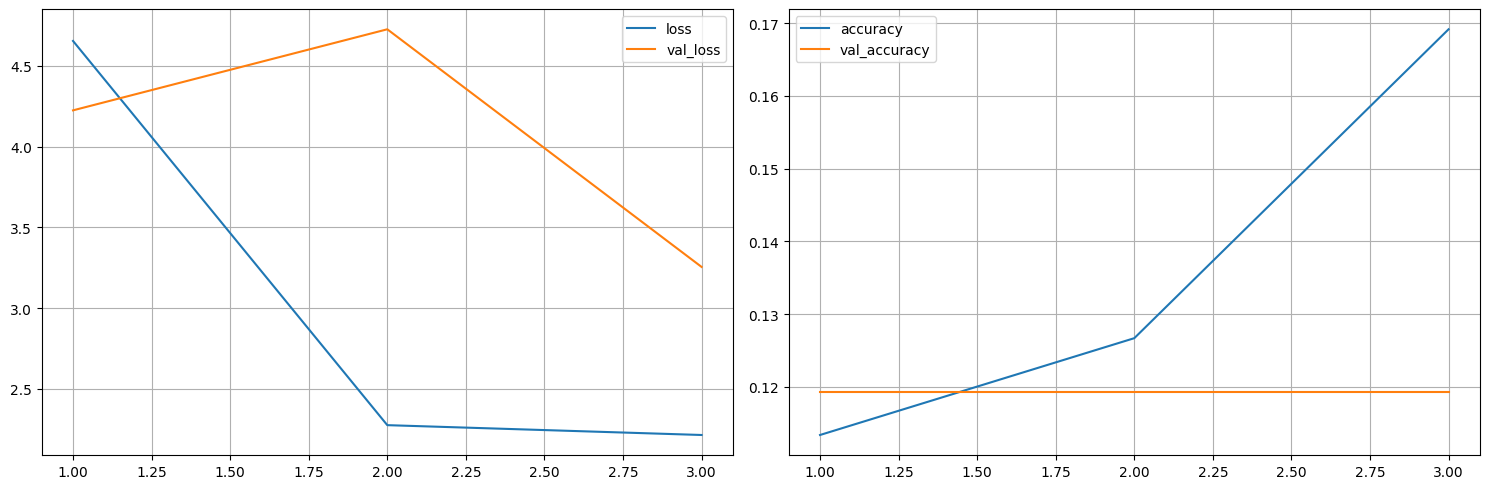

62/62 [==============================] - 20s 325ms/step - loss: 2.2131 - accuracy: 0.1692 - val_loss: 3.2547 - val_accuracy: 0.1193
Epoch 4/20
62/62 [==============================] - ETA: 0s - loss: 2.1450 - accuracy: 0.1962

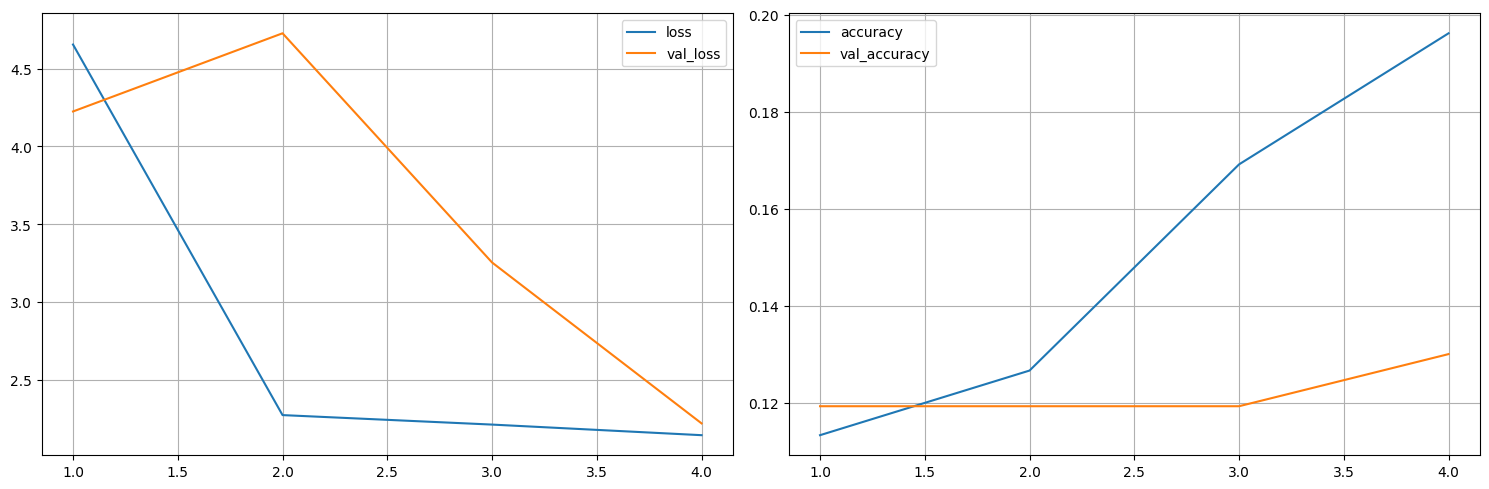

62/62 [==============================] - 20s 323ms/step - loss: 2.1450 - accuracy: 0.1962 - val_loss: 2.2208 - val_accuracy: 0.1301
Epoch 5/20
62/62 [==============================] - ETA: 0s - loss: 2.0209 - accuracy: 0.2520

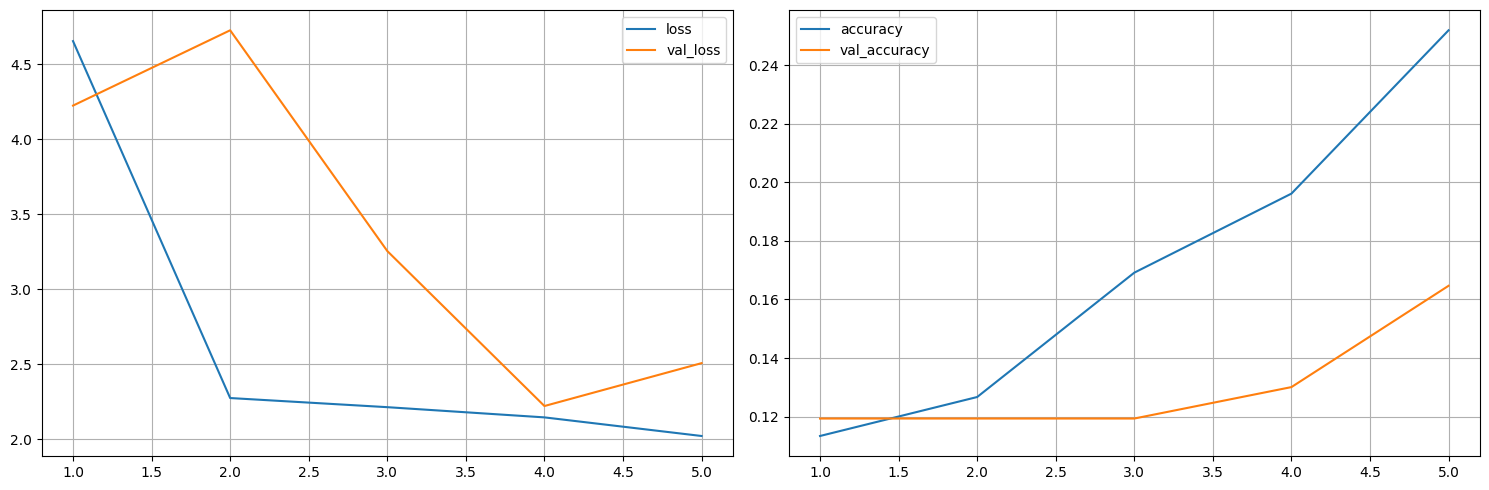

62/62 [==============================] - 20s 326ms/step - loss: 2.0209 - accuracy: 0.2520 - val_loss: 2.5069 - val_accuracy: 0.1647
Epoch 6/20
62/62 [==============================] - ETA: 0s - loss: 1.8759 - accuracy: 0.3145

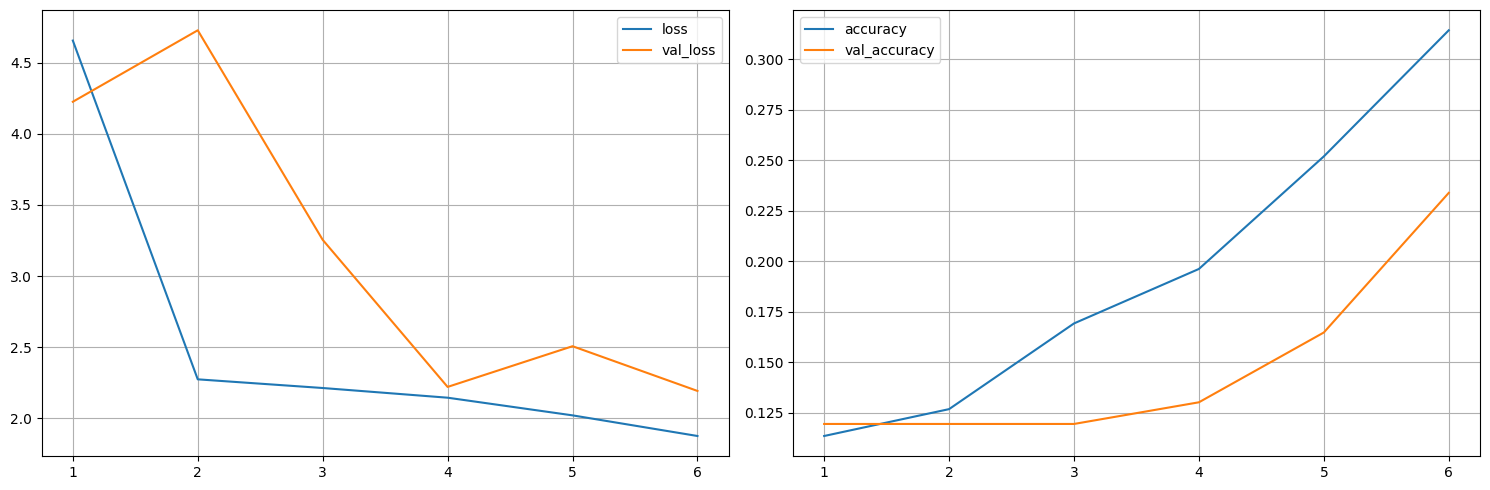

62/62 [==============================] - 20s 328ms/step - loss: 1.8759 - accuracy: 0.3145 - val_loss: 2.1926 - val_accuracy: 0.2339
Epoch 7/20
62/62 [==============================] - ETA: 0s - loss: 1.6917 - accuracy: 0.3851

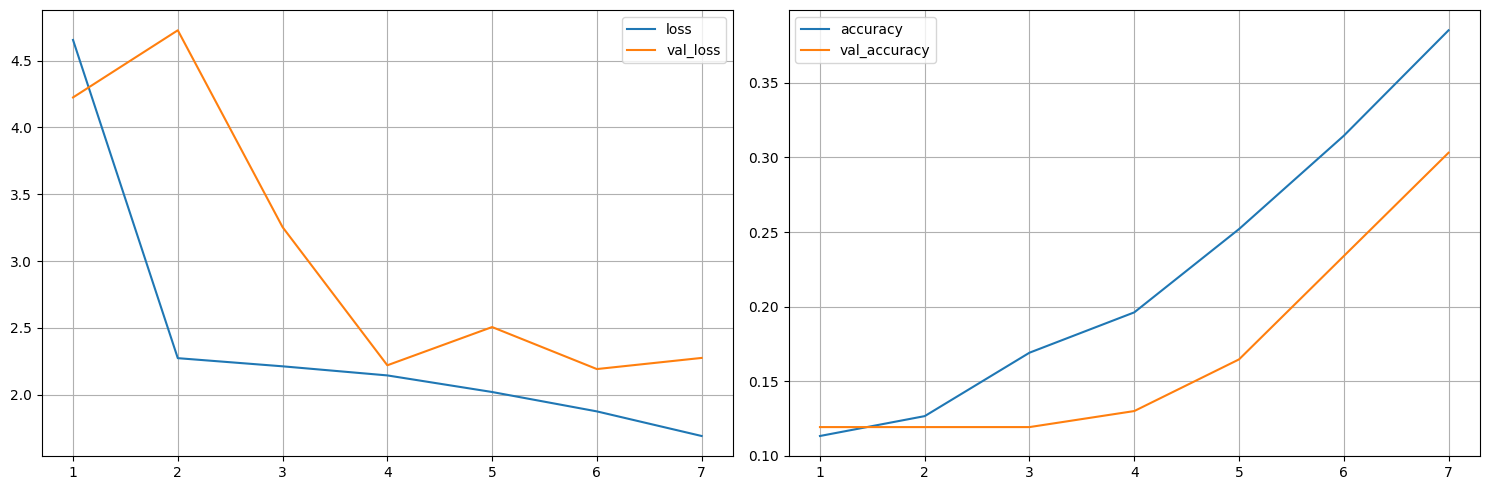

62/62 [==============================] - 20s 329ms/step - loss: 1.6917 - accuracy: 0.3851 - val_loss: 2.2759 - val_accuracy: 0.3031
Epoch 8/20
62/62 [==============================] - ETA: 0s - loss: 1.4265 - accuracy: 0.4992

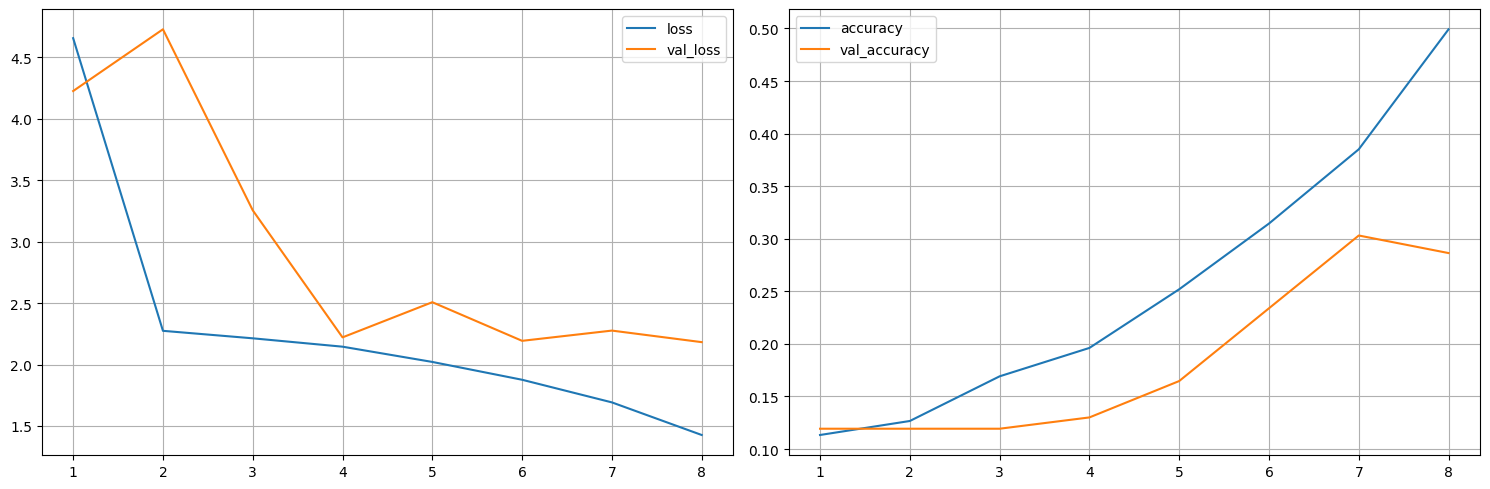

62/62 [==============================] - 20s 329ms/step - loss: 1.4265 - accuracy: 0.4992 - val_loss: 2.1819 - val_accuracy: 0.2864
Epoch 9/20
62/62 [==============================] - ETA: 0s - loss: 1.1765 - accuracy: 0.5973

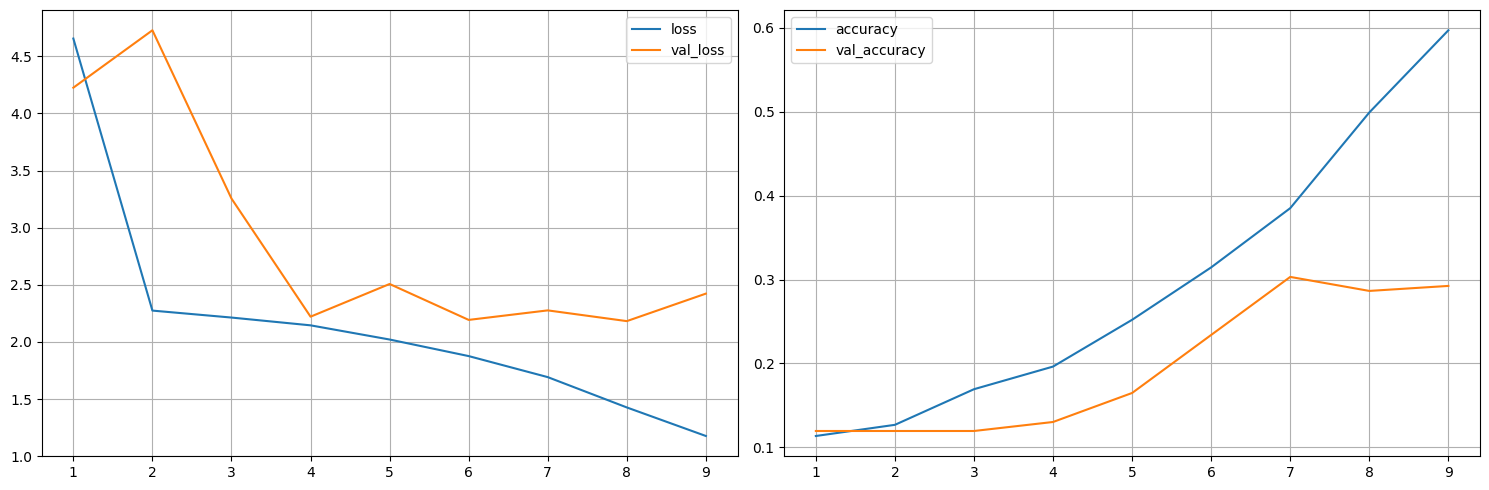

62/62 [==============================] - 20s 323ms/step - loss: 1.1765 - accuracy: 0.5973 - val_loss: 2.4226 - val_accuracy: 0.2924
Epoch 10/20
62/62 [==============================] - ETA: 0s - loss: 1.0099 - accuracy: 0.6599

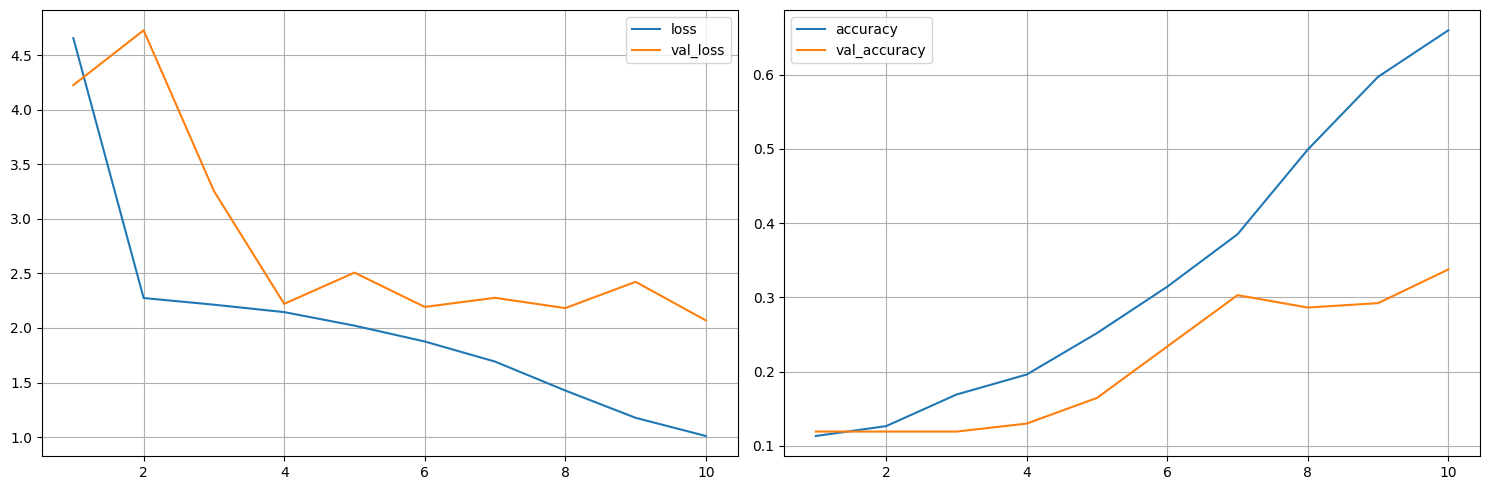

62/62 [==============================] - 20s 322ms/step - loss: 1.0099 - accuracy: 0.6599 - val_loss: 2.0690 - val_accuracy: 0.3377
Epoch 11/20
62/62 [==============================] - ETA: 0s - loss: 0.8251 - accuracy: 0.7351

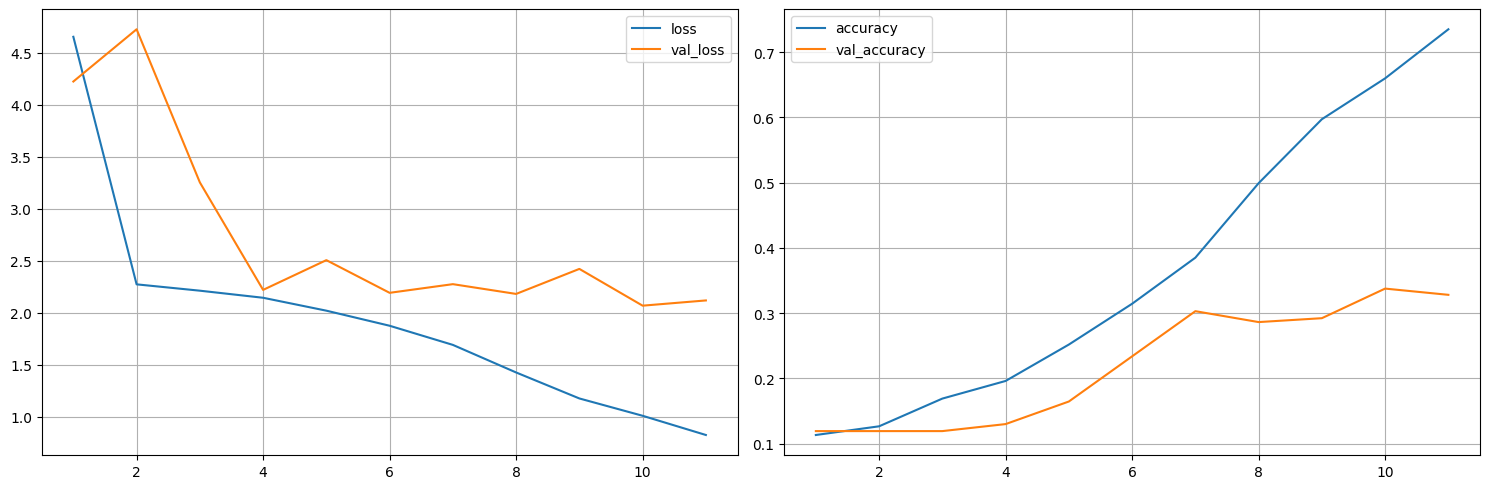

62/62 [==============================] - 20s 326ms/step - loss: 0.8251 - accuracy: 0.7351 - val_loss: 2.1193 - val_accuracy: 0.3282
Epoch 12/20
62/62 [==============================] - ETA: 0s - loss: 0.6965 - accuracy: 0.7805

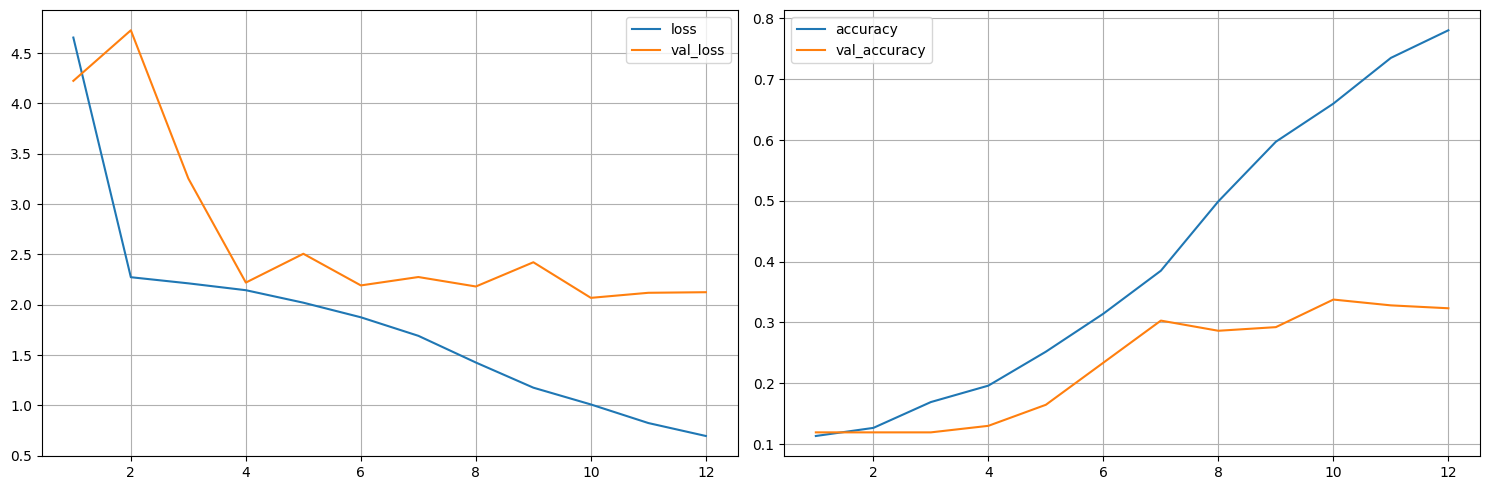

62/62 [==============================] - 20s 326ms/step - loss: 0.6965 - accuracy: 0.7805 - val_loss: 2.1250 - val_accuracy: 0.3234
Epoch 13/20
62/62 [==============================] - ETA: 0s - loss: 0.5643 - accuracy: 0.8302

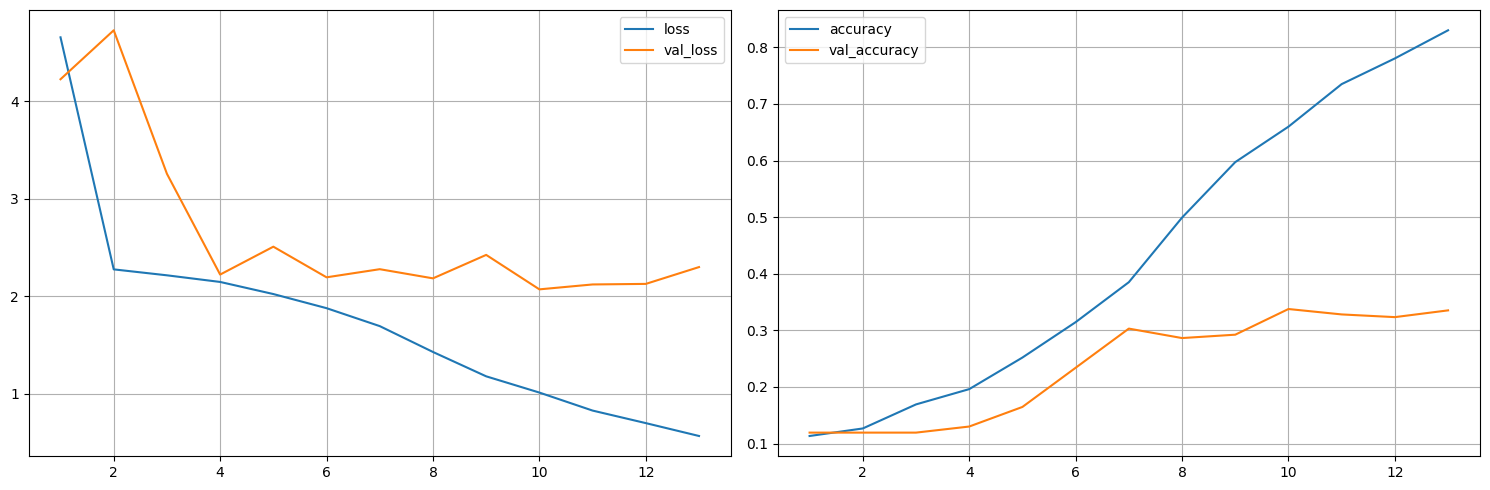

27/27 [==============================] - 1s 27ms/step - loss: 2.2976 - accuracy: 0.3353
Validation accuracy: 0.33532220125198364
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


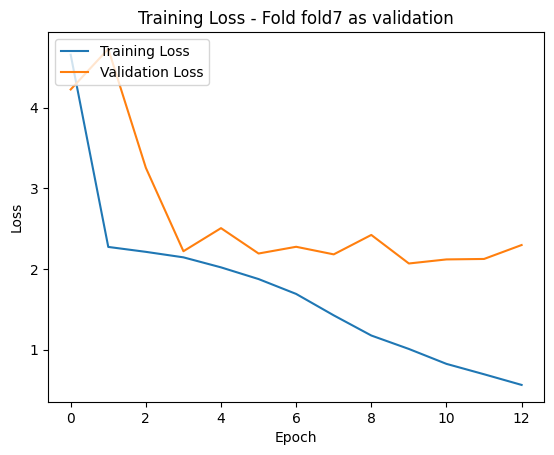

Training using fold8 as validation
Epoch 1/20
 6/62 [=>............................] - ETA: 16s - loss: 10.6909 - accuracy: 0.0885

62/62 [==============================] - ETA: 0s - loss: 4.4967 - accuracy: 0.1086

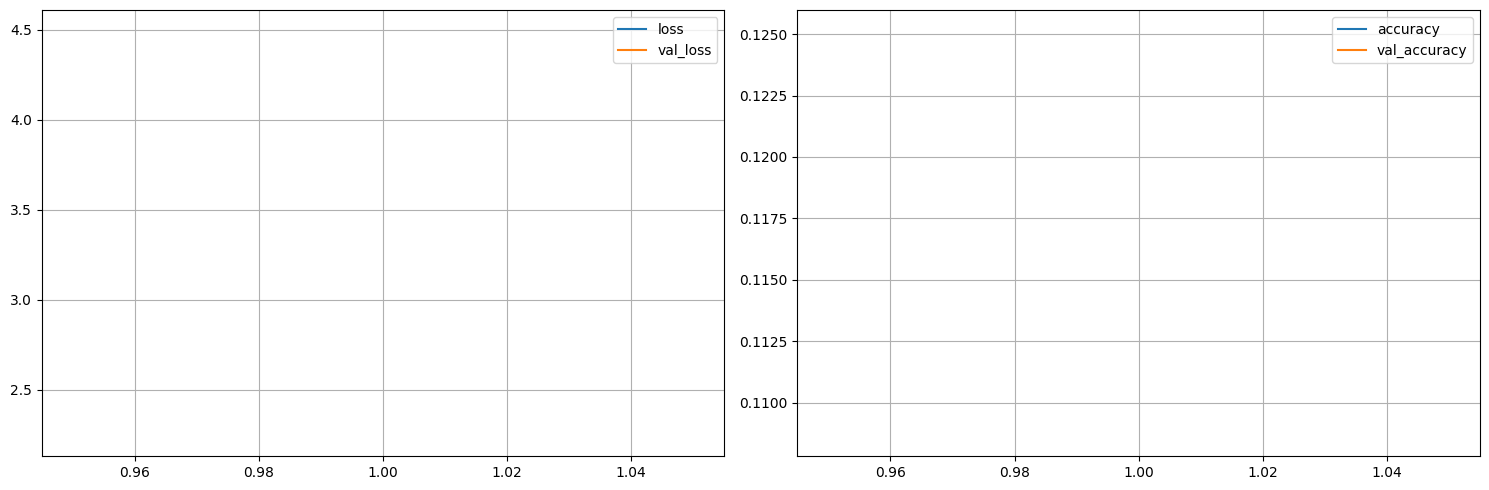

62/62 [==============================] - 25s 380ms/step - loss: 4.4967 - accuracy: 0.1086 - val_loss: 2.2439 - val_accuracy: 0.1252
Epoch 2/20
62/62 [==============================] - ETA: 0s - loss: 2.2990 - accuracy: 0.1199

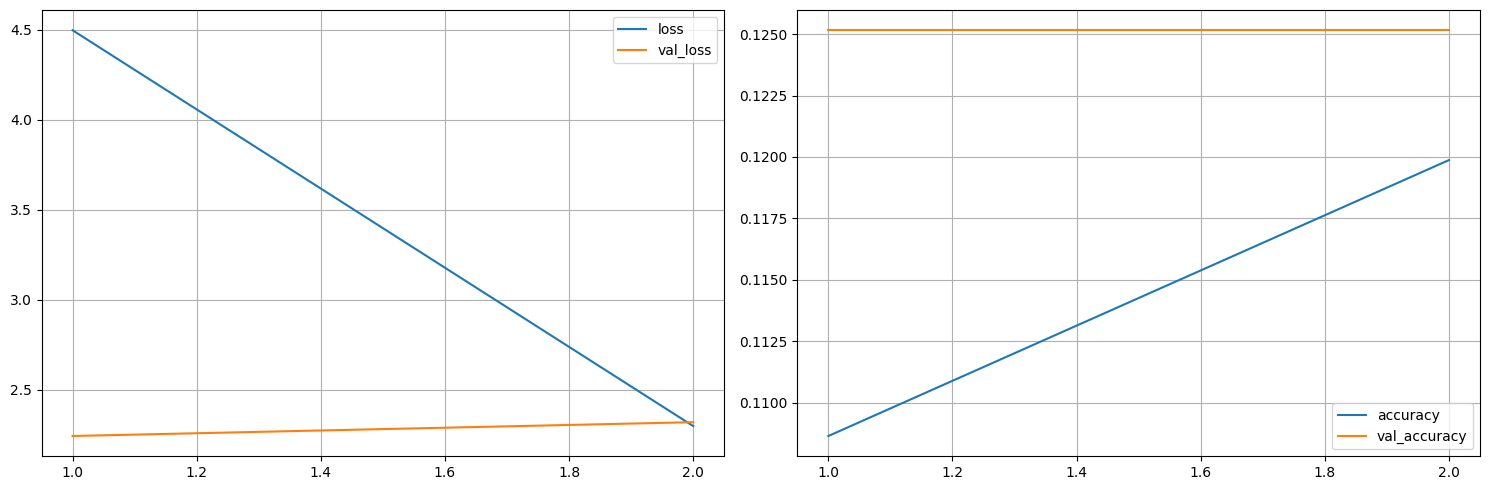

62/62 [==============================] - 20s 318ms/step - loss: 2.2990 - accuracy: 0.1199 - val_loss: 2.3206 - val_accuracy: 0.1252
Epoch 3/20
62/62 [==============================] - ETA: 0s - loss: 2.2875 - accuracy: 0.1098

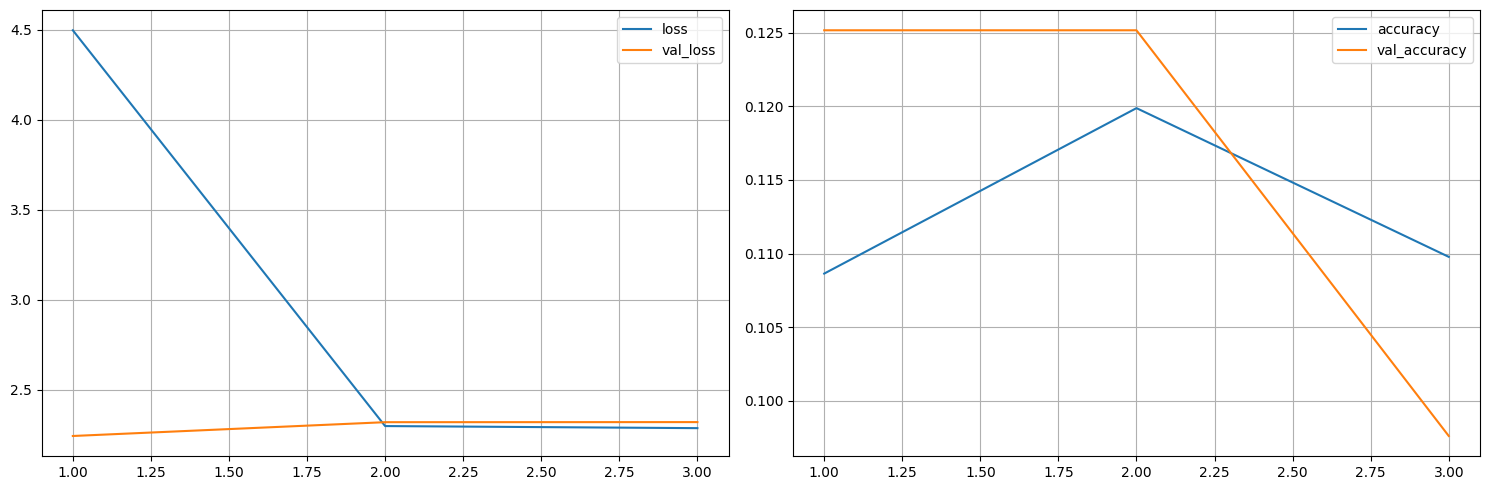

62/62 [==============================] - 20s 318ms/step - loss: 2.2875 - accuracy: 0.1098 - val_loss: 2.3210 - val_accuracy: 0.0976
Epoch 4/20
62/62 [==============================] - ETA: 0s - loss: 2.3063 - accuracy: 0.1128

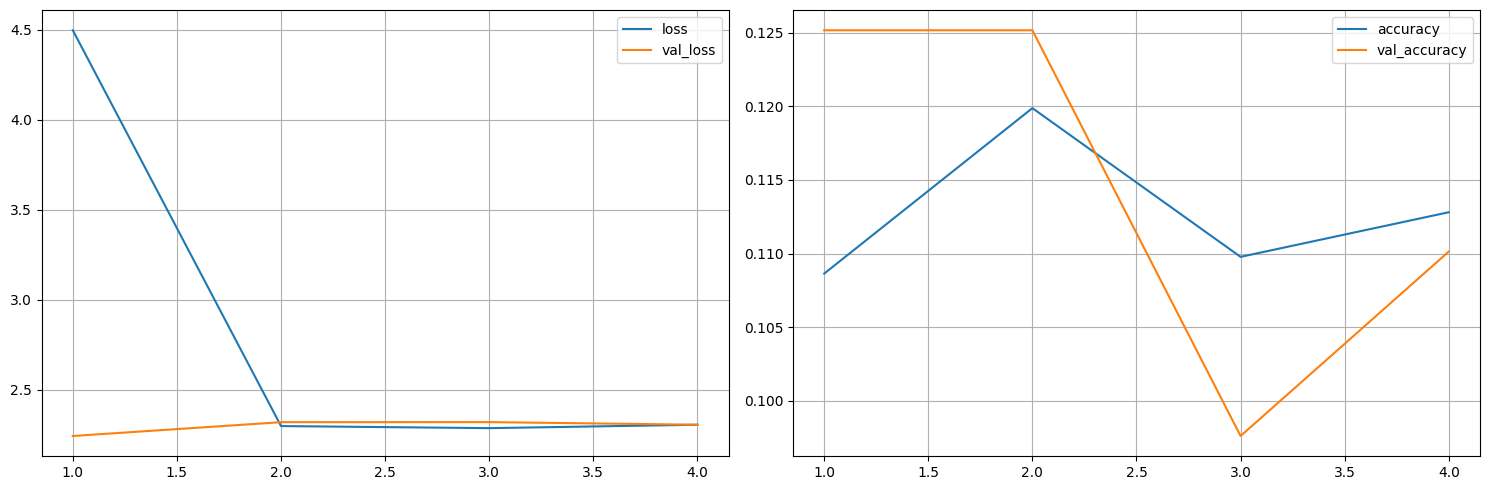

25/25 [==============================] - 1s 22ms/step - loss: 2.3064 - accuracy: 0.1101
Validation accuracy: 0.11013767123222351
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


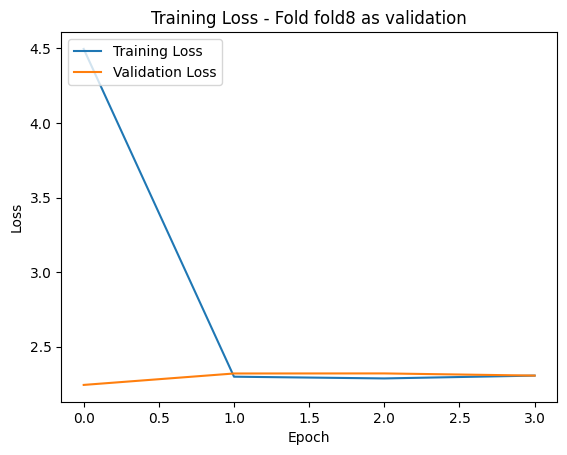

Training using fold9 as validation
Epoch 1/20
 6/62 [=>............................] - ETA: 16s - loss: 11.8461 - accuracy: 0.0898

62/62 [==============================] - ETA: 0s - loss: 5.0643 - accuracy: 0.1082

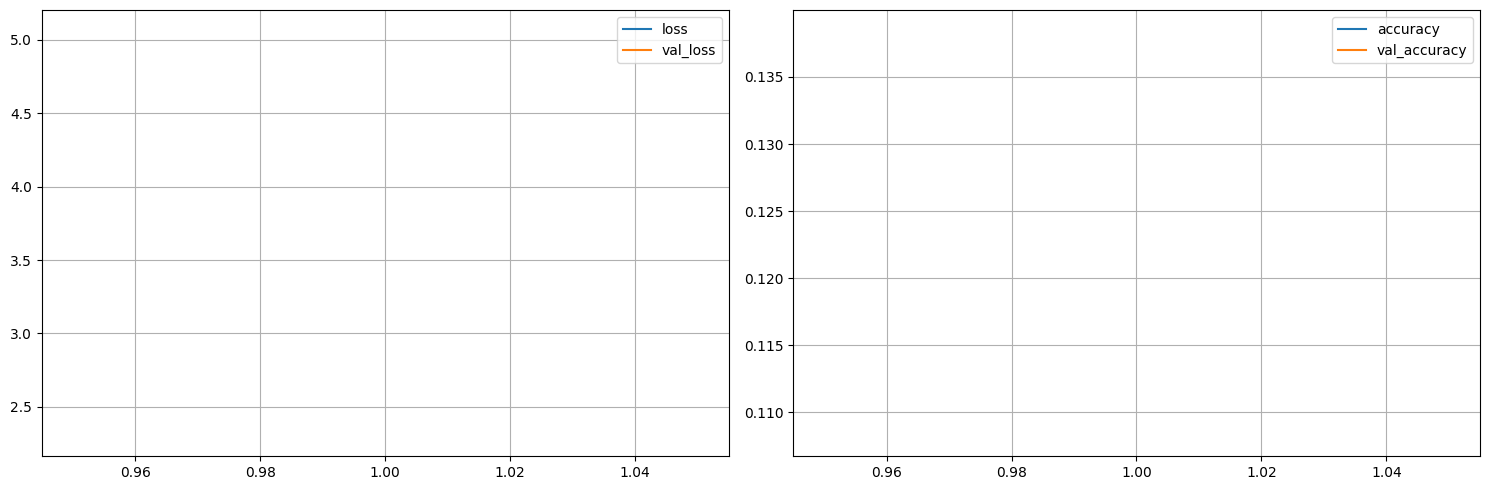

62/62 [==============================] - 24s 364ms/step - loss: 5.0643 - accuracy: 0.1082 - val_loss: 2.3020 - val_accuracy: 0.1385
Epoch 2/20
62/62 [==============================] - ETA: 0s - loss: 2.2912 - accuracy: 0.1138

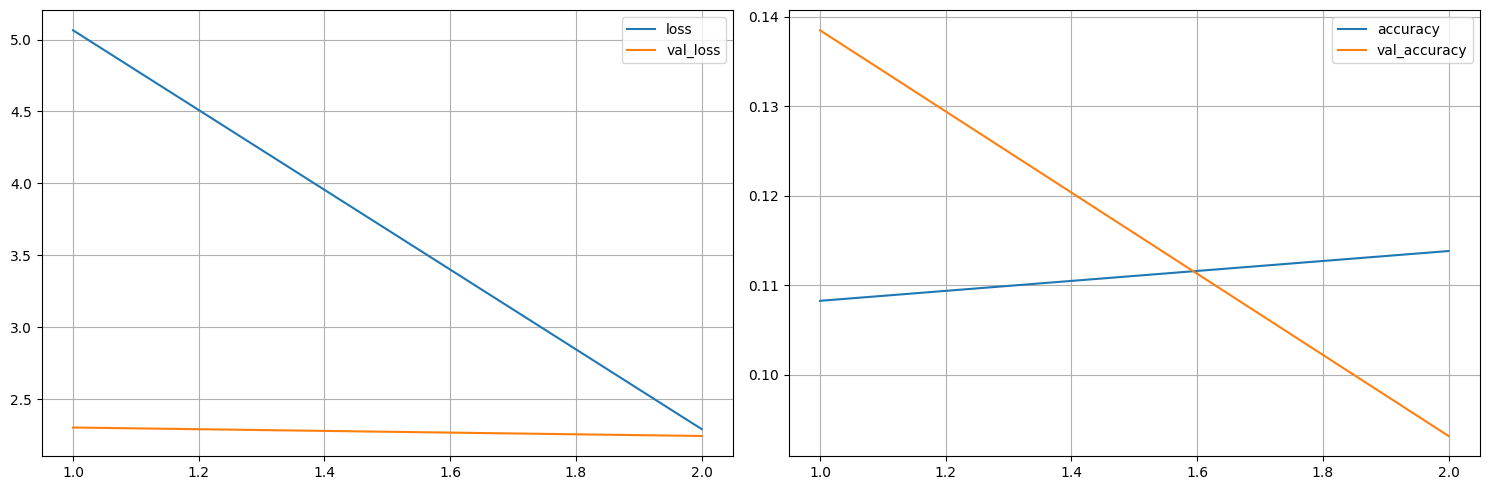

62/62 [==============================] - 20s 326ms/step - loss: 2.2912 - accuracy: 0.1138 - val_loss: 2.2430 - val_accuracy: 0.0931
Epoch 3/20
62/62 [==============================] - ETA: 0s - loss: 2.2866 - accuracy: 0.1128

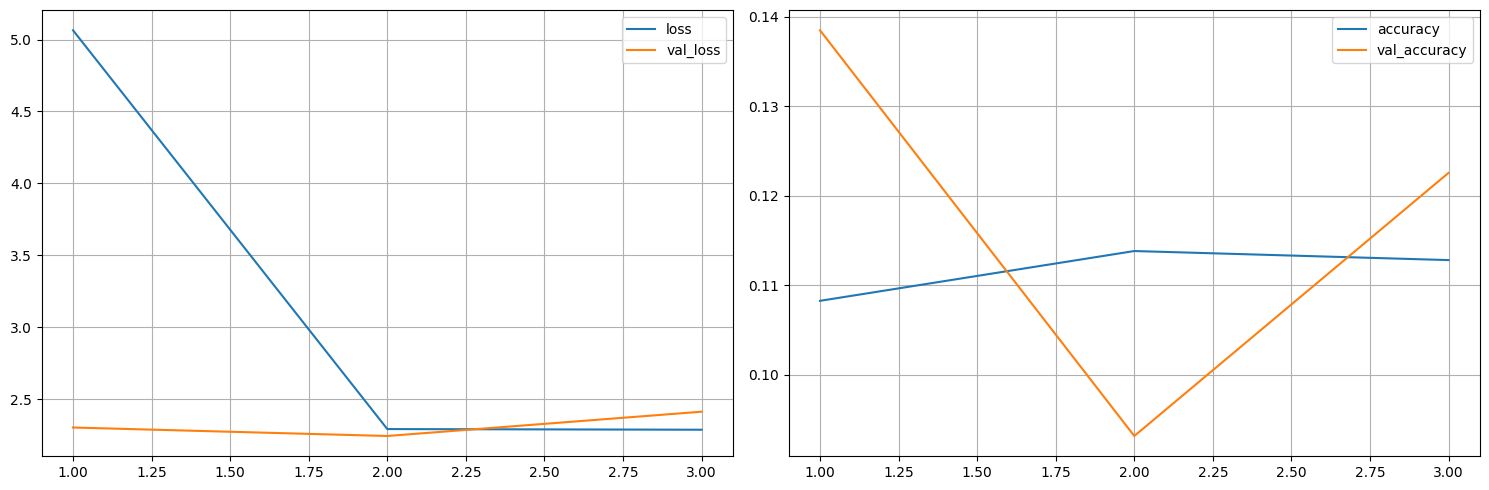

62/62 [==============================] - 19s 314ms/step - loss: 2.2866 - accuracy: 0.1128 - val_loss: 2.4119 - val_accuracy: 0.1225
Epoch 4/20
62/62 [==============================] - ETA: 0s - loss: 2.2905 - accuracy: 0.1124

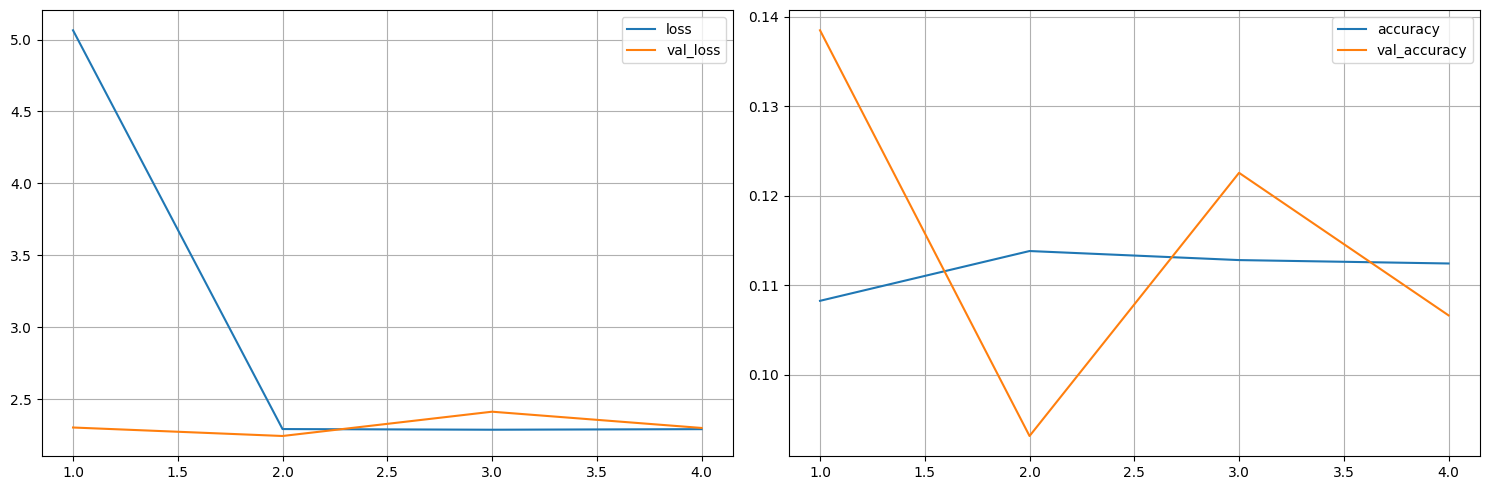

62/62 [==============================] - 20s 317ms/step - loss: 2.2905 - accuracy: 0.1124 - val_loss: 2.2989 - val_accuracy: 0.1066
Epoch 5/20
62/62 [==============================] - ETA: 0s - loss: 2.2583 - accuracy: 0.1381

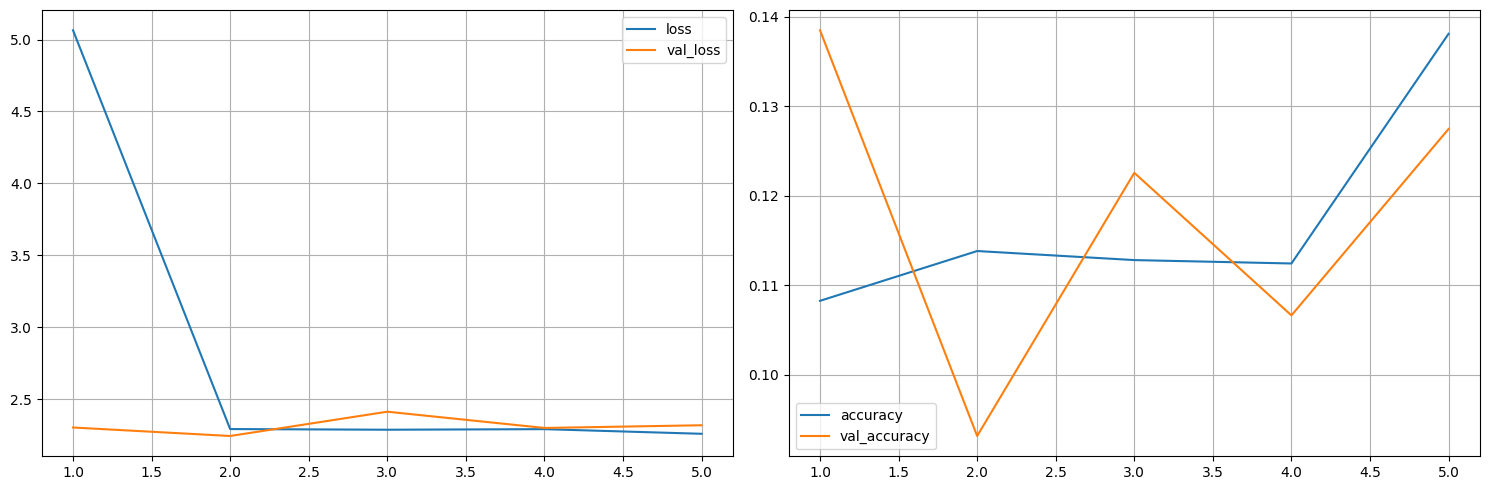

26/26 [==============================] - 1s 28ms/step - loss: 2.3176 - accuracy: 0.1275
Validation accuracy: 0.12745098769664764
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


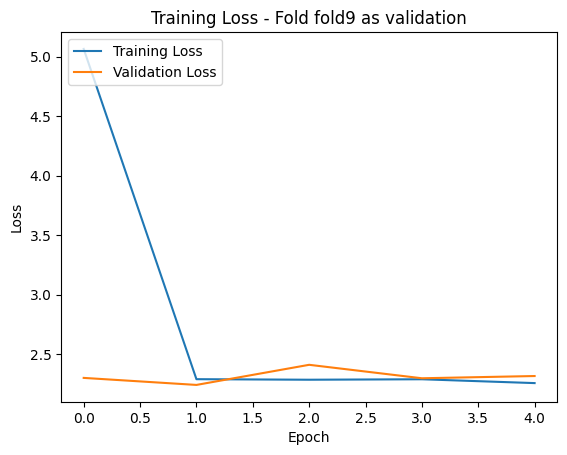

Training using fold10 as validation
Epoch 1/20
 6/62 [=>............................] - ETA: 17s - loss: 10.7742 - accuracy: 0.1042

62/62 [==============================] - ETA: 0s - loss: 4.4464 - accuracy: 0.1194

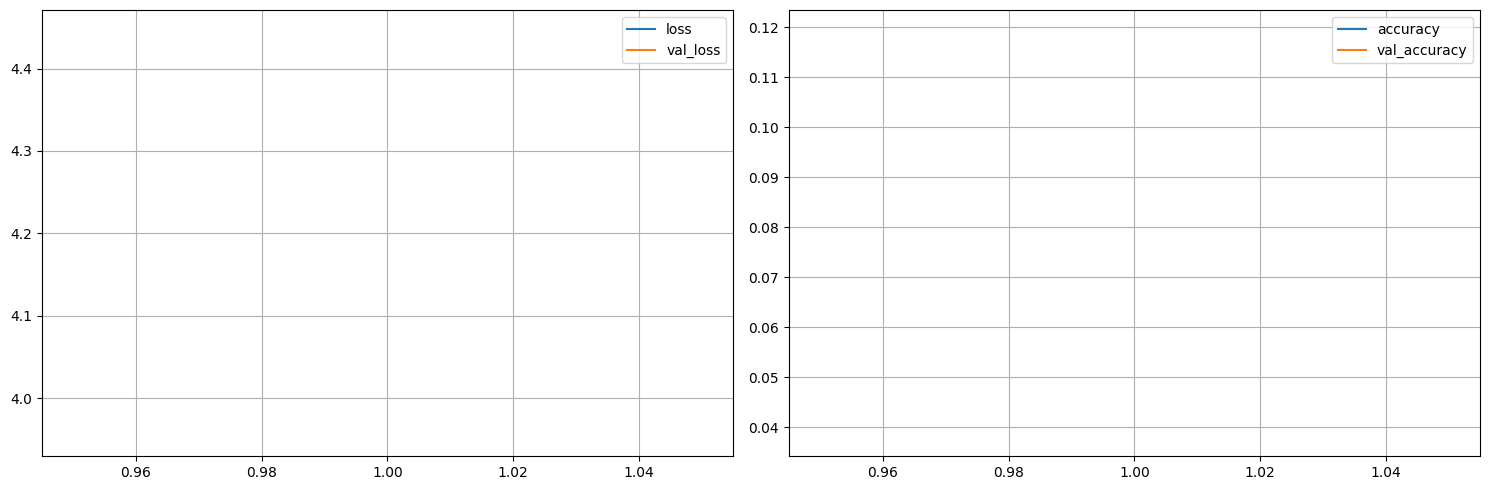

62/62 [==============================] - 24s 362ms/step - loss: 4.4464 - accuracy: 0.1194 - val_loss: 3.9541 - val_accuracy: 0.0382
Epoch 2/20
62/62 [==============================] - ETA: 0s - loss: 2.2295 - accuracy: 0.1500

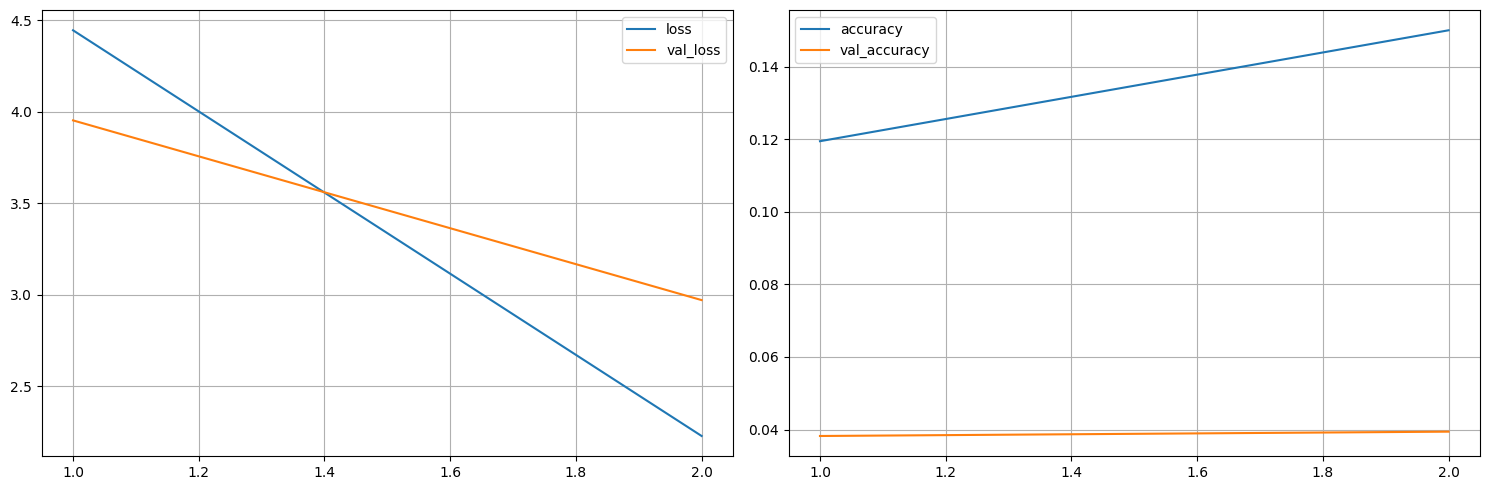

62/62 [==============================] - 20s 328ms/step - loss: 2.2295 - accuracy: 0.1500 - val_loss: 2.9720 - val_accuracy: 0.0394
Epoch 3/20
62/62 [==============================] - ETA: 0s - loss: 2.1692 - accuracy: 0.1812

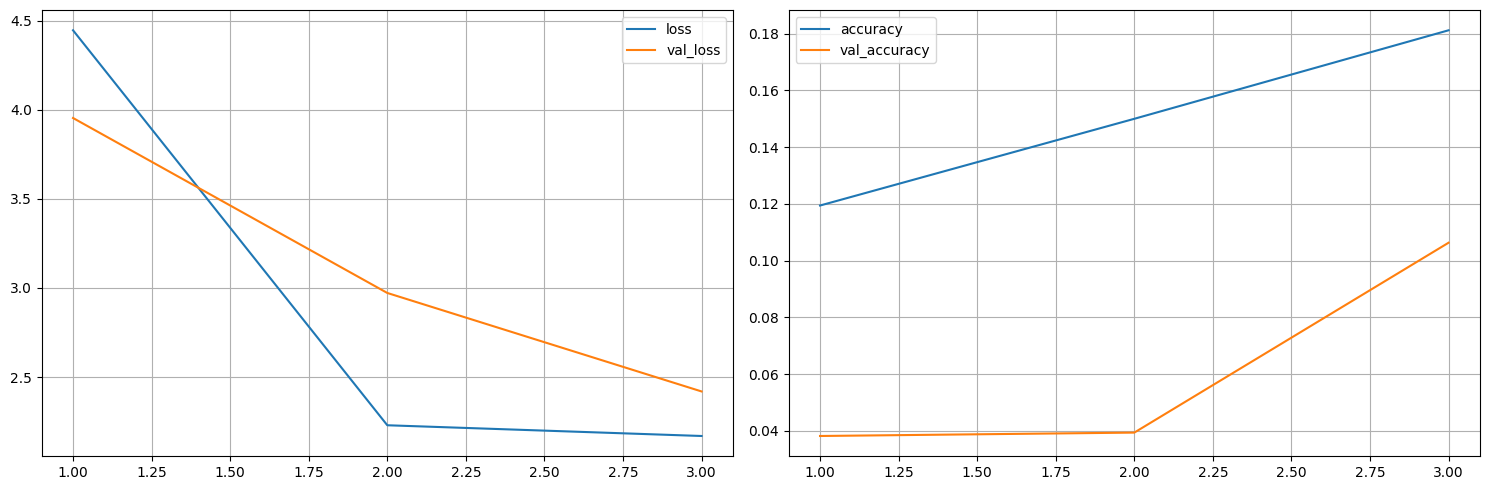

62/62 [==============================] - 20s 324ms/step - loss: 2.1692 - accuracy: 0.1812 - val_loss: 2.4192 - val_accuracy: 0.1063
Epoch 4/20
62/62 [==============================] - ETA: 0s - loss: 2.1055 - accuracy: 0.2087

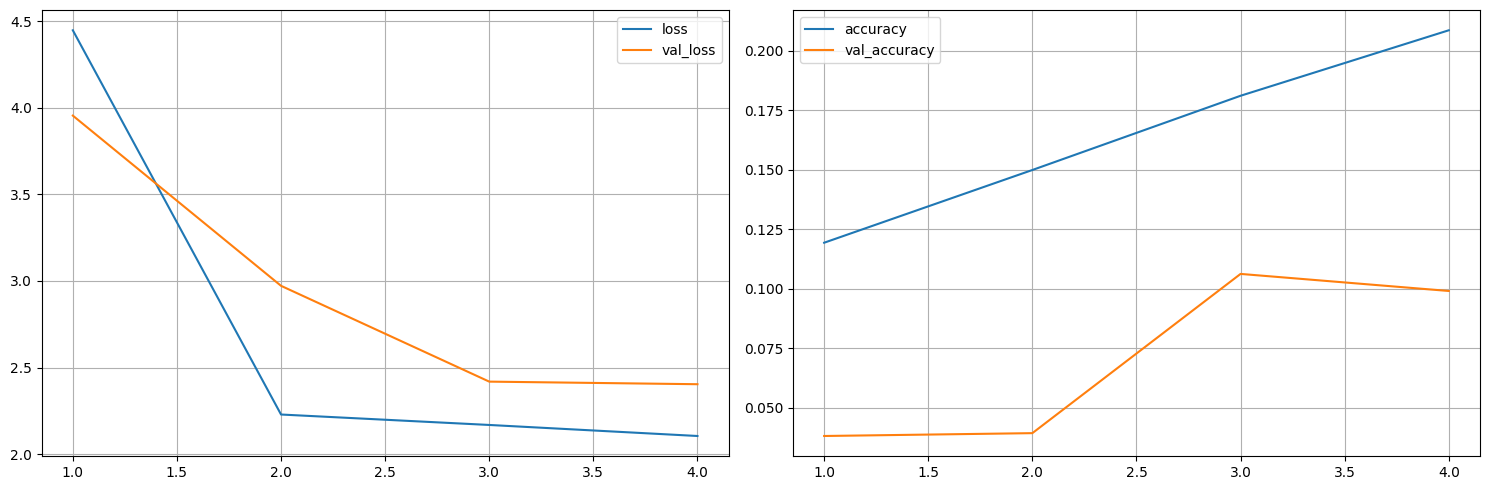

62/62 [==============================] - 20s 321ms/step - loss: 2.1055 - accuracy: 0.2087 - val_loss: 2.4043 - val_accuracy: 0.0992
Epoch 5/20
62/62 [==============================] - ETA: 0s - loss: 2.0166 - accuracy: 0.2564

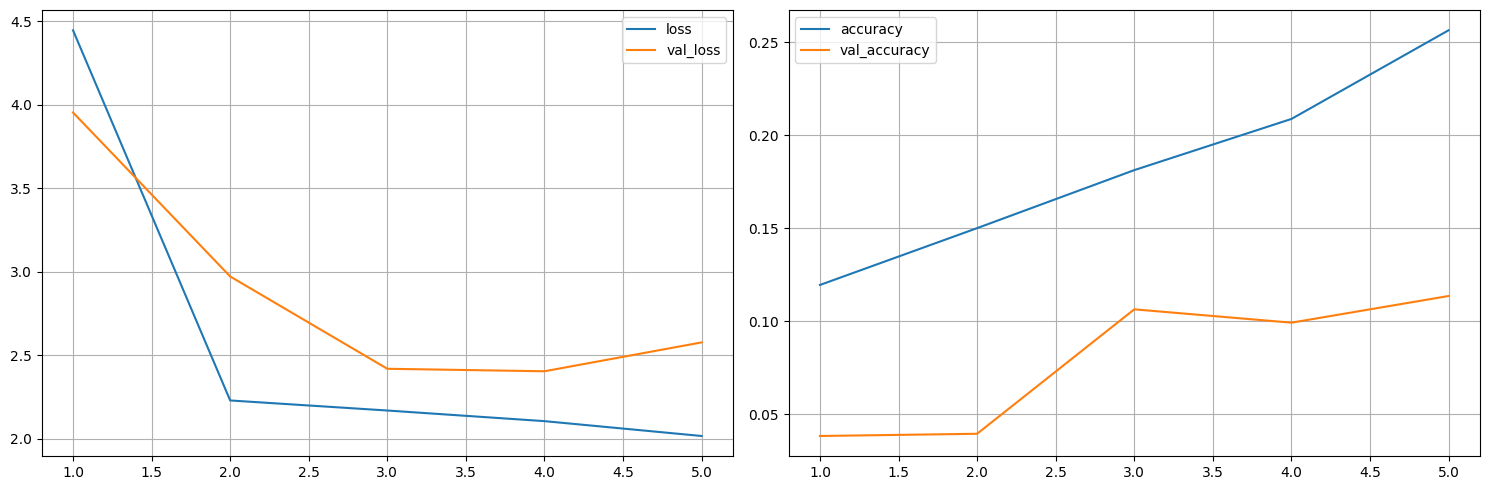

62/62 [==============================] - 20s 318ms/step - loss: 2.0166 - accuracy: 0.2564 - val_loss: 2.5772 - val_accuracy: 0.1135
Epoch 6/20
62/62 [==============================] - ETA: 0s - loss: 1.9512 - accuracy: 0.2810

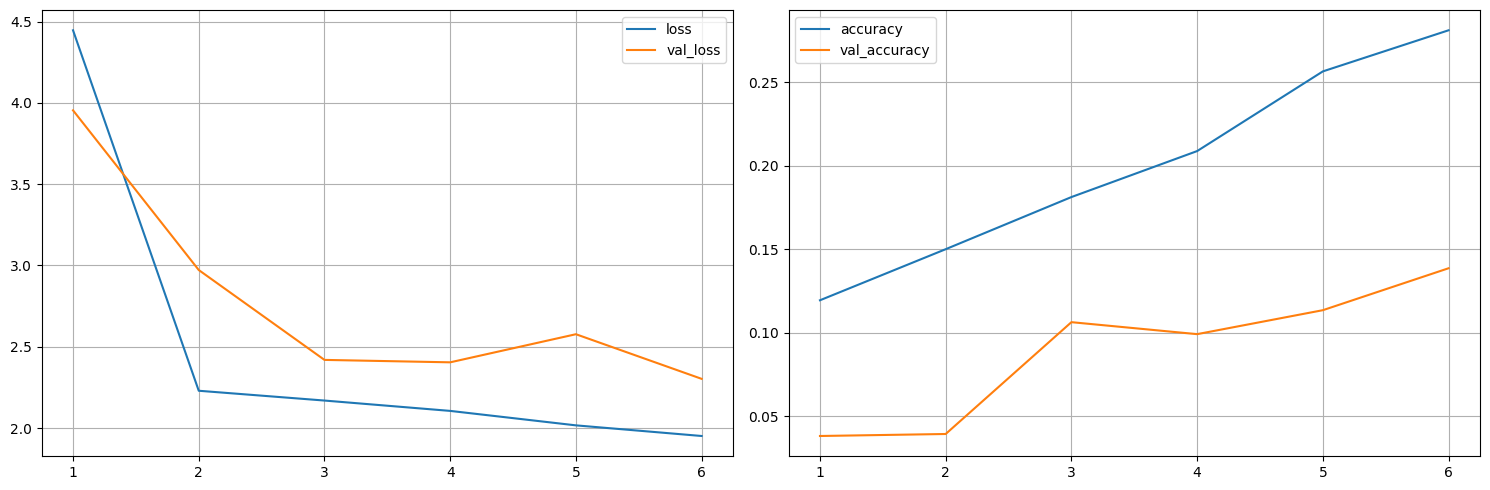

62/62 [==============================] - 20s 317ms/step - loss: 1.9512 - accuracy: 0.2810 - val_loss: 2.3027 - val_accuracy: 0.1386
Epoch 7/20
62/62 [==============================] - ETA: 0s - loss: 1.8731 - accuracy: 0.2991

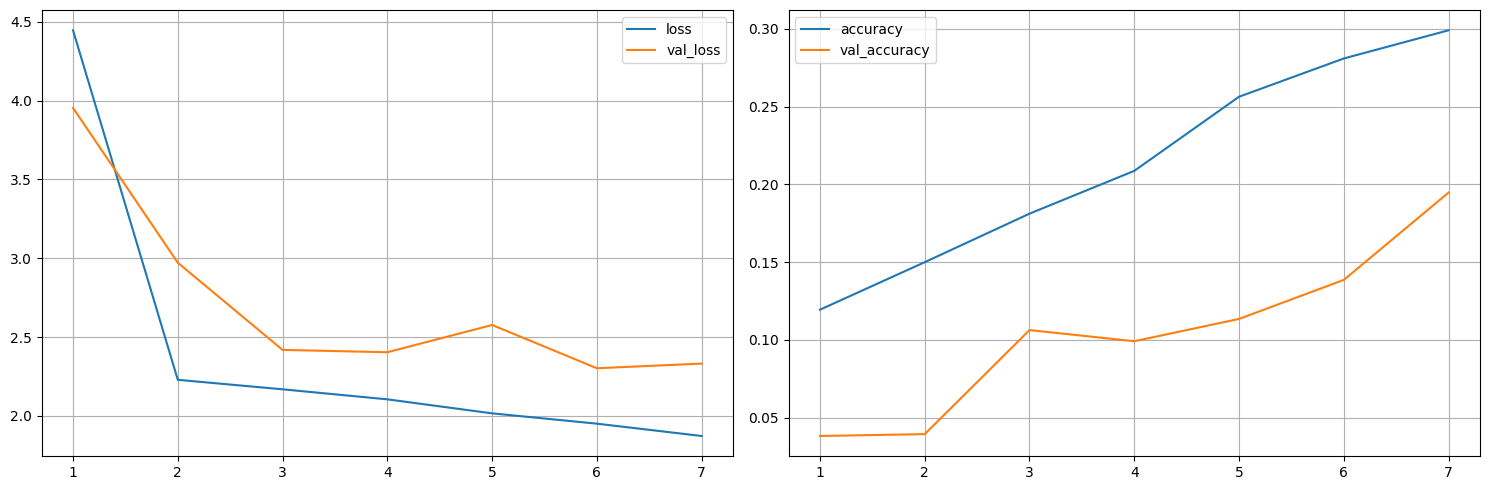

62/62 [==============================] - 20s 321ms/step - loss: 1.8731 - accuracy: 0.2991 - val_loss: 2.3323 - val_accuracy: 0.1947
Epoch 8/20
62/62 [==============================] - ETA: 0s - loss: 1.7961 - accuracy: 0.3494

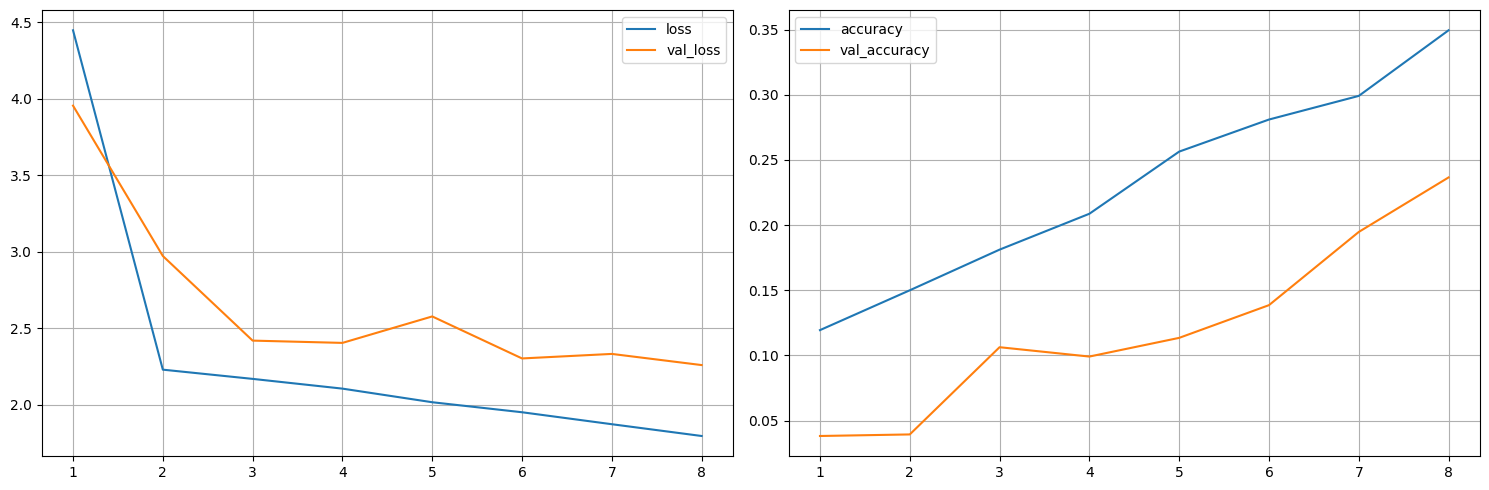

62/62 [==============================] - 20s 326ms/step - loss: 1.7961 - accuracy: 0.3494 - val_loss: 2.2594 - val_accuracy: 0.2366
Epoch 9/20
62/62 [==============================] - ETA: 0s - loss: 1.6588 - accuracy: 0.4103

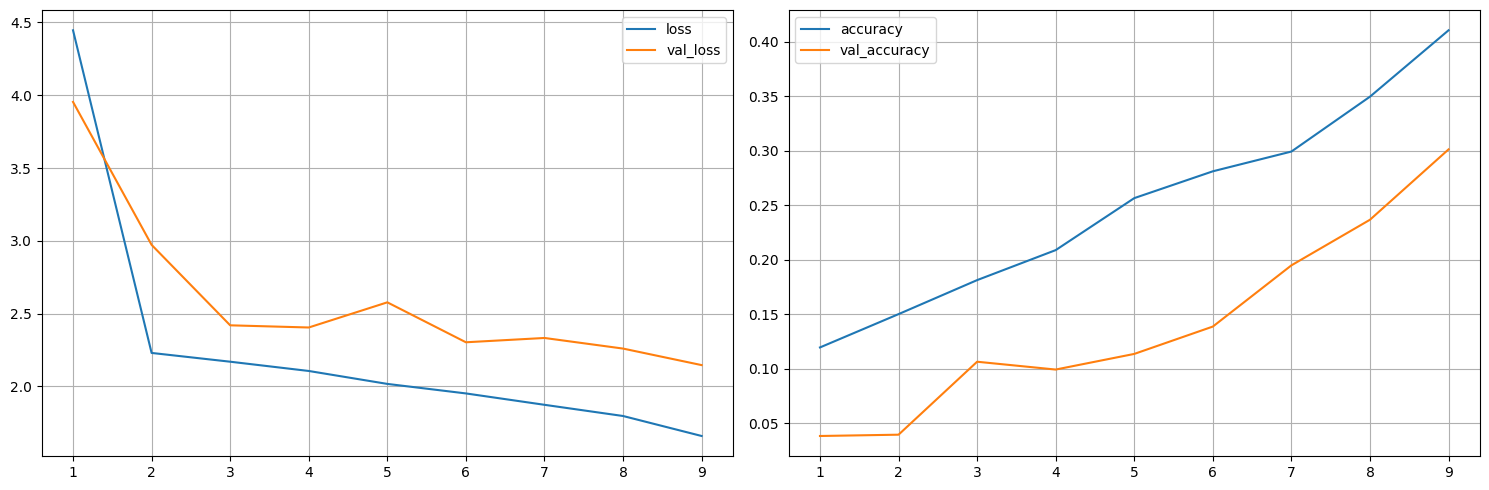

62/62 [==============================] - 20s 326ms/step - loss: 1.6588 - accuracy: 0.4103 - val_loss: 2.1458 - val_accuracy: 0.3011
Epoch 10/20
62/62 [==============================] - ETA: 0s - loss: 1.4057 - accuracy: 0.5102

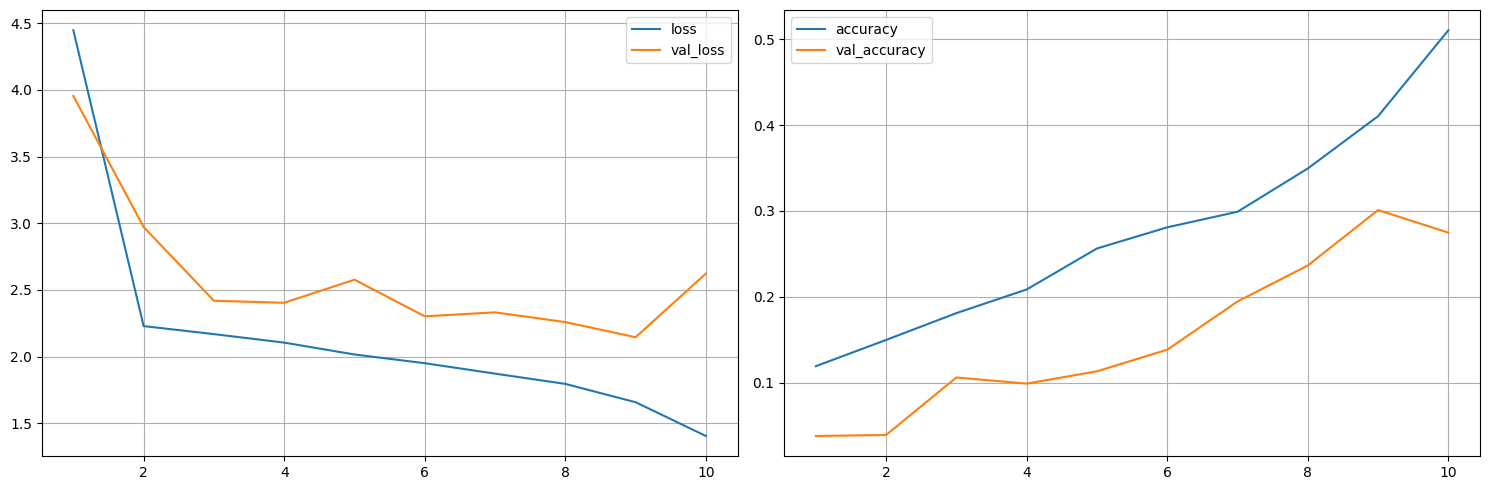

62/62 [==============================] - 20s 321ms/step - loss: 1.4057 - accuracy: 0.5102 - val_loss: 2.6230 - val_accuracy: 0.2748
Epoch 11/20
62/62 [==============================] - ETA: 0s - loss: 1.2465 - accuracy: 0.5749

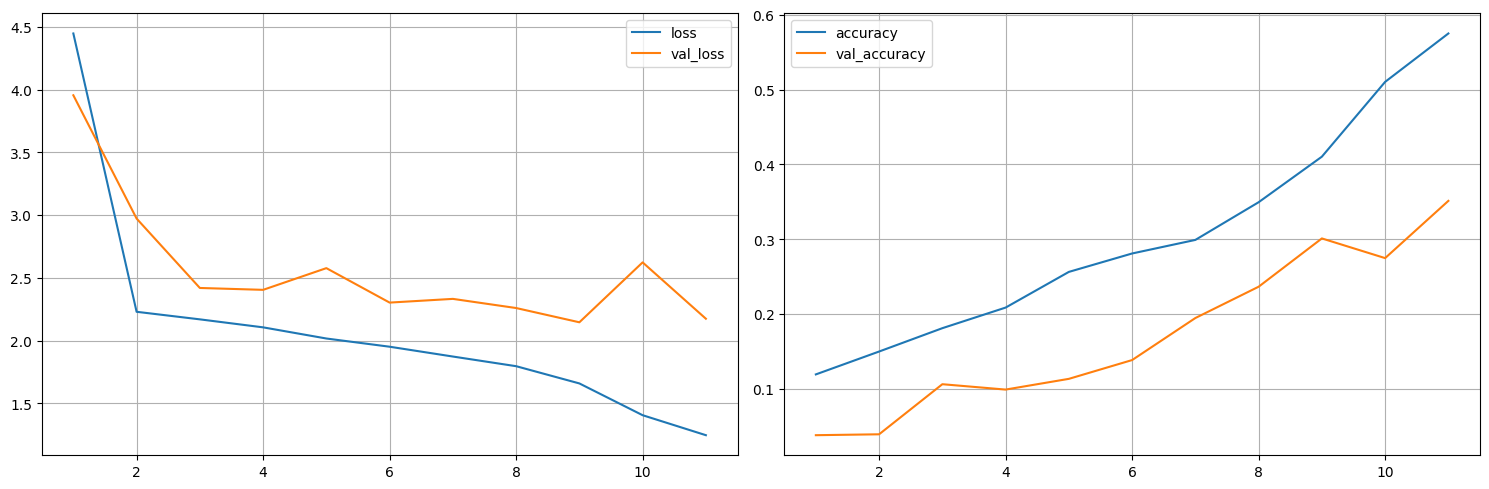

62/62 [==============================] - 20s 321ms/step - loss: 1.2465 - accuracy: 0.5749 - val_loss: 2.1742 - val_accuracy: 0.3513
Epoch 12/20
62/62 [==============================] - ETA: 0s - loss: 1.1121 - accuracy: 0.6248

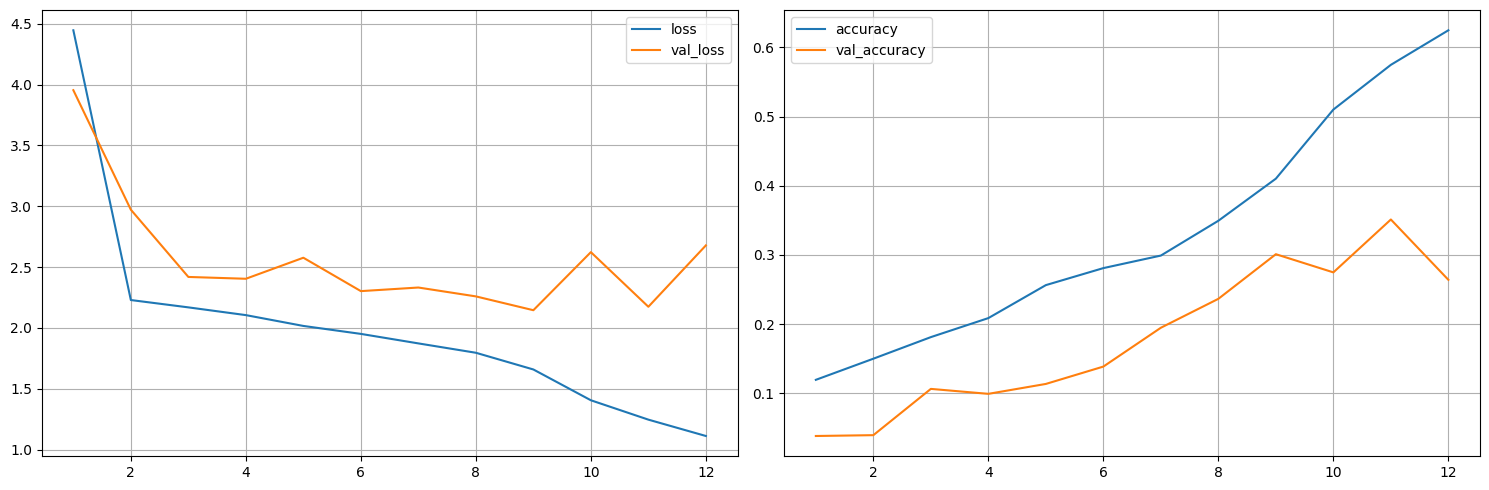

27/27 [==============================] - 1s 28ms/step - loss: 2.6784 - accuracy: 0.2640
Validation accuracy: 0.26403823494911194
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


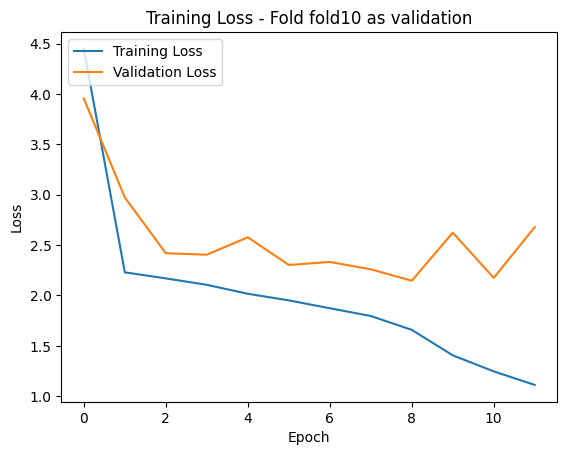

List of scores[0.11454753577709198, 0.2545045018196106, 0.249729722738266, 0.28989899158477783, 0.5026738047599792, 0.1300121545791626, 0.33532220125198364, 0.11013767123222351, 0.12745098769664764, 0.26403823494911194]
Average accuracy: 0.2378315806388855


In [12]:
tensorflow.keras.backend.clear_session()
metric = 'accuracy' #evaluation metric
#metric = tensorflow.keras.metrics.MeanAveragePrecisionMetric(topn=2)
loss= 'categorical_crossentropy' #loss function

#training parameters
num_epoch = 30
batch_size =64
early_stop = 5 # early stoppping after 3 epochs with no improvement of test data

#objective to specify the objective to select the best models, and we use max_trials to specify the number of different models to try.
objective='val_loss'
max_trials = 8 # how many model variations to test?
max_trial_retrys = 3 # how many trials per variation? (same model could perform differently)

# metadata.head(10)
# sns.countplot(metadata, y="class")
#plt.show()

#Building a hypermodel:
# function to build a hypermodel
# takes an argument from which to sample hyperparameters
def build_model(hp):
    model = Sequential()
    input = data['fold1']
    input = input[0]
    model.add(Conv2D(hp.Int('input_units', min_value=32, max_value=256, step=32), (3, 3), input_shape=input.shape[1:]))
    model.add(Activation('tanh'))
    model.add(MaxPool2D(pool_size=(2, 2)))

    for i in range(hp.Int('n_layers', 1, 4)):  # adding variation of layers, this parameter will have a convnet with 2–5 convolutions
        model.add(Conv2D(hp.Int(f'conv_{i}_units', min_value=32, max_value=256, step=32), (3, 3)))
        model.add(Activation('tanh'))
        # adding dropout
        model.add(tensorflow.keras.layers.Dropout(rate=hp.Float('rate', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Flatten())

    for i in range(hp.Int('n_connections', 1, 4)):
        model.add(Dense(hp.Choice(f'n_nodes',
                                  values=[128, 256, 512, 1024])))
        model.add(Activation('tanh'))

    model.add(Dense(10))
    model.add(Activation("softmax"))

    model.compile(optimizer=Adam(learning_rate=1e-3), #optimization algorithm used is Adam
                  loss=loss,
                  metrics=[metric])

    return model

#get optimal hyperparameters using
def tuner(X, y, num_epoch, batch_size):
    EarlyStoppingCallback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=early_stop)
    tuner = RandomSearch(build_model, objective=objective, max_trials=max_trials, executions_per_trial=max_trial_retrys, metrics=[metric])
    tuner.search(x=X, y=y, epochs=num_epoch, batch_size=batch_size, validation_split=0.1, callbacks=[EarlyStoppingCallback]) #10% is validation data
    best_hyperparameters = tuner.oracle.get_best_trials(1)[0].hyperparameters.values
    return best_hyperparameters

#hyperparameters2 = tuner(X, y, num_epoch, batch_size)
#print(hyperparameters2)

def model_k_cross(hyperparameters, data):
    hp = kt.HyperParameters()
    list_scores = []
    for key, value in hyperparameters.items():
        hp.Fixed(key, value)

    for fold_name, fold_data in tqdm.tqdm(data.items()):
        tensorflow.keras.backend.clear_session()
        print(f"Training using {fold_name} as validation")
        X_val, y_val = fold_data[0], fold_data[1]
        X_train = []
        y_train = []

        for other_fold_name, other_fold_data in data.items():
            if other_fold_name == fold_name:
                continue

            X = other_fold_data[0]
            y = other_fold_data[1]
            X_train.extend(X)
            y_train.extend(y)

        X_train = np.array(X_train)
        y_train = np.array(y_train)

        cmodel = build_model(hp)
        cmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

        EarlyStoppingCallback = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=early_stop)

        history = cmodel.fit(X_train, y_train, epochs=num_epoch, batch_size=batch_size,
                   callbacks=[EarlyStoppingCallback], validation_data=(X_val, y_val))

        # Evaluation
        scores = cmodel.evaluate(X_val, y_val)
        print("Validation accuracy:", scores[1])
        list_scores.append(scores[1])


        # Plot training history - loss
        print(history.history.keys())
        plt.plot(history.history['loss'])
        plt.plot(history.history['val_loss'])
        plt.title(f"Training Loss - {fold_name} as validation")
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Training Loss', 'Validation Loss'], loc='upper left')
        plt.show()

        plt.plot(history.history['accuracy'])
        plt.plot(history.history['val_accuracy'])
        plt.title(f"Accuracy - {fold_name} as validation")
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Training accuracy', 'Validation Loss'], loc='upper left')
        plt.show()


    average_acc = sum(list_scores) / len(list_scores)
    print(f'List of scores{list_scores}')
    print(f'Average accuracy: {average_acc}')




#creating custom hyperparameters to inspect model performance,inspired by the network we found on kaggle
custom_hyperparameters = {
        'input_units': 224,
        'n_layers': 2,
        'conv_0_units': 64,
        'rate': 0.2,
        'n_connections': 1,
        'n_nodes': 1012,
        'conv_1_units': 128,
    }

model_k_cross(custom_hyperparameters, data)
#model(best_hyperparameters_overall)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
